# Name: Faisal Abdul-Fattah
# Machine Learning Medical Cost Insurance Project

# Table of contents

This notebook will be divided into the following steps of the machine learning pipeline:

 1. <span style="color:#ff7f0e"><strong>Problem definition</strong></span>
 2. <span style="color:#2ca02c"><strong>Data collection</strong></span>
 3. <span style="color:#d62728"><strong>Exploratory data analysis (EDA)</strong></span>
 4. <span style="color:#9467bd"><strong>Data cleaning</strong></span>
 5. <span style="color:#8c564b"><strong>Feature engineering</strong></span>
 6. <span style="color:#e377c2"><strong>Splitting data</strong></span>
 7. <span style="color:#7f7f7f"><strong>Feature scaling</strong></span>
 8. <span style="color:#bcbd22"><strong>Model selection</strong></span>
 9. <span style="color:#17becf"><strong>Training model</strong></span>
 10. <span style="color:#ff9896"><strong>Tuning hyperparameters</strong></span>
 11. <span style="color:#c5b0d5"><strong>Model evaluation</strong></span>

In [1]:
# import libaries
!pip install missingno
!pip install xgboost
!pip install tensorflow
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from bokeh.io import output_notebook
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
output_notebook()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
import time
from sklearn.linear_model import Lasso, Ridge
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.manifold import TSNE
from math import sqrt
from scipy.stats import probplot
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from scipy import stats
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.model_selection import cross_val_predict

Loading BokehJS ...

In [2]:
# Values constant for all tests to ensure a more controlled enviornment

seed = 42
np.random.seed(seed)
ts = 0.2

In [3]:
# Setting a k fold cross validation that will be used continuously throughout the code to prevent having to type it over and over again

kf = KFold(n_splits=5, shuffle=True, random_state=seed) 

**Note**:
* Cross validation will use cv=5 folds for this dataset. The dataset is small, with only 1338 samples and 6 features. So, a value of 5 folds was picked because it ensures less computational cost and is sufficient for our small dataset.


# 1. Problem Definition and Introduction

Predicting individual medical insurance costs is crucial. For example, a business that specialises in medical insurance will hugely benefit from being able to predict what the insurance cost will be for individuals quickly and accurately. Having an idea of how much the insurance costs will be allows them to then know if they will be profitable when comparing costs to the money they are collecting (Cenita, Asuncion and Victoriano, 2023). **Machine learning** in the medical field can help with quick and accurate predictions in this era of big data. The usual traditional regression techniques are inefficient compared to machine learning techniques (Jordan and Mitchell, 2015, as cited in Cenita, Asuncion and Victoriano, 2023).

This study uses **supervised learning**, a category of machine learning meaning the datasets are already labeled and then used to train algorithms to make predictions and analyse patterns between variables (Google Cloud, n.d.). The dataset used is the *Medical Cost Personal Dataset* (CHOI, n.d.) which provides data for age, sex, BMI, number of children, smoking status, region, and insurance charges.

Moreover, this study aims to analyse the dataset's variables and relationships between the variables. Then, build and train different models that are able to make accurate insurance medical cost predictions, while comparing the models.

---

**Stakeholders/Target Audiences**:

- **Insurance companies**: As mentioned previously, it would be greatly beneficial to their companies if medical insurance company owners are able to predict insurance costs. This study provides the code that they can use in order to do that. They can use the analysis done through this study to assess risk and set premiums more precisely. Furthermore, this study can help them understand what features are the most important in predicting the costs.

- **Other students**: This study provides clear, clearly commented code that is easy to follow for students who wish to carry out a similar project. Machine learning is a collaborative field, other students can read this notebook and improve it and learn from it.

- **Patients**: Understanding medical insurance costs allows patients to know what the long-term costs are. They can better understand how much they have to pay for their insurance plans based on their age and other factors, hence allowing better planning for the future and less risk.

---


**Research Questions**:

Inspired by (Liu, 2024a):

1) **Is a linear regression model better than a polynomial regression model to predict the medical insurance costs?**

2) **Will there be a considerable difference in performance between a traditional regression models such as linear regression and more advanced machine learning models (e.g., MLP) for predicting medical insurance costs?**

3) **What features are the most important/most strongly correlated with higher medical insurance costs?**

4) **Can we accurately predict the medical insurance costs based on these features?**

5) **Do the different types of normalisations provide better results for each of these models, i.e which is better – normalisation or standardisation?**

6) **Are there any missing values?**

7) **Does the target variable need to be normalised, or is its distribution already normal?**

8) **Which method of missing data imputation provides better results?**

9) **When should we use randomsearch and when should we use gridsearch to optimise hyperparameters?**

10) **What features should be kept, and which should be removed?**

11) **Compared to literature, what novel ideas can I implement?**

12) **What are the trade-offs between interpretability/explainability to stakeholders and performance when using complex models like neural networks relative to simpler models like linear regression?**


# 2. Data collection

In [4]:
# Import the data

df = pd.read_csv('insurance-adapted.csv')

# 3. Exploratory data analysis (EDA)

In [5]:
# Summarise the dataframe
# Columns  0-5 are the feature columns, column 6 is the target 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [6]:
# previous cell shows the number of rows and columns, but this function shows it more clearly
# 1338 rows x 7 columns

num_rows = df.shape[0] #Index 0 is the rows number
num_cols = df.shape[1]  #Index 1 is the columns number
num_rows, num_cols

(1338, 7)

In [7]:
#Display first 5 rows. 

df.head()

age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900         0    yes  southwest  16884.92400
1  18.0    male  33.770         1     no  southeast   1725.55230
2  28.0    male  33.000         3     no  southeast   4449.46200
3  33.0    male  22.705         0     no  northwest  21984.47061
4  32.0    male  28.880         0     no  northwest   3866.85520

In [8]:
# find the stats of every real value column. Ignore categorical columns

df.describe()

age          bmi     children       charges
count  1318.000000  1338.000000  1338.000000   1338.000000
mean     39.216237    30.663397     1.094918  13270.422265
std      14.083151     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [9]:
# missing data identification 
# The data type is a 64-bit integer
# 20 missing values from age feature

df.isnull().sum()  #counts how many rows have an empty value for each column

age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

**Note:**

I will add notes like this one whenever a research question is answered.

The cell above answers RSQ6: 
"Are there any missing values?"

In [10]:
# find the extent of missing age values as a percentage
# Inspired by Haixia Liu Titanic notebook (Liu, 2024)

Age_missing_percentage = 100*df.isnull()['age'].sum()/df.shape[0]    # Since 20 rows of age missing values, to get a percentage, do 20/total rows number i.e. 100*(20/1338) = 1.49%
round(Age_missing_percentage, 2)



# 1.49% - relatively low percentage of age rows missing which is good. 

1.49

In [11]:
# Week 3 - finding out the numerical and categorical columns in order to know which to encode
# Inspired by (mohamedelghannam15, 2024)

categorical_cols = df.select_dtypes(include = 'object').columns  # Selects columns with object data type, These need to be encoded
numerical_cols = df.select_dtypes(include = ['int', 'float']).columns  # numerical columns, either float or integer
categorical_cols, numerical_cols

# Therefore we can see age column is numerical, so the the missing values can be imputed

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

In [12]:
# Inspired by (mohamedelghannam15, 2024)

for number in categorical_cols:
    print(df[number].value_counts())  # This counts the number of each possible output for the categorical columns.  Helps explore the distribution of the values in each categorical column of the dataframe
    print("..................................")  # added a line of dots between each feature for clarity


sex
male      676
female    662
Name: count, dtype: int64
..................................
smoker
no     1064
yes     274
Name: count, dtype: int64
..................................
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
..................................


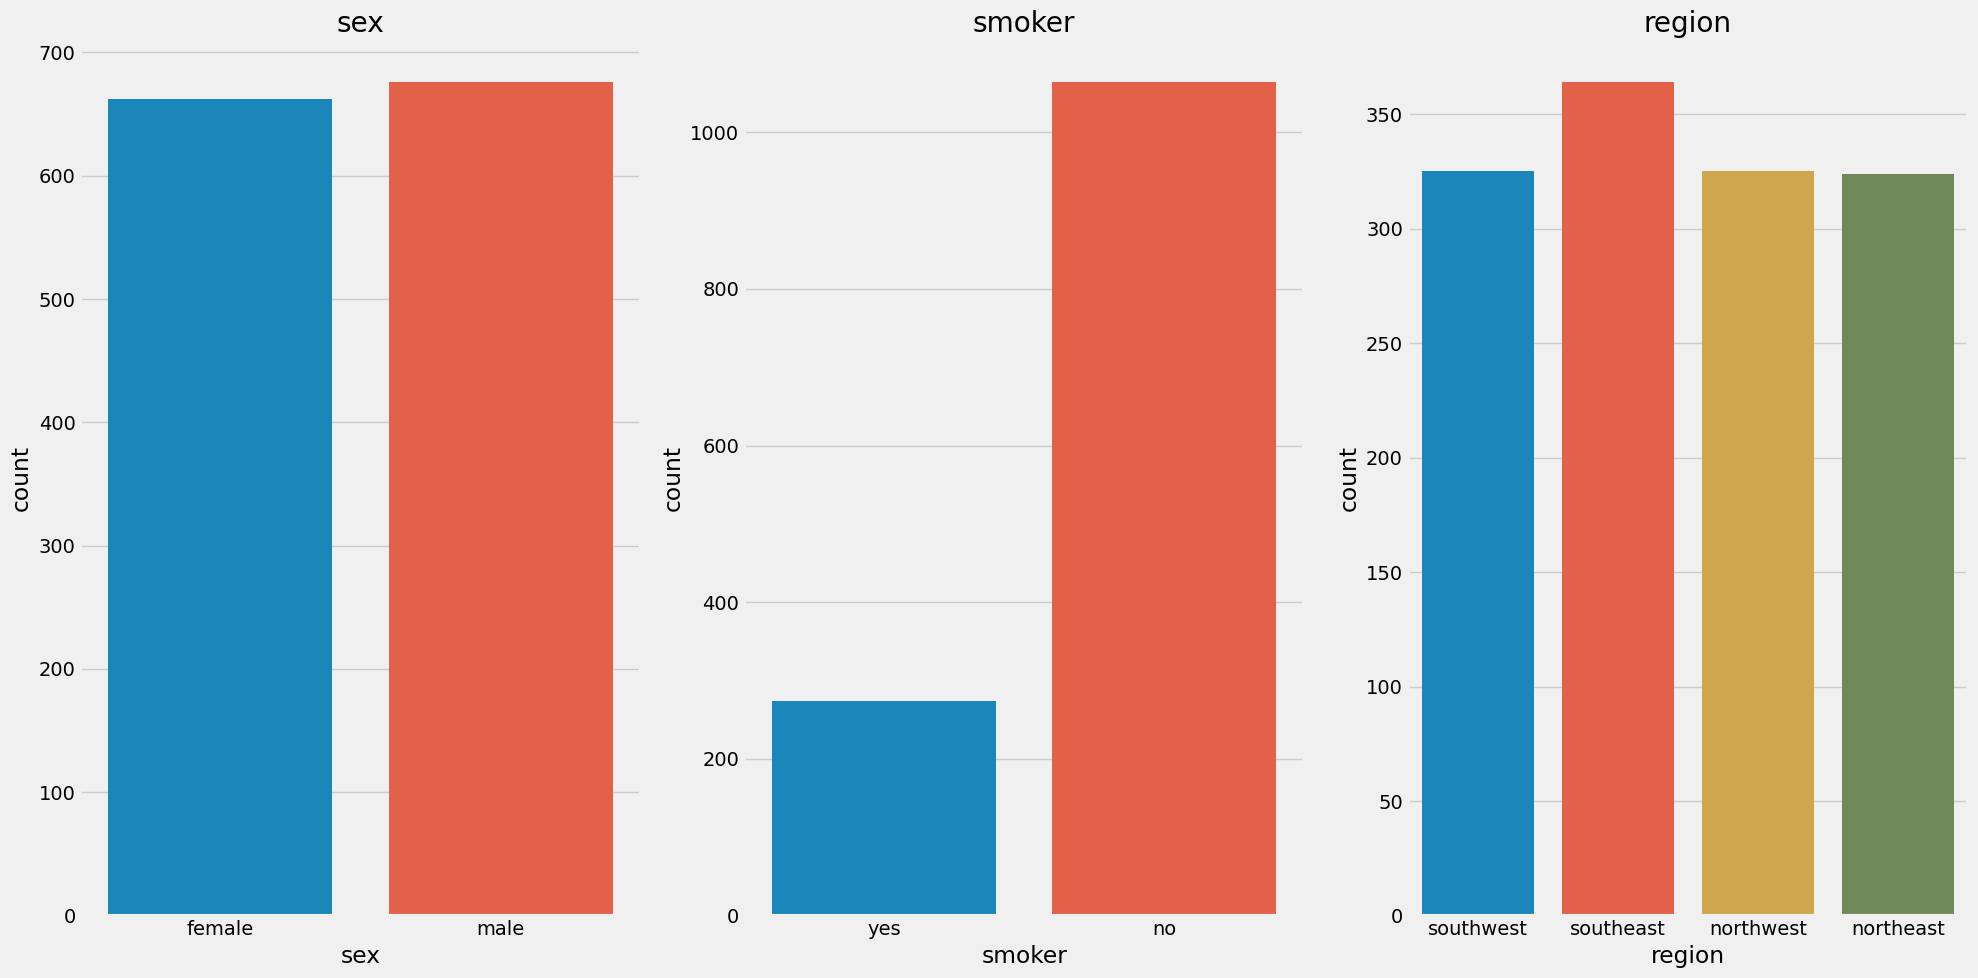

In [13]:
# Now I will show the data from the previous cell but in graph format
# These plots show the count of the number of row occurences of each category of the categorical variables. Each bar represents a category of the variable.



# the figure size (width, height)
fig, ax = plt.subplots(nrows=int(np.ceil(len(categorical_cols) / 3)), ncols=3, figsize=(20, 10))  # made figure size big enough to fit all the labels and show them clearly

ax = ax.flatten()  #flattening the axes array for easy indexing

for i, column in enumerate(categorical_cols):
    sns.countplot(data=df, x=df[column], ax=ax[i])
    ax[i].set_title(column)  
#the code makes count plots for all categorical columns in the dataset, showing the distribution of values in each column with each plot labeled by its column name

plt.tight_layout()  # layout adjusted for better spacing
plt.show()  # show plots





<Axes: xlabel='smoker', ylabel='count'>

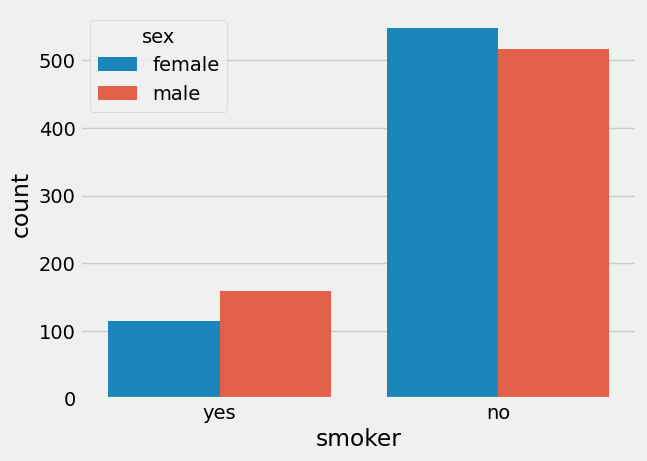

In [14]:
# This plot below shows that there are more non-smokers than smokers in the dataset
# This plot also shows that that men smoke more than women
# Note that here we see that the smoker = yes group are under-represented. What impact will this have?
# It will not matter, balance is only needed in the target variable (Direct-Touch469, 2023)

sns.countplot(data = df, x= 'smoker', hue = 'sex')

In [15]:
# Confirming that there are indeed more non-smokers than smokers in the dataset


smoker_counts = df['smoker'].value_counts()

# Print  counts
print("Number of Smokers (smoker = 1):", smoker_counts.get(1, 0))   # the count for smokers (1)
print("Number of Non-Smokers (smoker = 0):", smoker_counts.get(0, 0))  #  count for non-smokers (0)


Number of Smokers (smoker = 1): 274
Number of Non-Smokers (smoker = 0): 1064


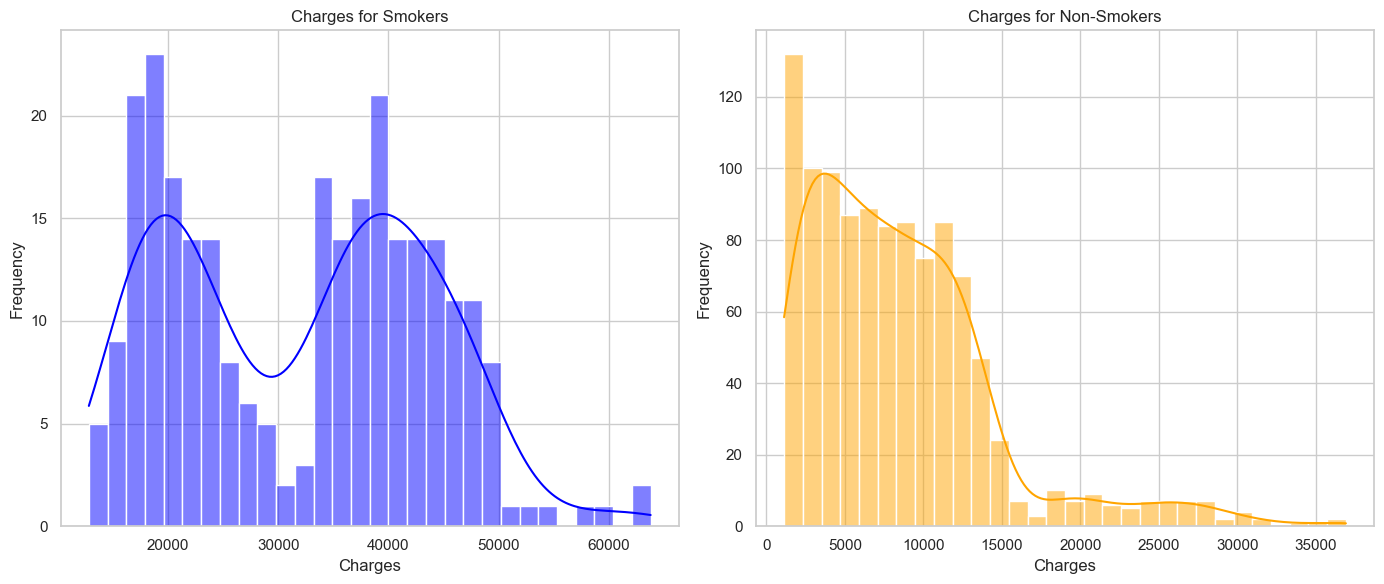

In [16]:
# The plots below show that smokers are charged more than non-smokers
# The plots show that the range of charges paid is higher for smokers than non-smokers
# Therefore, we can predict that the insurance cost will be more for smokers than non-smokers

# dataset split into smokers and non-smokers 
smokers_split = df[df['smoker'] == 'yes'] 
non_smokers_split = df[df['smoker'] == 'no']

# style using seaborn
sns.set(style="whitegrid")

#figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1- for smokers
sns.histplot(smokers_split['charges'], kde=True, ax=axes[0], color='blue', bins=30)
axes[0].set_title('Charges for Smokers')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')

# Plot 2- for non-smokers
sns.histplot(non_smokers_split['charges'], kde=True, ax=axes[1], color='orange', bins=30)
axes[1].set_title('Charges for Non-Smokers')
axes[1].set_xlabel('Charges')
axes[1].set_ylabel('Frequency')

# adjust layout
plt.tight_layout()
plt.show()

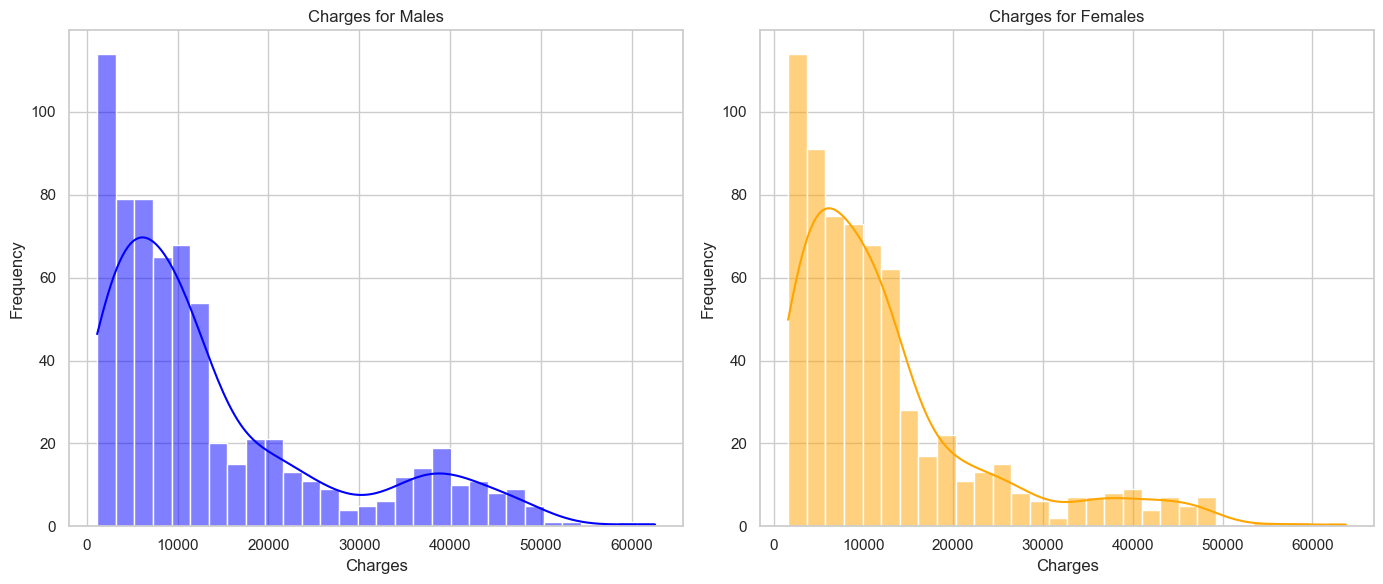

In [17]:
# The plots below show that there is no dsicrimination between males and females regrding charges and so the sex will not affect insurance costs

# Split the dataset into make and females for better analysis

male_split = df[df['sex'] == 'male'] 
female_split = df[df['sex'] == 'female']

# Set style using seaborn
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1- for males
sns.histplot(male_split['charges'], kde=True, ax=axes[0], color='blue', bins=30)
axes[0].set_title('Charges for Males')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')

# Plot 2- for females
sns.histplot(female_split['charges'], kde=True, ax=axes[1], color='orange', bins=30)
axes[1].set_title('Charges for Females')
axes[1].set_xlabel('Charges')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

In [18]:
df.describe()

# If we look at the statistics for the variables again, the charges mean is 13270, while the median is 9382.
# SInce they are nor close, this means the data is skewed. Need to apply log transform to the charges variable

age          bmi     children       charges
count  1318.000000  1338.000000  1338.000000   1338.000000
mean     39.216237    30.663397     1.094918  13270.422265
std      14.083151     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<Axes: xlabel='charges', ylabel='Density'>

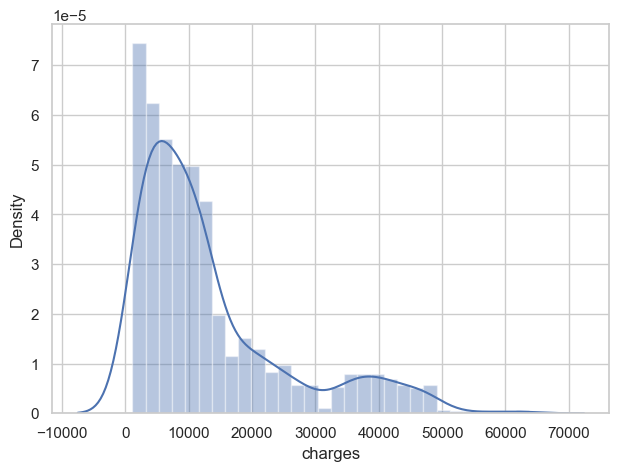

In [19]:
sns.distplot(df.charges)

# This distribution of the charges again further proves that it is skewed and needs fixing

<Axes: xlabel='charges', ylabel='Density'>

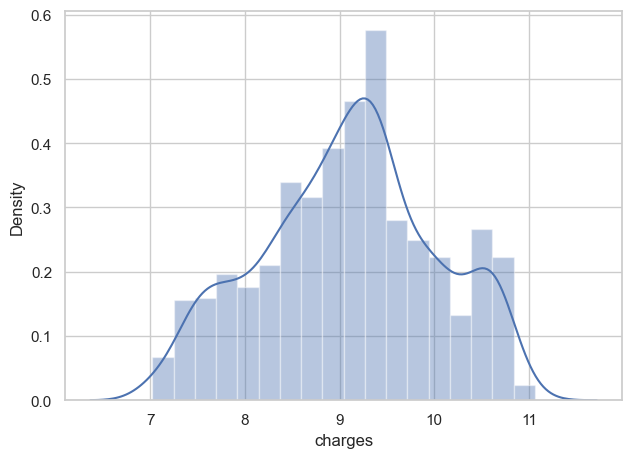

In [20]:
# Normalising the charges

log_charges = np.log(df.charges)
log_charges.head()
sns.distplot(log_charges)

**The cell above answers RSQ7:**

**Does the target variable need to be normalised, or is its distribution already normal?**


In [21]:
# Encoding categorical variables 
# The data is nominal (no inherent order) which would normally mean one hot encoding, but i used label encoding
# This is because using one hot encoding would mean that many of our feature columns would then be one hot columns!
# We had 6 features at the start -> then after one hot encoding we would have age, bmi, children, sex1, sex0, smoker1, smoker0, region1, region2, region3, region4.
# Therefore, 70% of our feature columns would one hot encoded (7 out of 10)
# (AerysSk, 2021) mentioned that if the one hot encoding makes over 1/3 of your feature columns one hot encoded columns, then use label encoding instead. which is what i used.

encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])   
df['smoker'] = encoder.fit_transform(df['smoker']) 
df['region'] = encoder.fit_transform(df['region'])


df.head()



age  sex     bmi  children  smoker  region      charges
0  19.0    0  27.900         0       1       3  16884.92400
1  18.0    1  33.770         1       0       2   1725.55230
2  28.0    1  33.000         3       0       2   4449.46200
3  33.0    1  22.705         0       0       1  21984.47061
4  32.0    1  28.880         0       0       1   3866.85520

In [22]:
# use the log charges column now

df['log_charges'] = np.log(df['charges'])  # calculate the log

# Drop the old 'charges' column
df = df.drop(columns=['charges'])

df.head()


age  sex     bmi  children  smoker  region  log_charges
0  19.0    0  27.900         0       1       3     9.734176
1  18.0    1  33.770         1       0       2     7.453302
2  28.0    1  33.000         3       0       2     8.400538
3  33.0    1  22.705         0       0       1     9.998092
4  32.0    1  28.880         0       0       1     8.260197

In [23]:
# Now after normalising the charges target, lets define X and y

X = df.drop(['log_charges'], axis = 1)
y = df.log_charges


                  age       sex       bmi  children    smoker    region  \
age          1.000000 -0.022016  0.103033  0.039948 -0.026759  0.000792   
sex         -0.022016  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi          0.103033  0.046371  1.000000  0.012759  0.003750  0.157566   
children     0.039948  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker      -0.026759  0.076185  0.003750  0.007673  1.000000 -0.002181   
region       0.000792  0.004588  0.157566  0.016569 -0.002181  1.000000   
log_charges  0.526626  0.005632  0.132669  0.161336  0.665506 -0.042690   

             log_charges  
age             0.526626  
sex             0.005632  
bmi             0.132669  
children        0.161336  
smoker          0.665506  
region         -0.042690  
log_charges     1.000000  


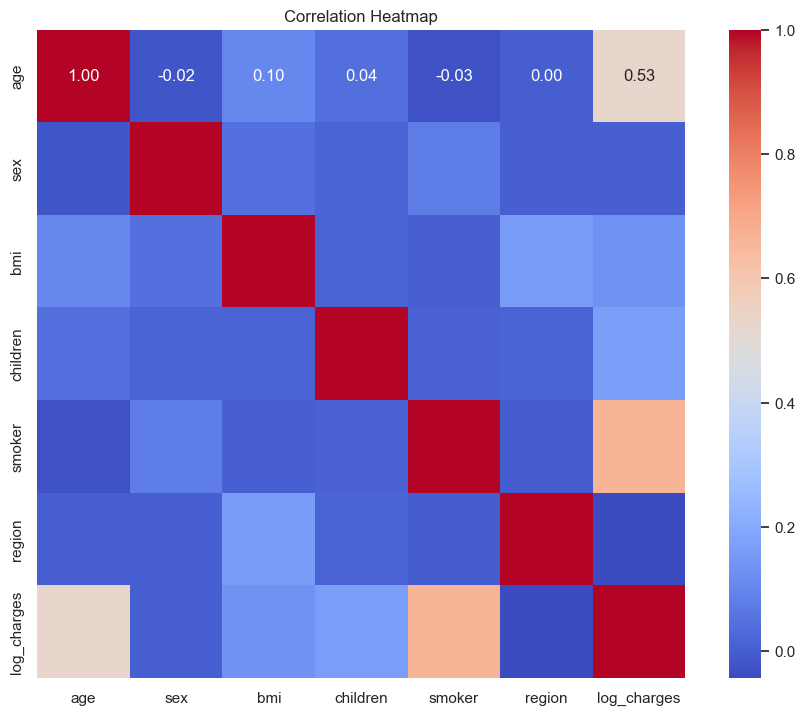

In [24]:
# The heatmap shows that no variables are very highly correlated. No variables need to be dropped.
# This is called bivariate analysis
# why do this analysis? it allows us to detect multicolinearity which can add bias to our models, so its useful to do coreelation analysis

# calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix )


# heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

#  Show the plot
plt.title("Correlation Heatmap")
plt.show()

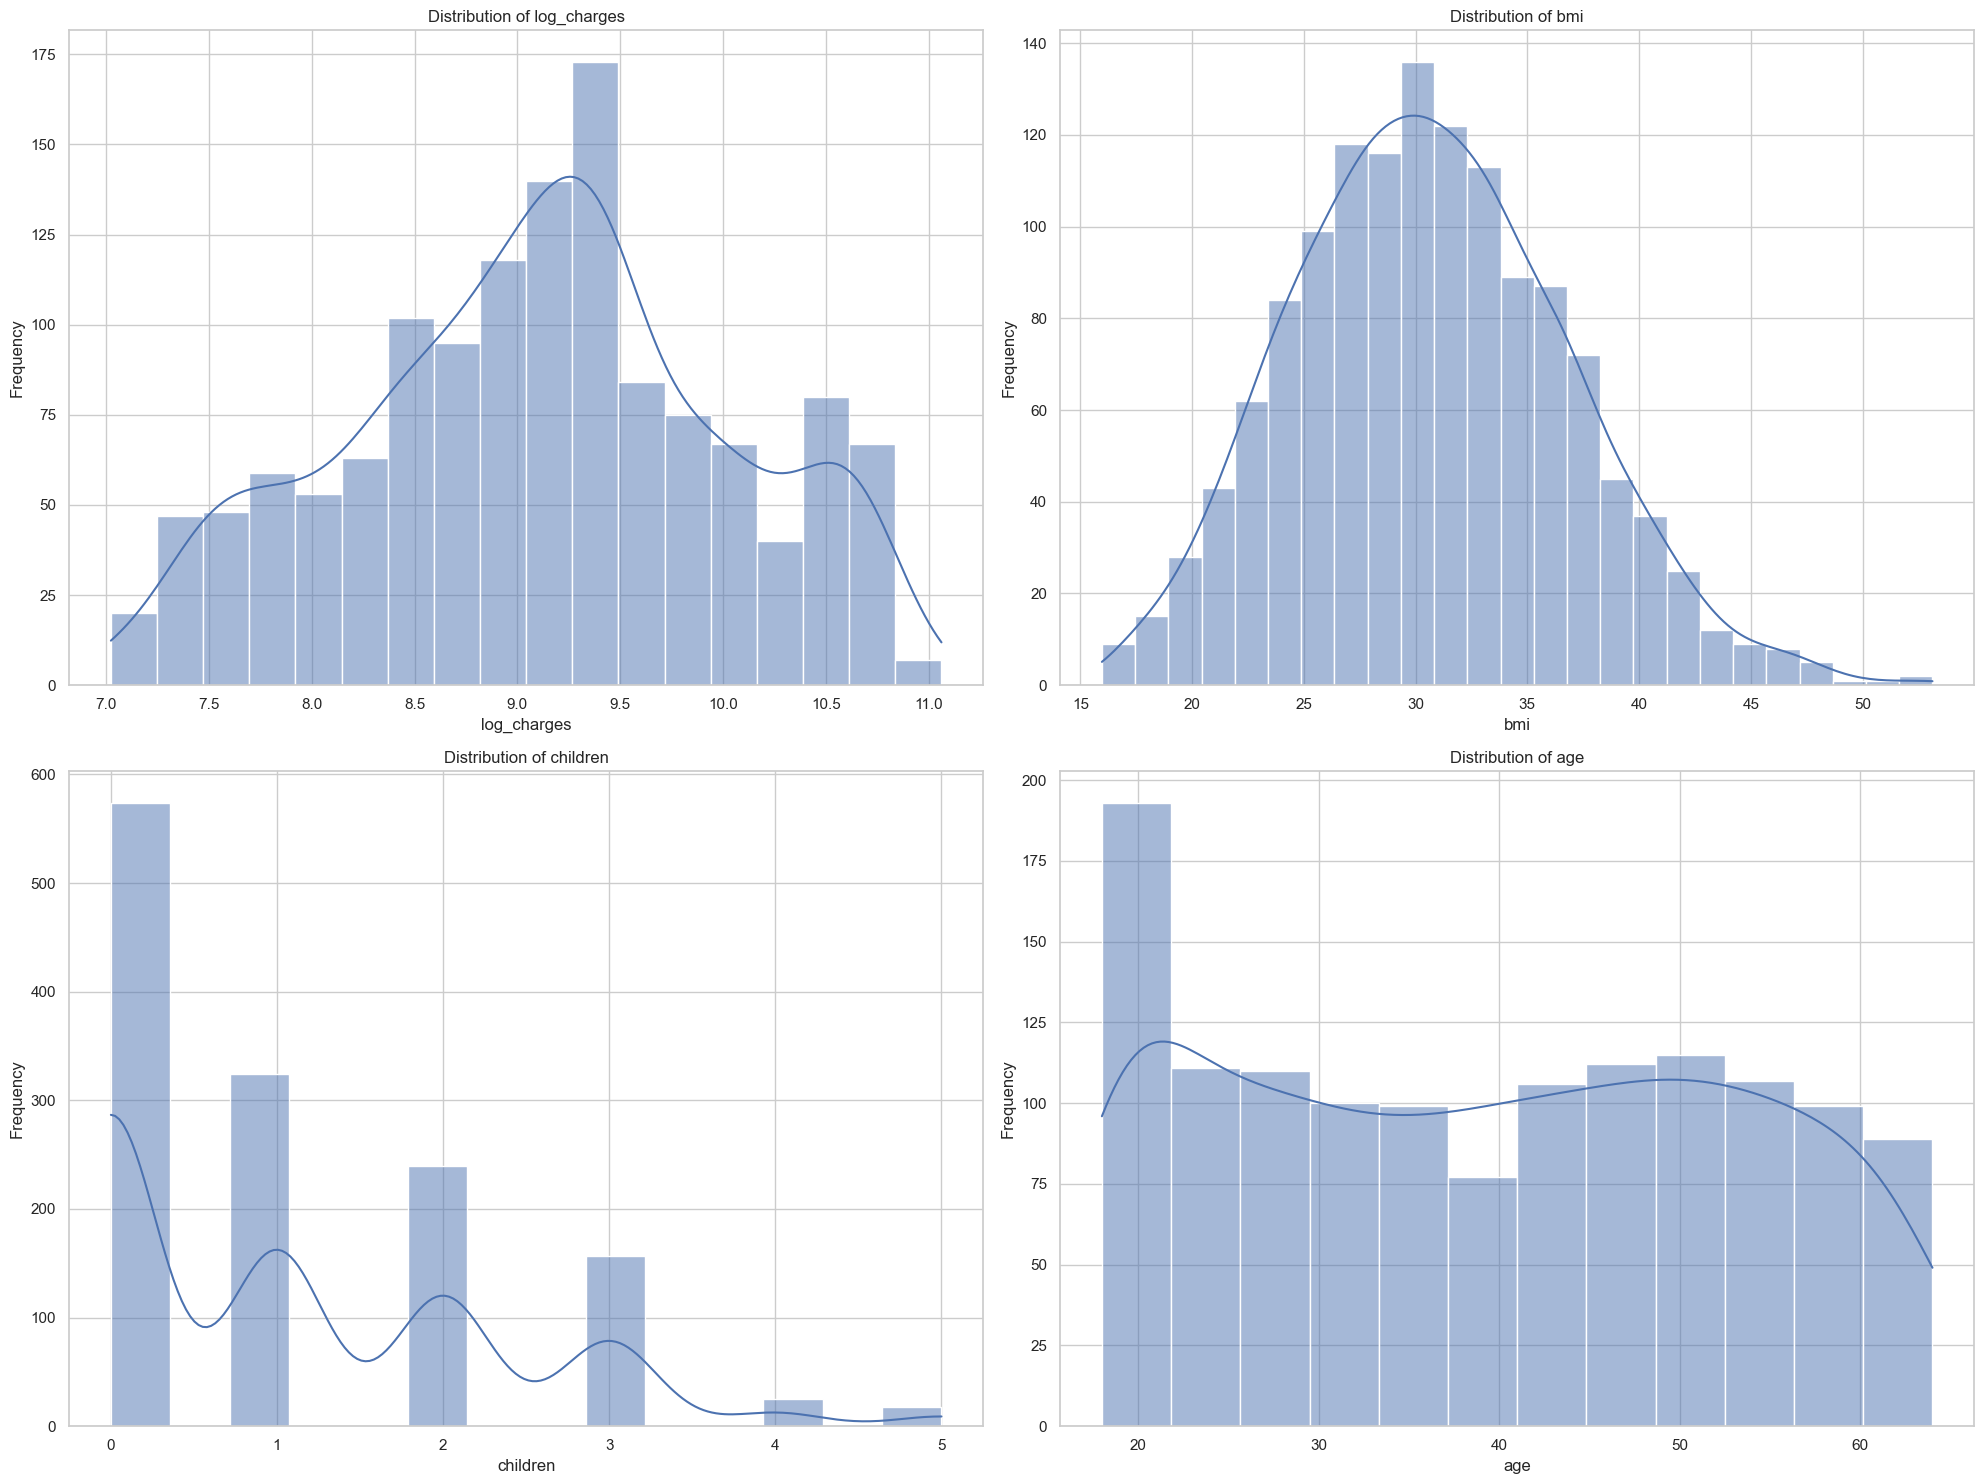

In [25]:
# These plot shows the distribution of the values of each of the 4 numerical variables as a histogram. These are distribution plots.
# Adding a KDE plot to a histogram means smoother plot and allows us to see the overall distribution of the data more clearly. On top of that, it removes some of the noise
# These plots show that the data is now good and not skewed. Children is just a simple count FEATURE, and so even though it is skewed, it will not be normalised. 

# Specify the numerical columns
numerical_cols = ['log_charges', 'bmi', 'children', 'age']  # Your specified columns

# figure with 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array

# Loop through the numerical columns and plot each one
for i, column in enumerate(numerical_cols):
    ax = axes[i]  
    sns.histplot(df[column], kde=True, ax=ax)  # Create the histogram with KDE for the reason highlighted above
    ax.set_title(f'Distribution of {column}')  # Set title for each subplot
    ax.set_xlabel(column)  # x-axis label
    ax.set_ylabel('Frequency')  #  y-axis label

# Adjust the layout - to prevent overlap
plt.tight_layout()
plt.show()


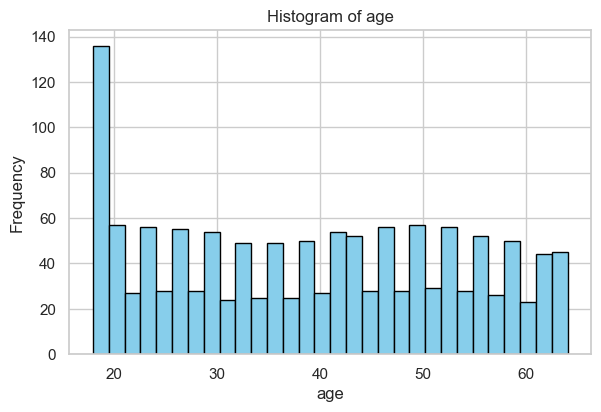

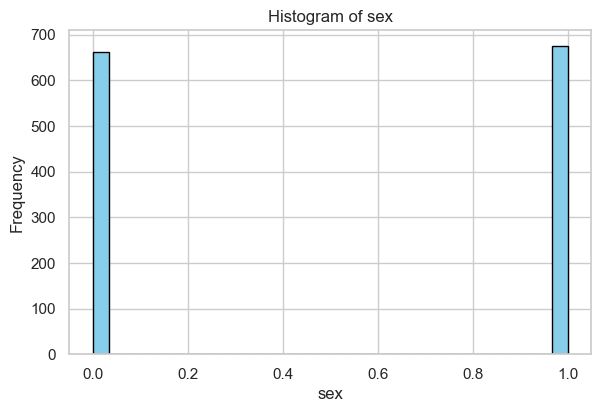

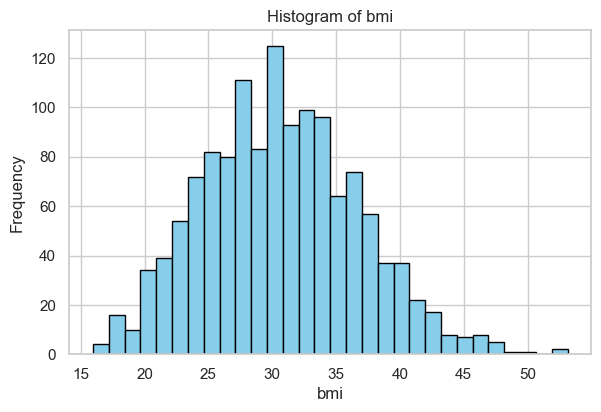

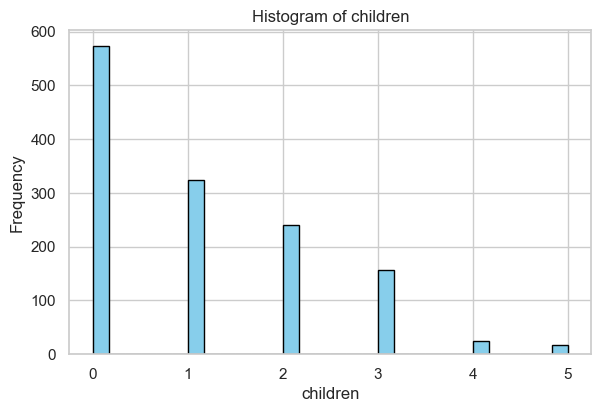

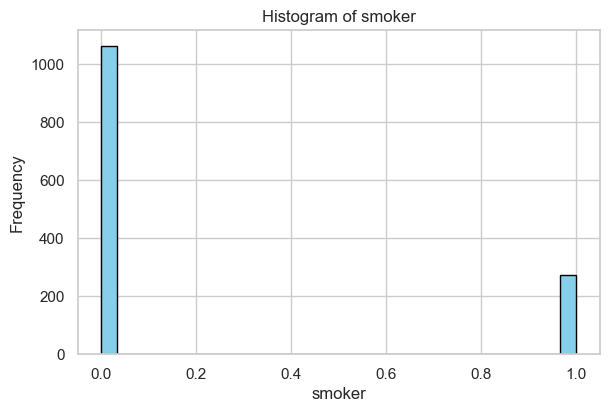

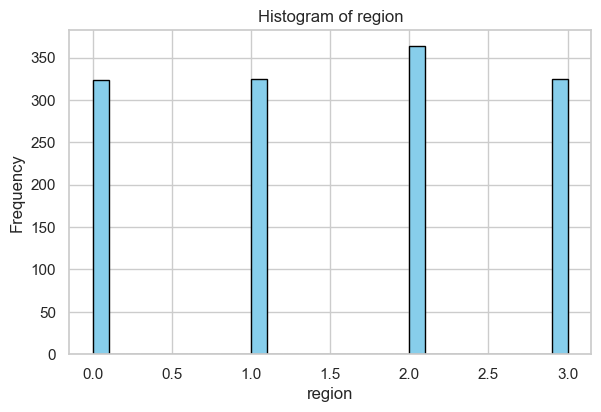

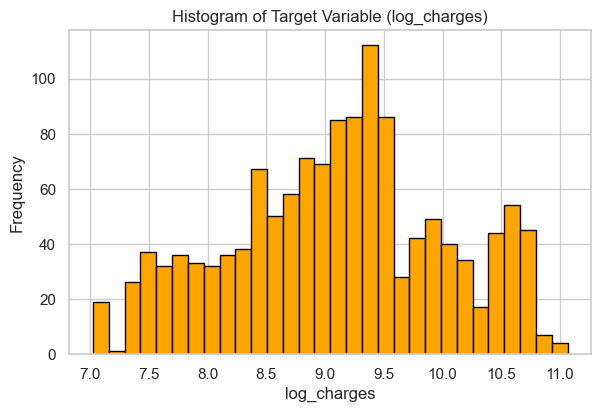

In [26]:
# Plot histograms for each feature and then the target. the data looks good now


for column in X.columns:
    plt.figure(figsize=(6, 4))  # Create a new figure for each feature (x column)
    plt.hist(X[column], bins=30, color='skyblue', edgecolor='black') # then plot histogram
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Plot histogram for the target variable
plt.figure(figsize=(6, 4))
plt.hist(y, bins=30, color='orange', edgecolor='black')
plt.title("Histogram of Target Variable (log_charges)")
plt.xlabel("log_charges")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

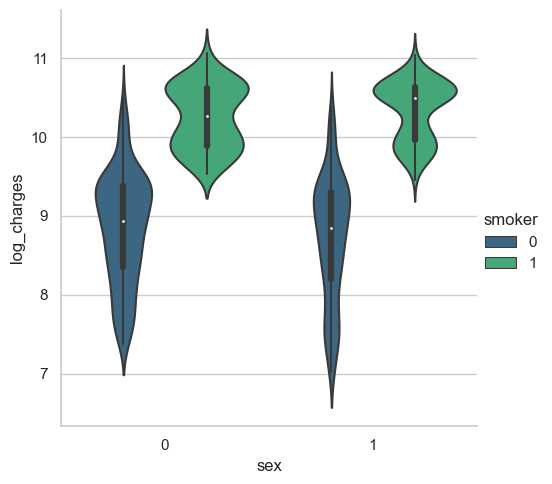

In [27]:
# Inpired by (hely333, 2018)
# This is a more advanced visualisation - violin plot. justified use: useful for visualizing the distribution, density, and variability of data across different categories in a creative way
# Wider means more data points, for example, for sex =0 (female) the wider green plot means that for female smoker (smoker =1) there are a lot of people between log_charges 9 and 11
# Bimodal plots for the green plots (two wide bumps inside the plot), meaning for both male and female smokers, there are two common groups inside each of these green plots



import seaborn as sns

sns.catplot(x="sex", y="log_charges", hue="smoker",
            kind="violin", data=df, palette = 'viridis')

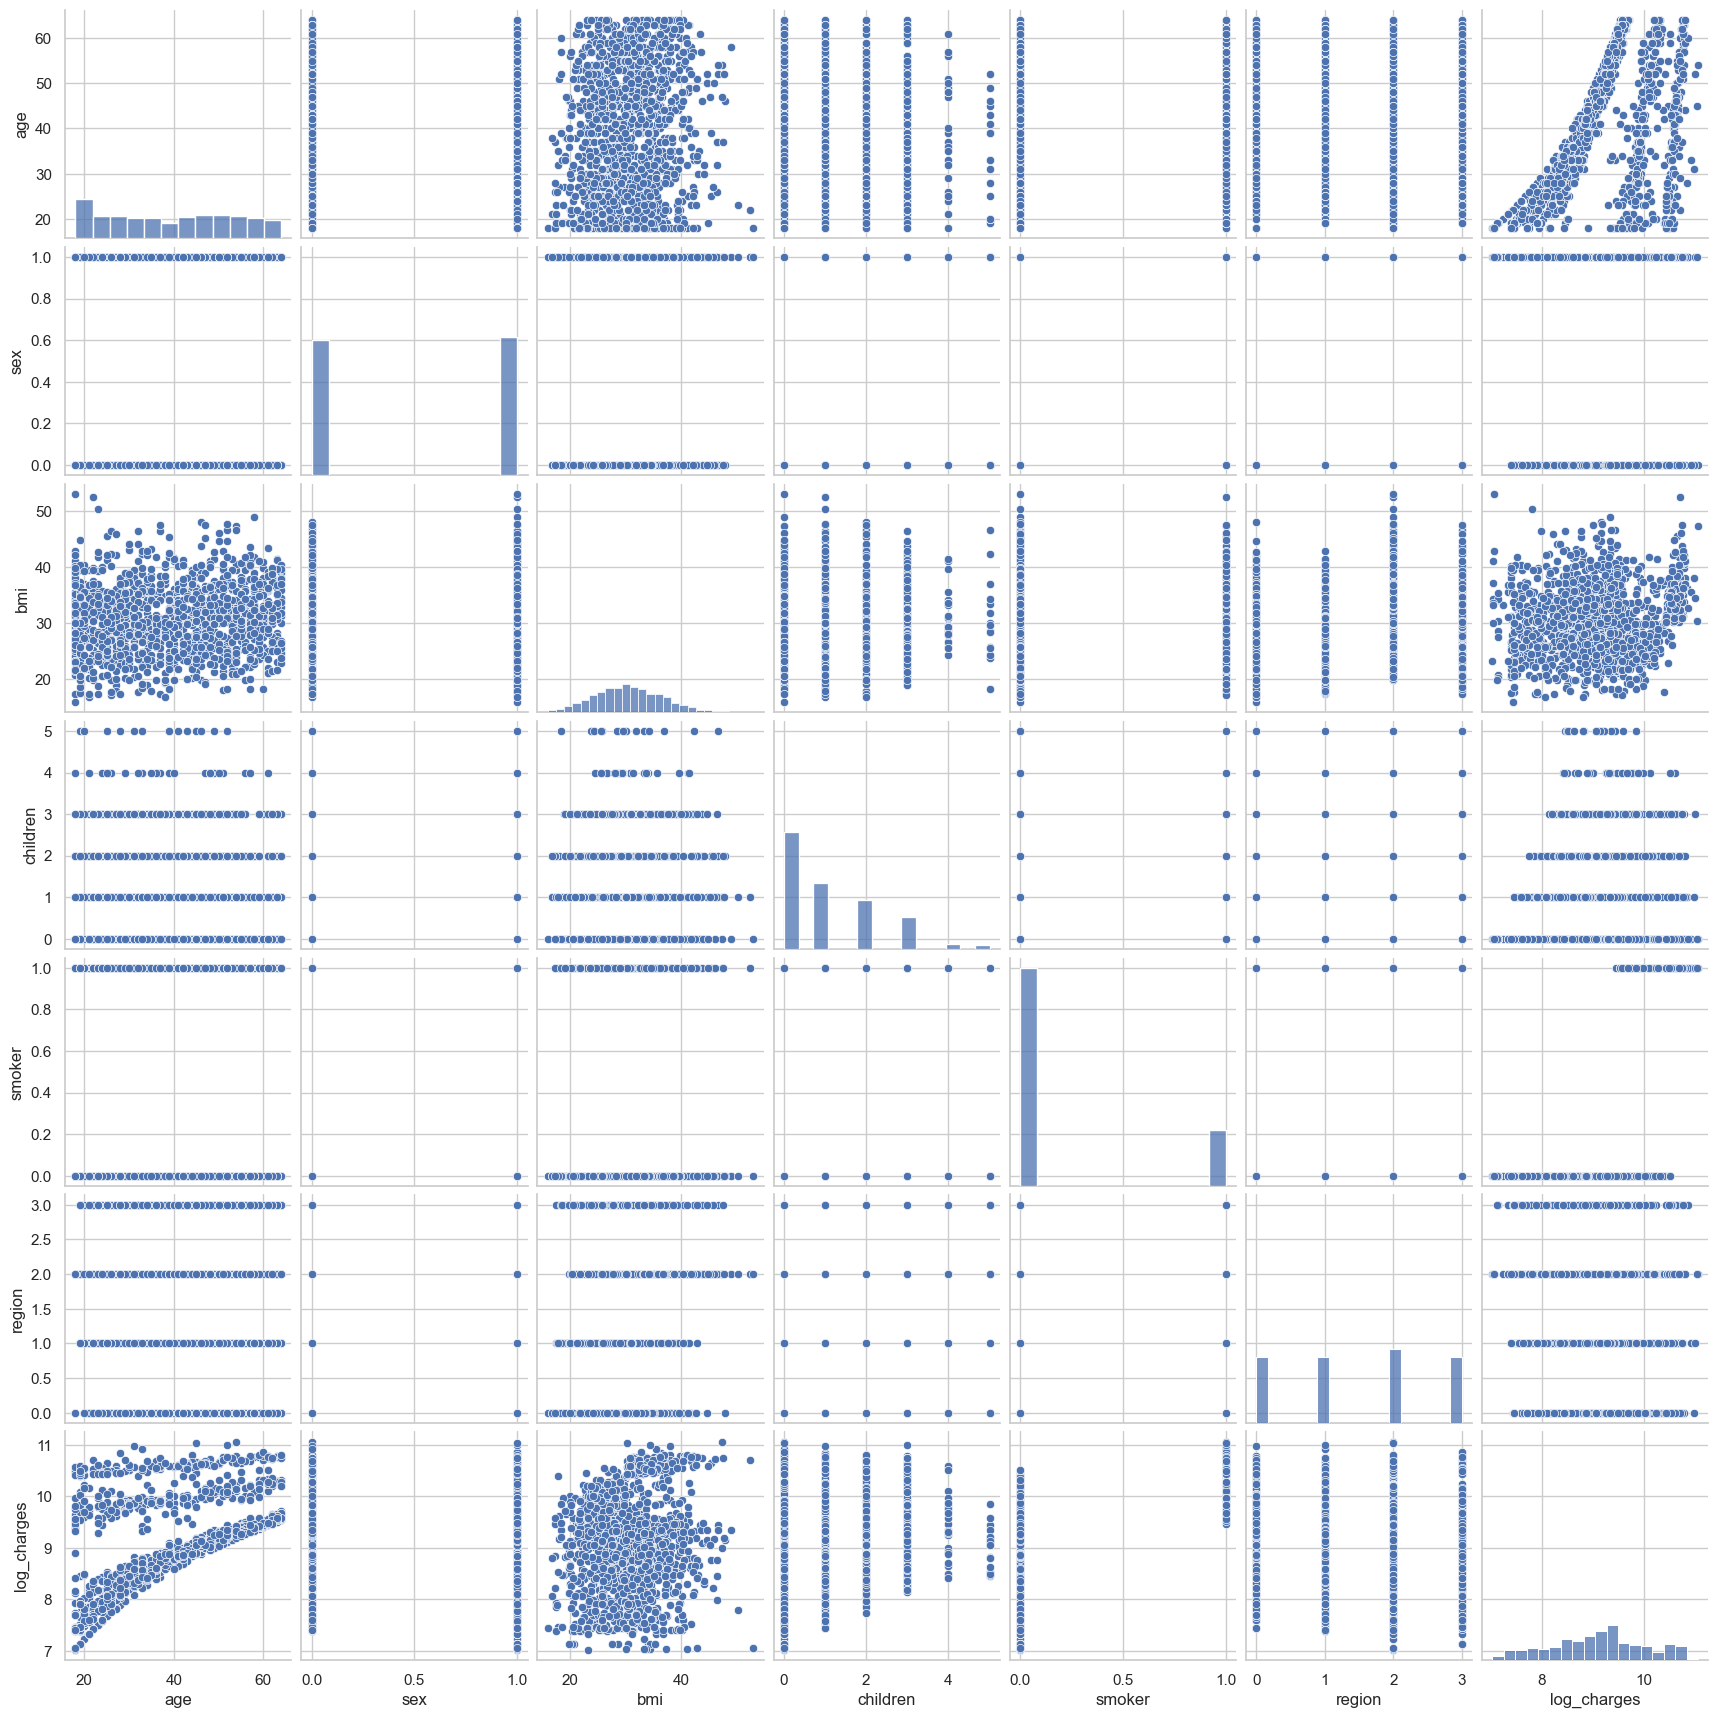

In [28]:
# Further visualisation - Seaborn used to create a pair plot for visualizing the relationships between multiple variables in the dataframe
# This allows bivariate analysis
#Seaborn used to create a pair plot for visualizing the relationships between multiple variables in the dataframe

import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df)
plt.show()

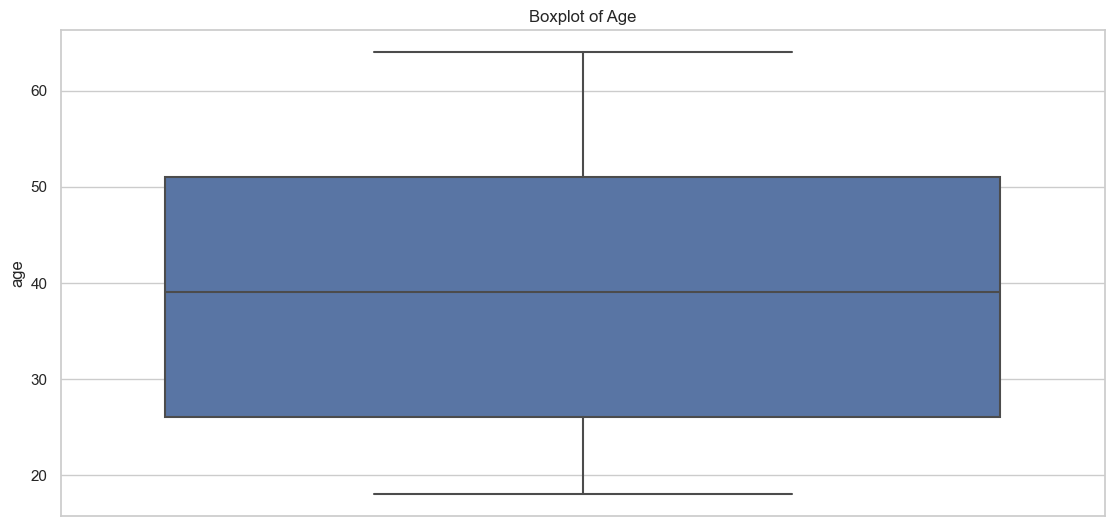

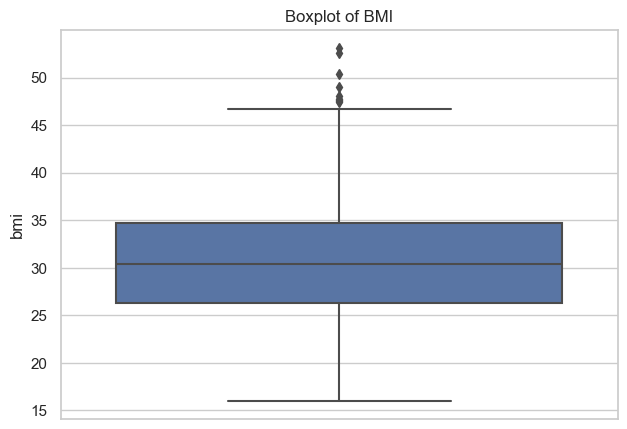

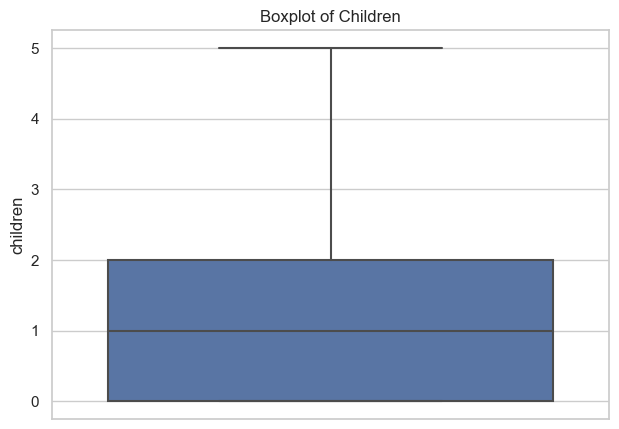

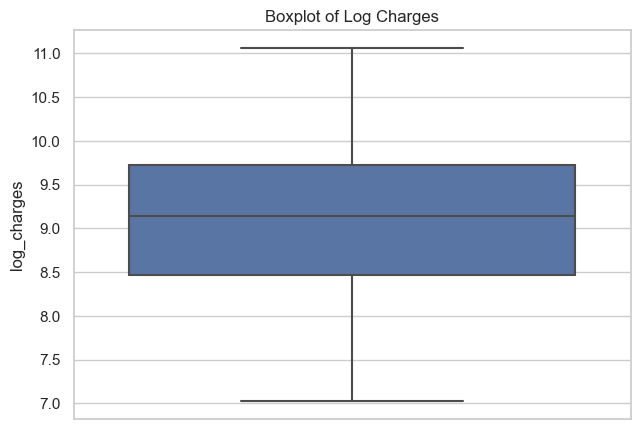

In [29]:
# Creating separate boxplots for each numerical column. I will not put them all on one figure because it will squeeze the boxplots and it will be harder to understand
# The boxplots show that even though bmi has a few outliers, they are not severe and so no changes need to be done. ALl boxplots are nearly normalised - no skew which is good

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))


sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.show()

sns.boxplot(y=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()

sns.boxplot(y=df['children'])
plt.title('Boxplot of Children')
plt.show()

sns.boxplot(y=df['log_charges'])
plt.title('Boxplot of Log Charges')
plt.show()



<Axes: title={'center': 'Women - Box plot for charges'}, xlabel='log_charges', ylabel='smoker'>

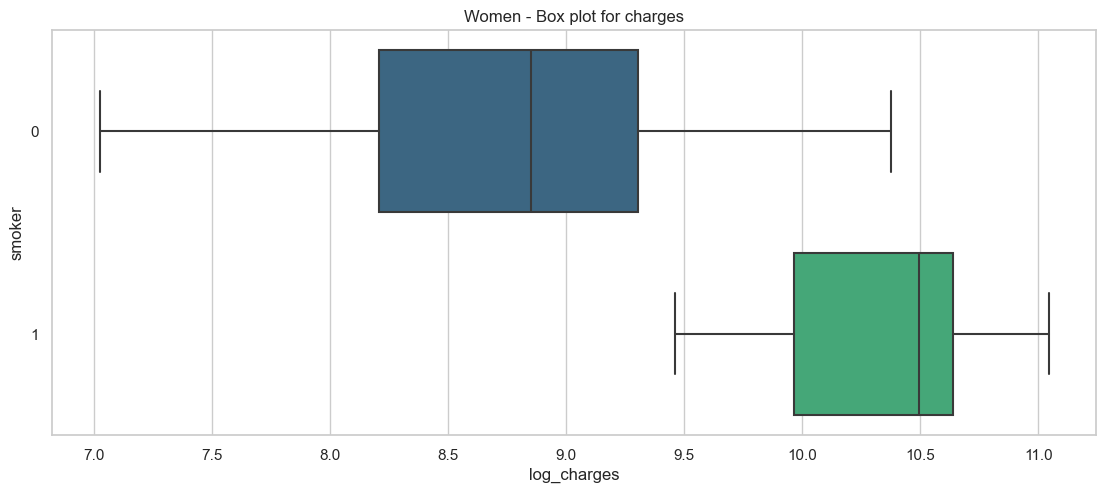

In [30]:
# (hely333, 2018)
# Generally smoker women have more charges
# both plots left skewed (median line is towards right side. Mean<median)
# For the green plot, the left skewdness means most women smokers have high charges, but a minority have unsually lower charges
# For the blue plot, the left skewdness means for women non smokers, most women have moderate log_charges, but some have unusually low charges



plt.figure(figsize=(12,5))
plt.title("Women - Box plot for charges")  # Create boxplots for women smokers and their charges
sns.boxplot(y="smoker", x="log_charges", data =  df[(df.sex == 1)] , orient="h", palette = 'viridis')

<Axes: title={'center': 'Men - Box plot for charges'}, xlabel='log_charges', ylabel='smoker'>

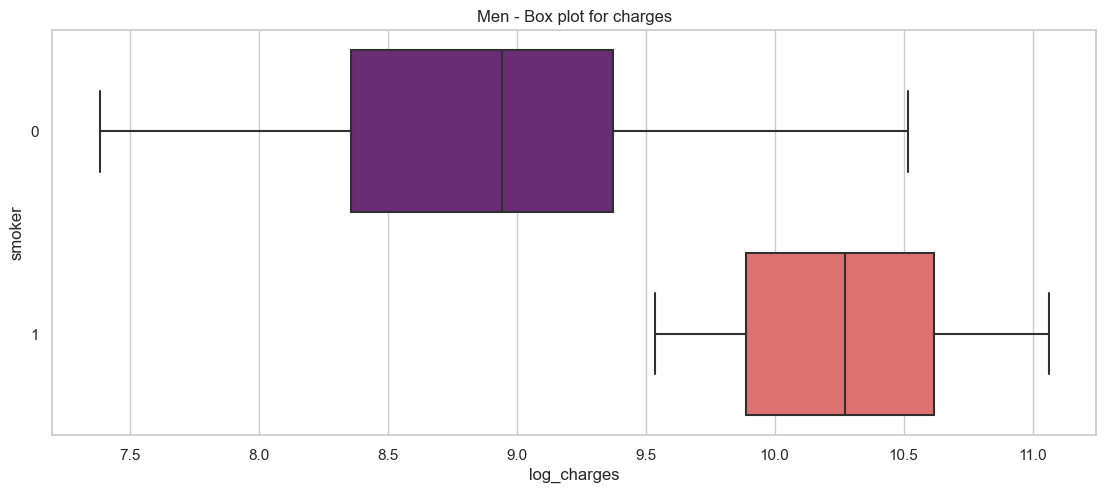

In [31]:
# (hely333, 2018)
# Generally smoker men have more charges
# the plot for non smoker men is left skewed (median line is towards right side. Mean<median). But for smokers, it is ALMOST normal
# For the pink plot, the almost normal distribution means the charges are pretty much evenly distributed around the meidan
# For the blue plot, the left skewdness means for men non smokers, most women have moderate log_charges, but some have unusually low charges


plt.figure(figsize=(12,5))
plt.title("Men - Box plot for charges")# Create boxplots for men smokers and their charges
sns.boxplot(y="smoker", x="log_charges", data =  df[(df.sex == 0)] , orient="h", palette = 'magma')

<Axes: >

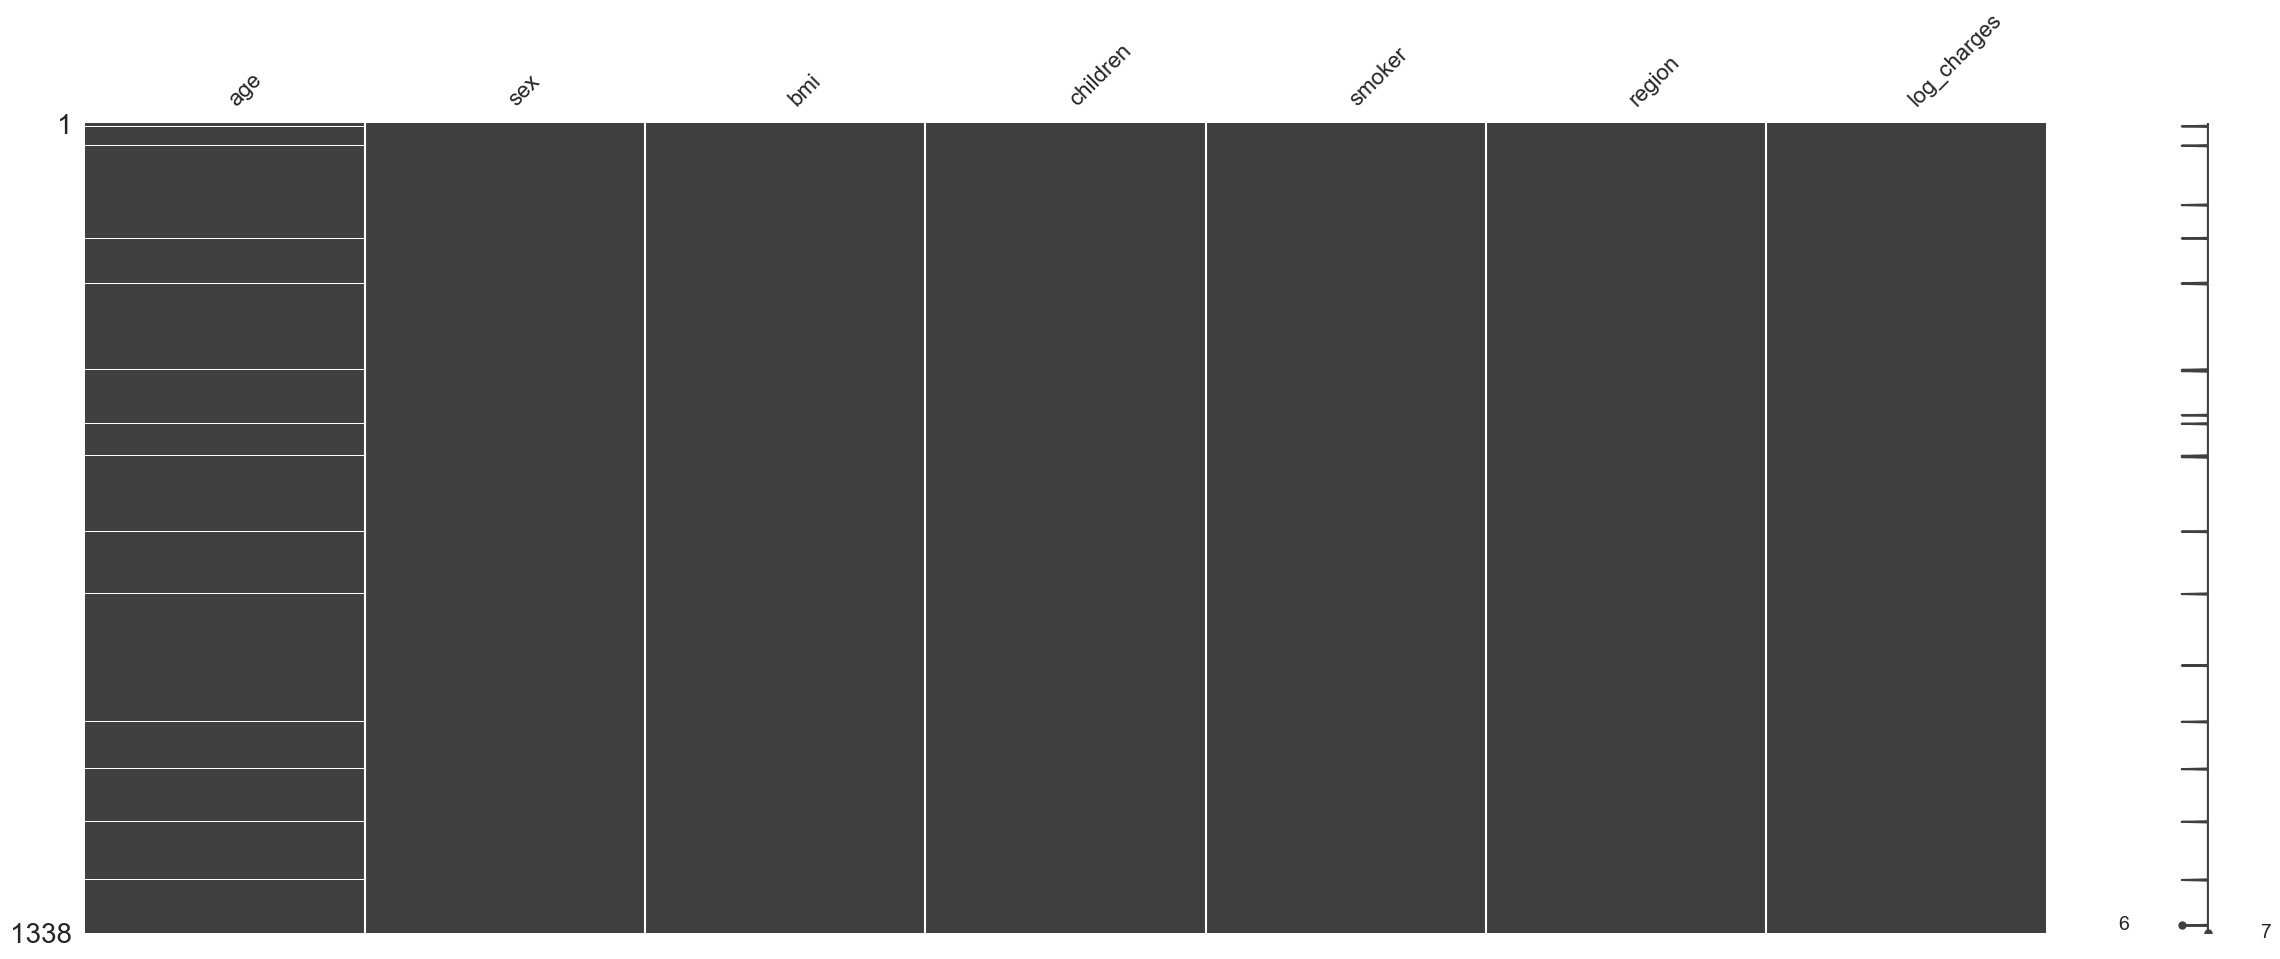

In [32]:
# this is another advanced visualisation. justify its use: shows us in a visually interesting way WHERE the exact missing samples are to understand the data better
# The code below shows the distribution of the missing data



#using missingno package


# Checking the missing values. All missing values are from the age column
msno.matrix(df)



<Axes: >

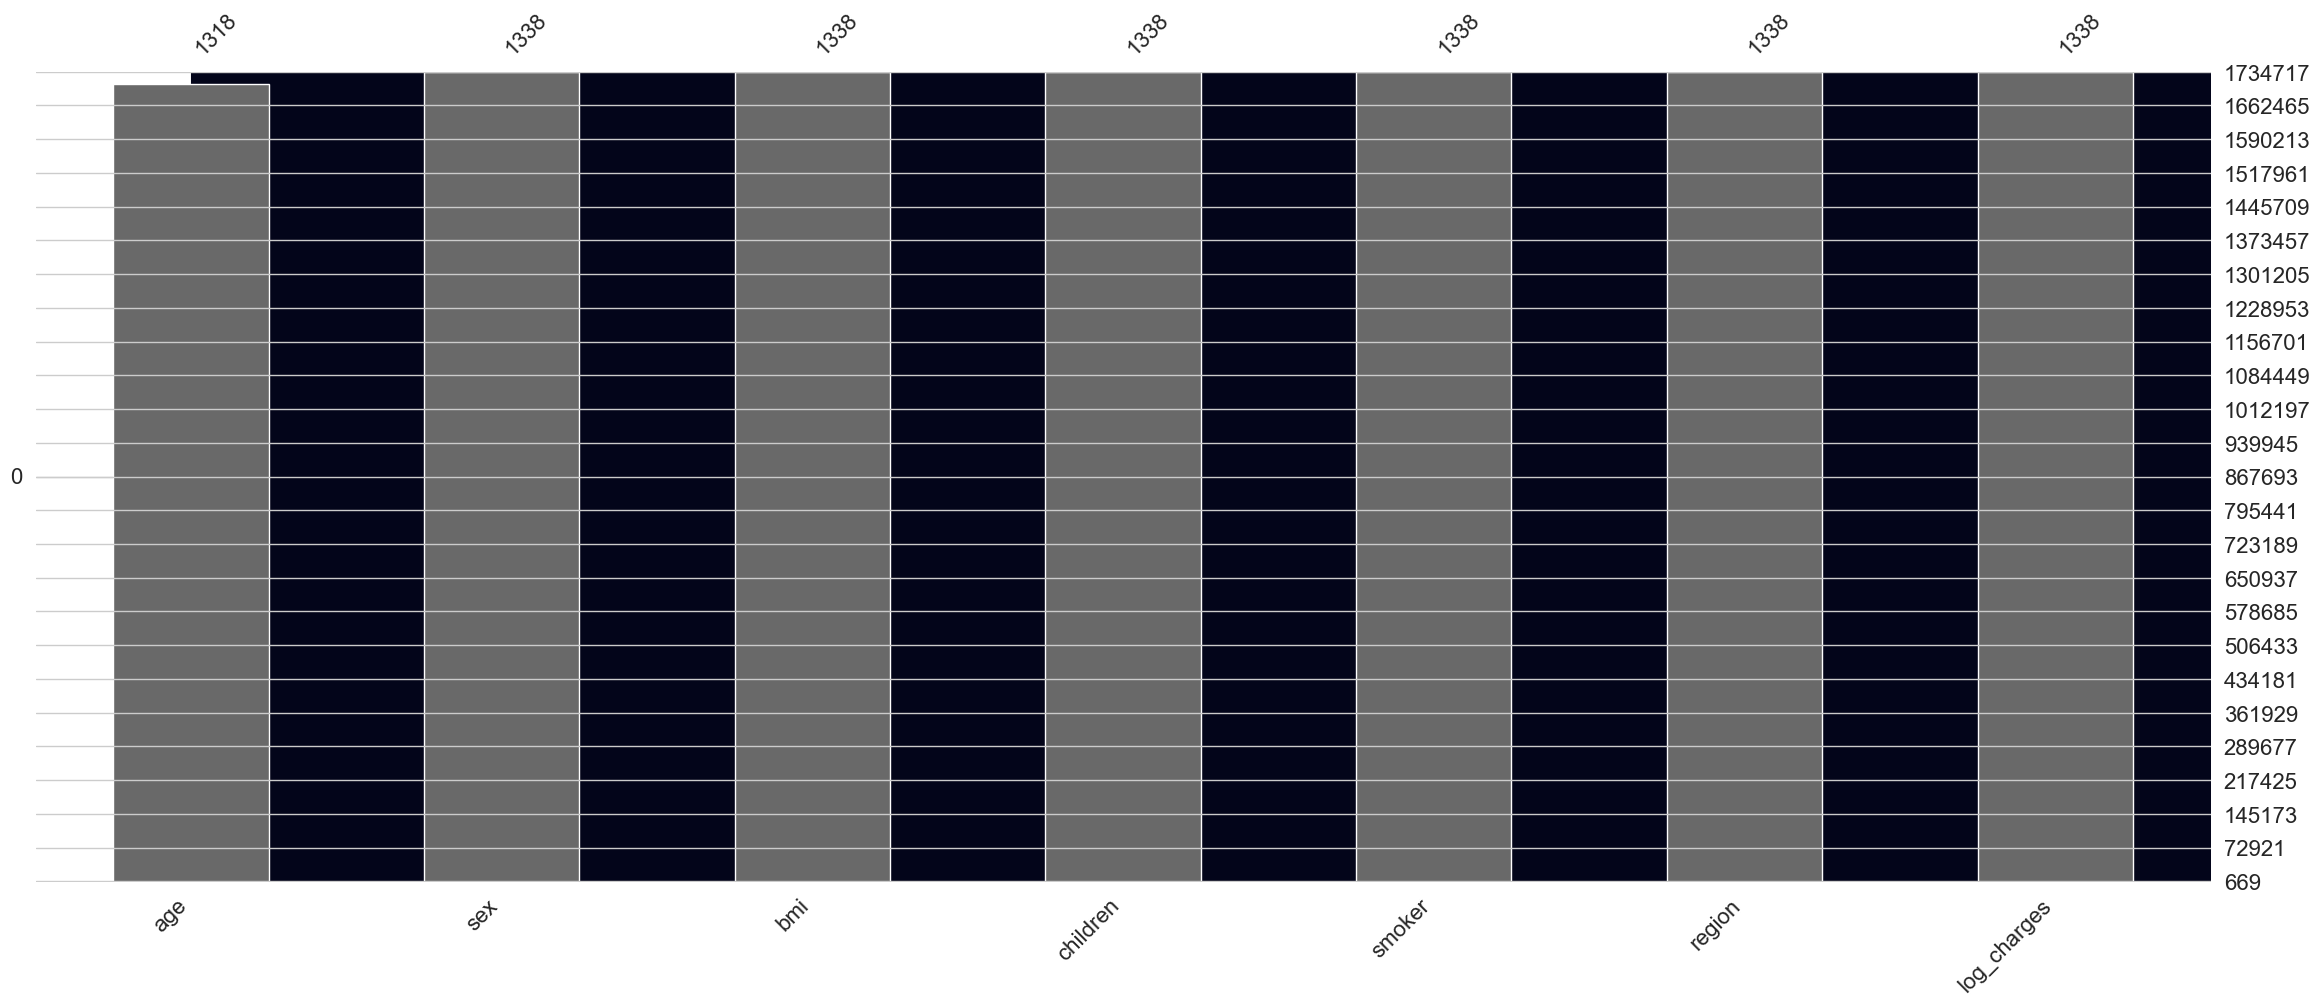

In [33]:
# This further shows the missing values (20 from the age column)
sns.heatmap(df.isnull(), cbar=False)
msno.bar(df)

<Axes: >

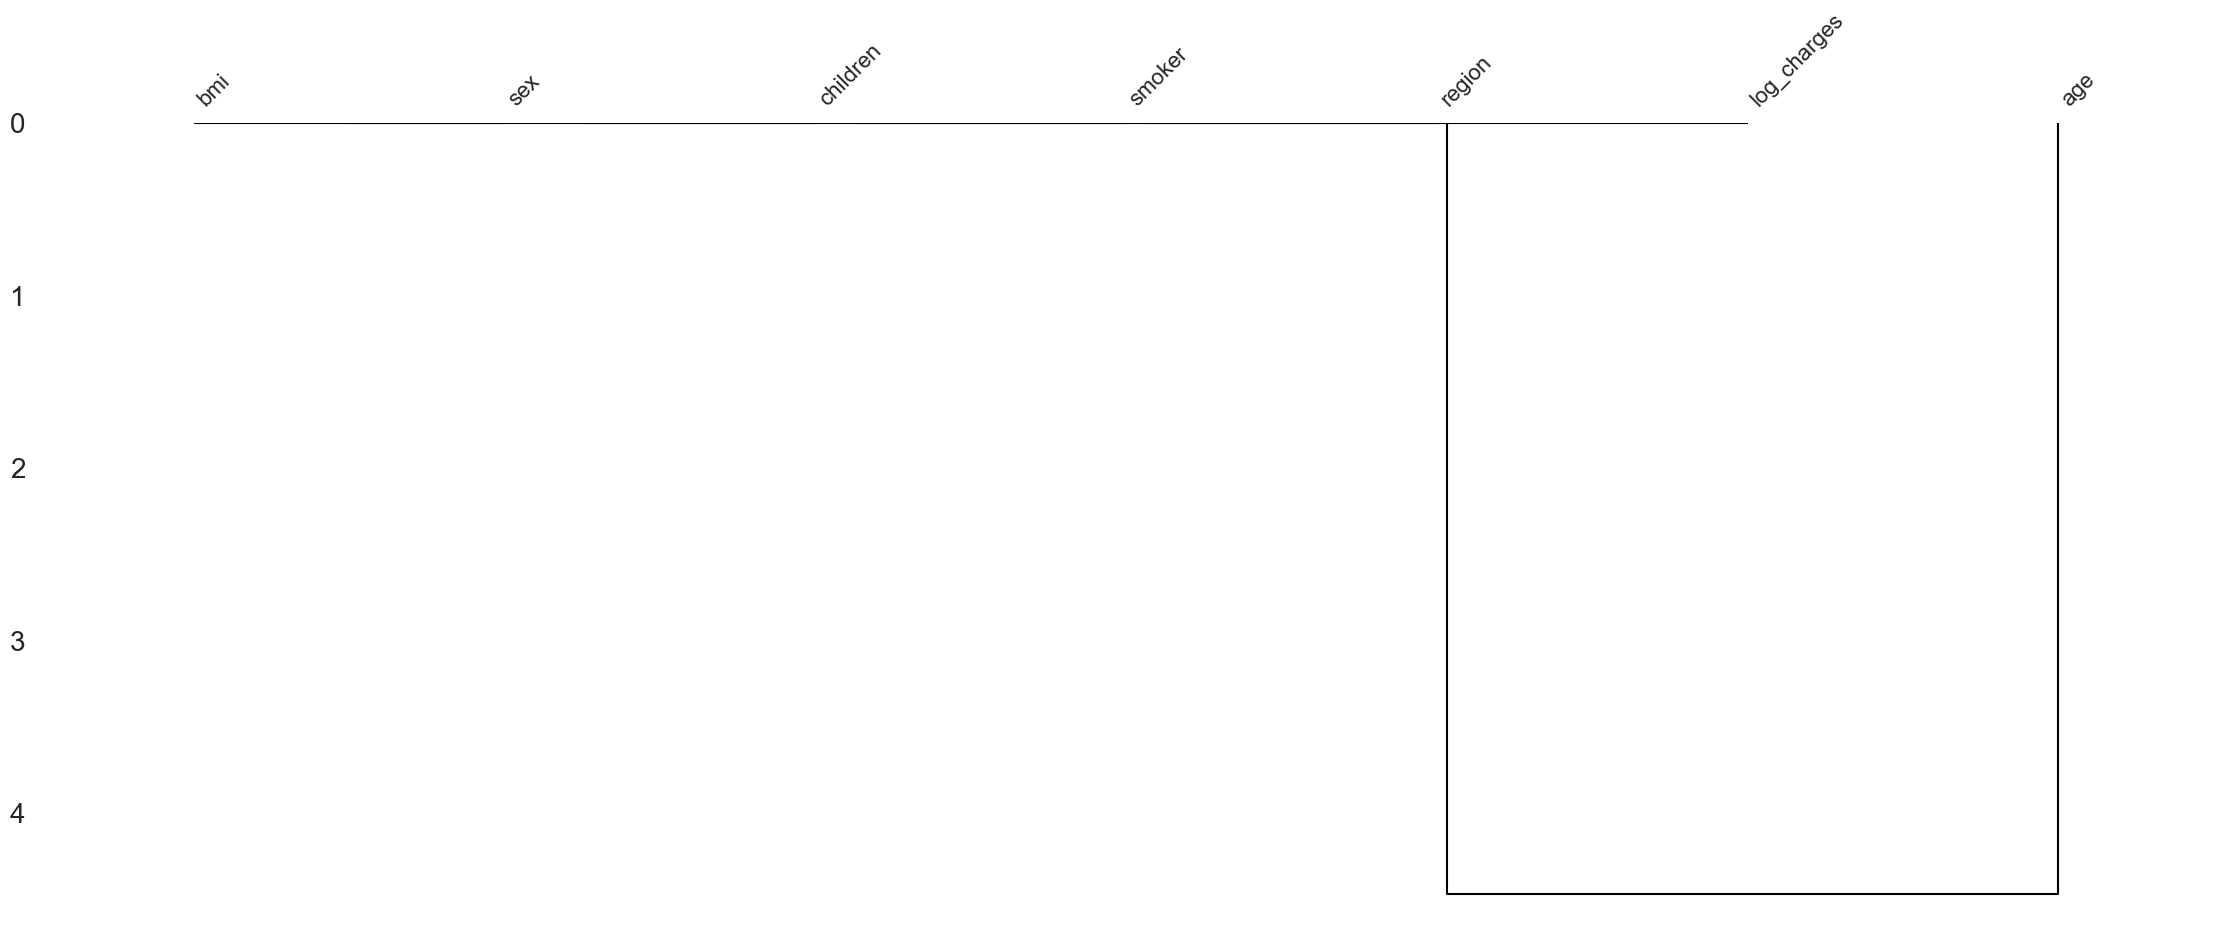

In [34]:
# this is another advanced viusalisation. justified: shows us if missing data is related to another feature
msno.dendrogram(df)   #The connection between age and region suggests that the missing values in age may have some sort of relationship with the values present in region column

**Why specifically is data from the age column missing?**

1) The data for the dataset may have been collected through online surveys or online forums where people may be worried about their infromation being used against them. The participants may intentionally leave their 'age' blank for privacy reasons.
2) Software issues may lead to not all the age values being saved
3) Maybe in some cases, the 'age' field is not mandatory to be answered, therefore some participants leave it blank

This type of missing data is most likely missing at random, or MAR. This is because the missing age vlalues could be related to other dataset features like region, as the dendogram above has shown. 


In [35]:
# inspired by (hely333, 2018)


p = figure(width=500, height=450, title="Charges vs Age - Non-Smokers")  # A blank bokeh figure, with 500x450 dimensions. 

p.circle(x=df[df.smoker == 0].age, y=df[df.smoker == 0].log_charges,   # Scatter plot with circular markers for age of non smokers vs charges
          size=7, line_color="navy", fill_color="red", fill_alpha=0.9)


show(p)


In [36]:
# inspired by (hely333, 2018)

p = figure(width=500, height=450, title="Charges vs Age - Smokers")  # A blank bokeh figure, with 500x450 dimensions. 

# Add circles to the plot for non-smokers
p.circle(x=df[df.smoker == 1].age, y=df[df.smoker == 1].log_charges,  # Scatter plot with circular markers for age of smokers vs charges
          size=7, line_color="navy", fill_color="blue", fill_alpha=0.9)

# Show the plot
show(p)

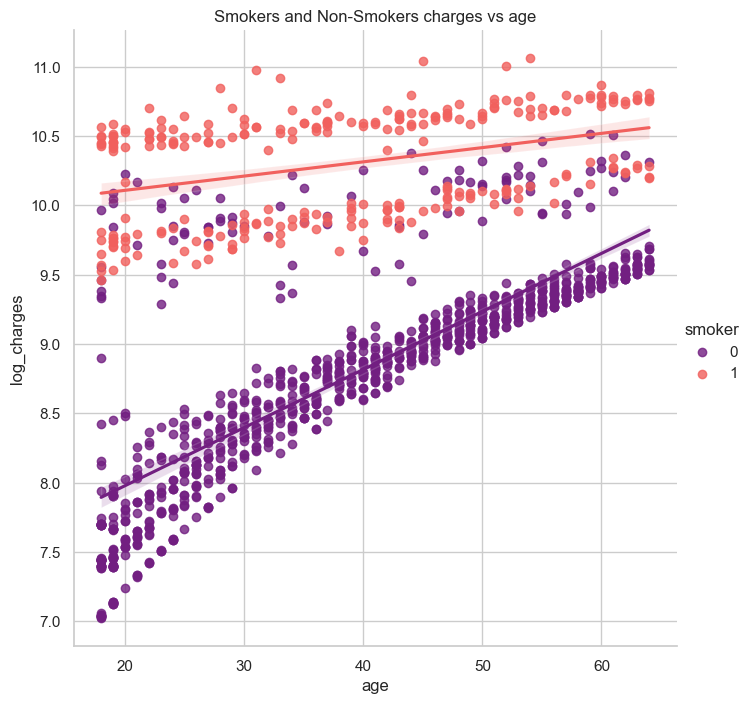

In [37]:
# inspired by (hely333, 2018)



# In general, the purple dots represent the non smokers and are lower on the plot,  because not smoking means better health and hence lower charges. 
# In general, the red dots represent the smokers and are higher on the plot,  because smoking means worse health and higher charges
# The plots show us that for non-smokers (smoker = 0), the  costs clearly increases with age which makes sense as more age means more medical insurance costs. However, in smokers (smoker=1), the relationship is less clear.
# The confidence interval ( the shaded area around the lines) is wider for smokers, meaning the computer is less certain of the linear relationship for smokers
# But why is that?
# The non-smokers in the dataset are much more than smokers as we investigated before
# The more people, the better the predictions. So, for the smokers, there are less people, so the estimates are less reliable and the relationship isnt as certain 

# There is more variability for smokers in regards to costs with age (because of wider data point spread), compared to non smokers
# Furthermore, the relationship between age and log_charges for non smokers is stronger than smokers as shown by the steeper line




sns.lmplot(x="age", y="log_charges", hue="smoker", data=df, palette='magma', height=7) # sns lmplot to create a scatter plot

# title
plt.title('Smokers and Non-Smokers charges vs age')


plt.show()


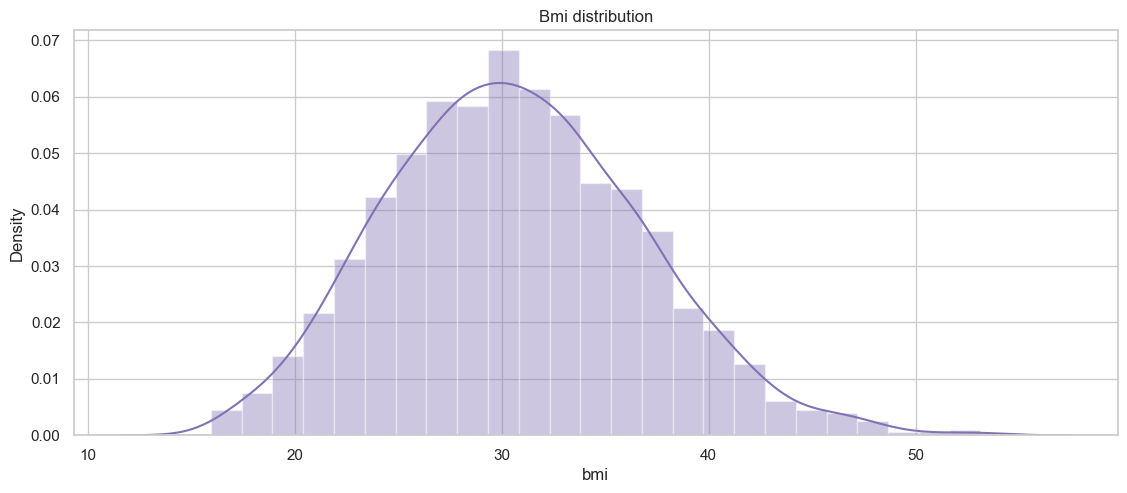

In [38]:
# inspired by (hely333, 2018)
# Lets look at the BMI again to analyse it more closely
# the average BMI from the graph looks to be about 30

plt.figure(figsize=(12,5))
plt.title("Bmi distribution")
ax = sns.distplot(df["bmi"], color = 'm')

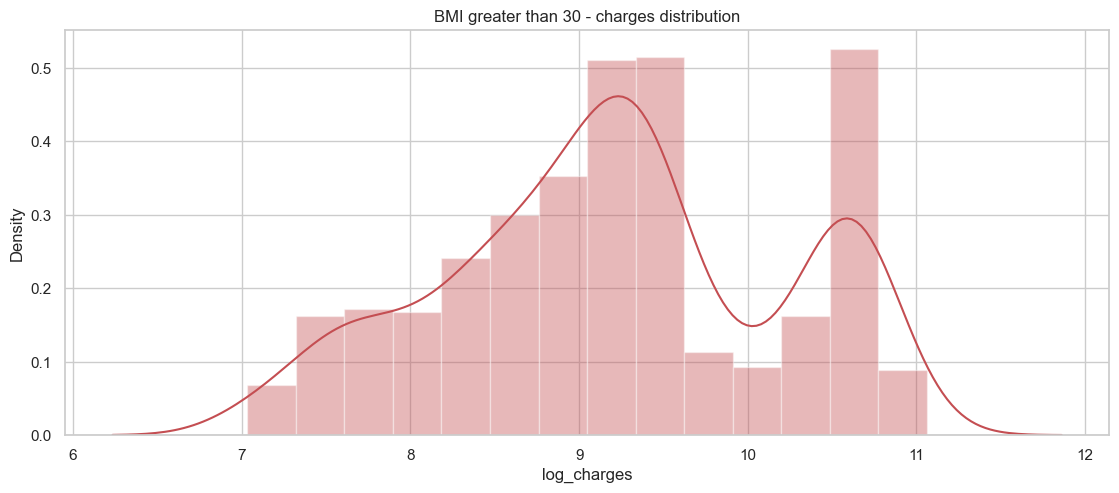

In [39]:
# inspired by (hely333, 2018)
# I will now split my analysis of the BMI into two - below and over 30 BMI, because over 30 BMI indicates obesity (NHS inform, 2023)
# This can allow us to compare how obese vs non obese people compare in terms of medical charges


plt.figure(figsize=(12,5))
plt.title("BMI greater than 30 - charges distribution")
ax = sns.distplot(df[(df.bmi >= 30)]['log_charges'], color = 'r')


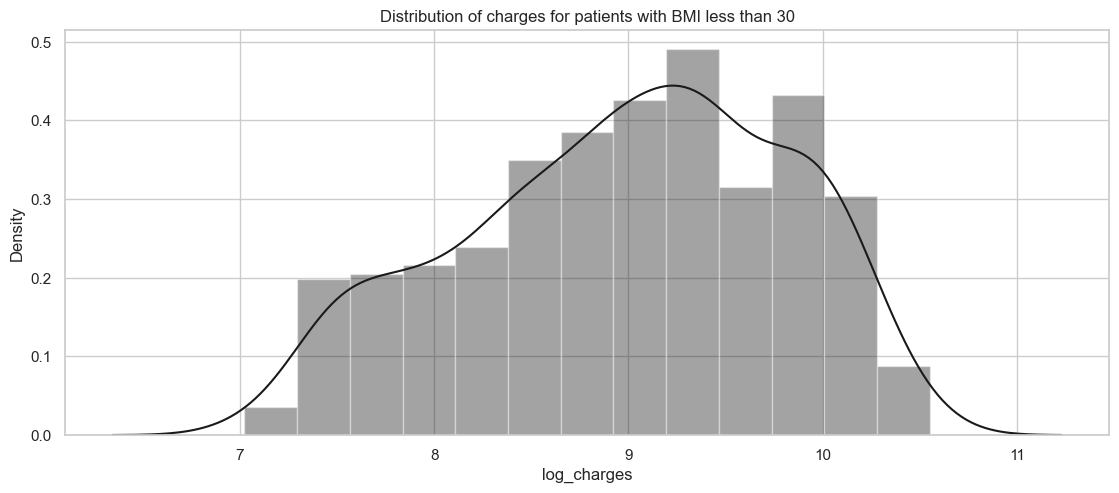

In [40]:
# inspired by (hely333, 2018)
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['log_charges'], color = 'k')

# Both these graphs indicate that people with BMI over 30 (obese) have higher costs/treatment costs

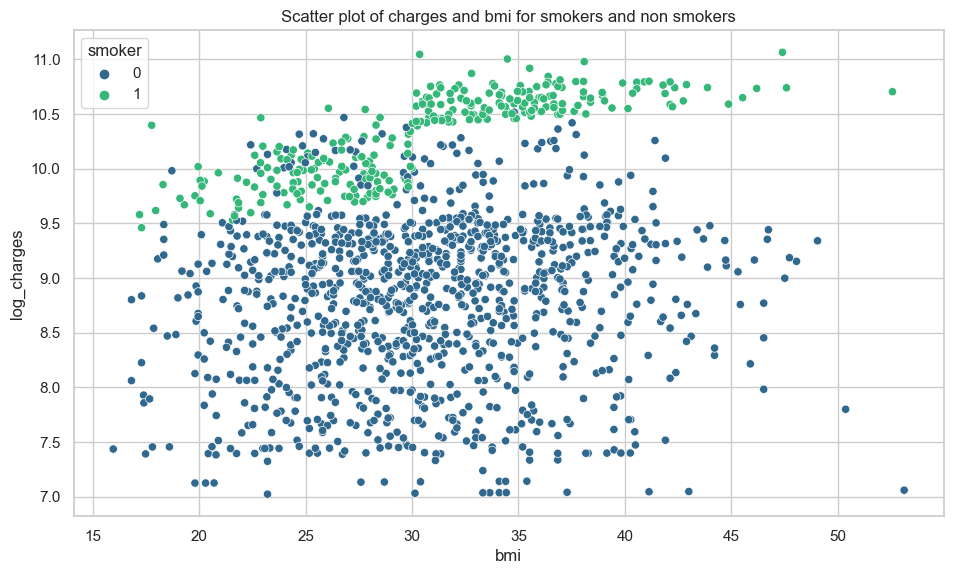

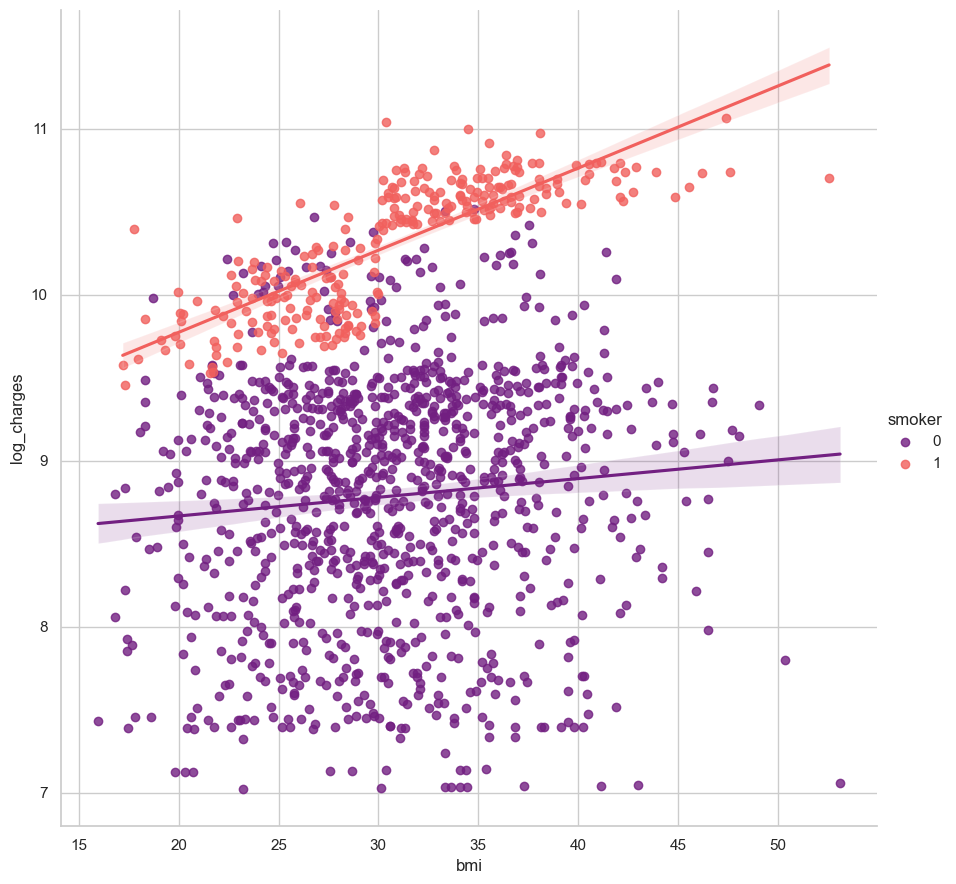

In [41]:
# inspired by (hely333, 2018)
# The figures below show that both for non smokers and smokers, the confidence ninterval is quite wide, there is some uncertainty over the predictions
# The convidence interval is wider for non-smokers, less certainty over the predicted data points, more variability in the model's estimates
# However, the relationship between BMI and charges for smokers is much stronger than for non smokers (steeper line)
# This indicates that changes in BMI have a more signifcant effect on medical charges for smokers than for non smokers. Higher BMI for a smoker indicates significantly higher charges
#  The line is less stepp for non smokers. Higher BMI for a non smoker indicates GRADUALLY higher charges, the increase in charges is not significant
# Note that the relationship between bmi and log_charges is quite complex if we ignore the smoker category
# , there is NOT a strong linear relationship, in fact it seems like there are some non linearities which tells us that a linear rregression model will probably not be the best one

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='log_charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of charges and bmi for smokers and non smokers')

sns.lmplot(x="bmi", y="log_charges", hue="smoker", data=df, palette = 'magma', height = 9)  #lmplot to plot scatter plot

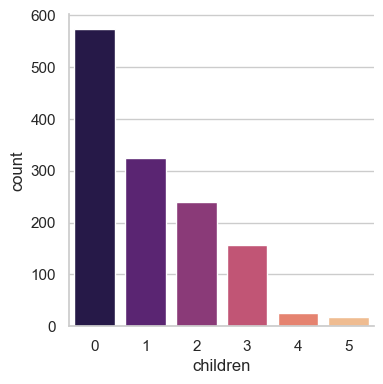

In [42]:
# inspired by (hely333, 2018)
# Now lets analyse the children number
# This graph indicates the highest count is for children = 0- most participants have no children

sns.catplot(x="children", kind="count", palette="magma", data=df, height = 4)

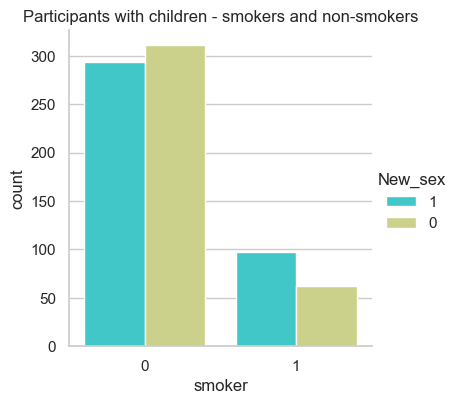

In [43]:
# inspired by (hely333, 2018)
# Note here I will plot the count of smoker and non smoker males and females with one ore more children
# I will set the hue ( the colour of the bars) to 'sex'
# I will create a temporary dataset column for the 'sex' variable, converting it to a string only temporarily to prevent ERROR as seaborn wants the hue to be categorical in this instance
# seaborn hue cannot be numerical, I encoded it previosly so its numerical, so now temporarily making it into a string

df['New_sex'] = df['sex'].map({0: '0', 1: '1'})   # map values of sex (male and female) to 1 and 0


sns.catplot(x="smoker", kind="count", palette="rainbow", hue="New_sex", data=df[df['children'] > 0], height=4) # Includes those people with one or more children

# title of the plot
plt.title('Participants with children - smokers and non-smokers')

plt.show()

# Drop this new column-not needed
df.drop(columns=['New_sex'], inplace=True)


# This shows that non-smoking people with children are in much higher numbers than smokers

# <span style="color:red">Summary of EDA (Under 500 words)</span>

### <span style="color:red">Goals:</span>
1. **Understanding the structure of the data** – categorical, continuous, etc. as well as dimensions and statistics of the dataset
2. **Identify outliers and missing values**
3. **Discover correlations and visualize relationships**

---

### <span style="color:red">Findings Summarized:</span>
- 20 missing values in the `age` feature (1.49%).
- We need to do regression to predict costs because the target variable is a continuous number. **No classification**.
- No highly correlated features.
- No extreme outliers.
- **Charges feature** needed normalization — Applied a logarithmic function to create a new feature, `log_charges`.
- 3 **categorical features** required encoding: `sex`, `smoker`, `region`.
- Used **label encoding**.
- Dataset contains **1,338 samples**.

---

### <span style="color:red">Ethics (‘Examples — Deon’, n.d.)</span>:

#### <span style="color:red">A.1 Informed Consent</span>

**Response:**
- We must ensure that the dataset follows data protection laws (e.g., GDPR) related to personal/medical data use. In the dataset, there are no names mentioned so that is good (anonymous). No personal identifiers. 
- Usually, we would need to ensure consent of participants regarding using their data. However, the Medical Cost Personal Dataset (CHOI, 2017) mentions that these datasets are in the public domain, so no ethical concerns with using them.

#### <span style="color:red">A.3 Limit PII Exposure</span>

**Response:**
- Both datasets are anonymous.

#### <span style="color:red">C.3 Honest Representation</span>

**Response:**
- For example, in Georgia it was reported that the department of health showed a COVID-19 cases graph that wrongly showed a steeper fall in the number of cases over time because the dates were **NOT ordered chronologically** (Collins, 2020).
- For this dataset, if graphs are not represented honestly, then the users of these algorithms, for example, insurance companies, could start **overcharging/undercharging customers**. This can lead to customers losing trust in these insurance companies. These are serious consequences, so we must ensure we represent data honestly.
- Visualizations in my project have been done in an honest way. Various methods were used, including histograms, pair plots, box plots, etc. The results were all analyzed to ensure that the trends/relationships make sense without any false representation.

---

### <span style="color:red">Reflections:</span>
- I thought the **insurance dataset** was much easier to carry out and digest EDA for compared to the **music dataset**, because of there being much fewer features. 
- Getting clarification on using tools like **pandas** to manipulate data and **matplotlib/seaborn** to visualize relationships is a key milestone for me. It means I am now familiar with and have mastered doing the basics of machine learning visualizations, even though I found it a bit difficult at the start since there are so many different visualizations.
- Moreover, this project taught me how vital EDA is to solve any machine learning problem. Sometimes we have assumptions about the data, but we can only confirm these assumptions if we do EDA. It provides **evidence-based analysis** which is more important than our intuitions about what the dataset relationships are.
- In regard to my personal development, this EDA task helped with my **critical thinking skills** and understanding of data. It helped connect **machine learning** to the content I learned from other modules like my **‘Statistical Inference’** module, showing me how interlinked data science and machine learning are.


# 4. Data cleaning

The solutions for handing missing values:

1) Deletion methods
2) Single imputation methods
3) Multiple imputation methods
4) Model-based methods

Singe imputation is appropriate for MAR missing data like the age column in our dataset (‘Course Notes for 431 - 9  Missing Data and Single Imputation’, 2024). 
Furthermore, there is a small % of missing data so single imputation is enough, no need to overcomplicate it.

5       39.0
37      39.0
135     39.0
190     39.0
264     39.0
265     39.0
407     39.0
409     39.0
482     39.0
496     39.0
549     39.0
551     39.0
674     39.0
777     39.0
895     39.0
988     39.0
1066    39.0
1153    39.0
1249    39.0
1324    39.0
Name: age, dtype: float64


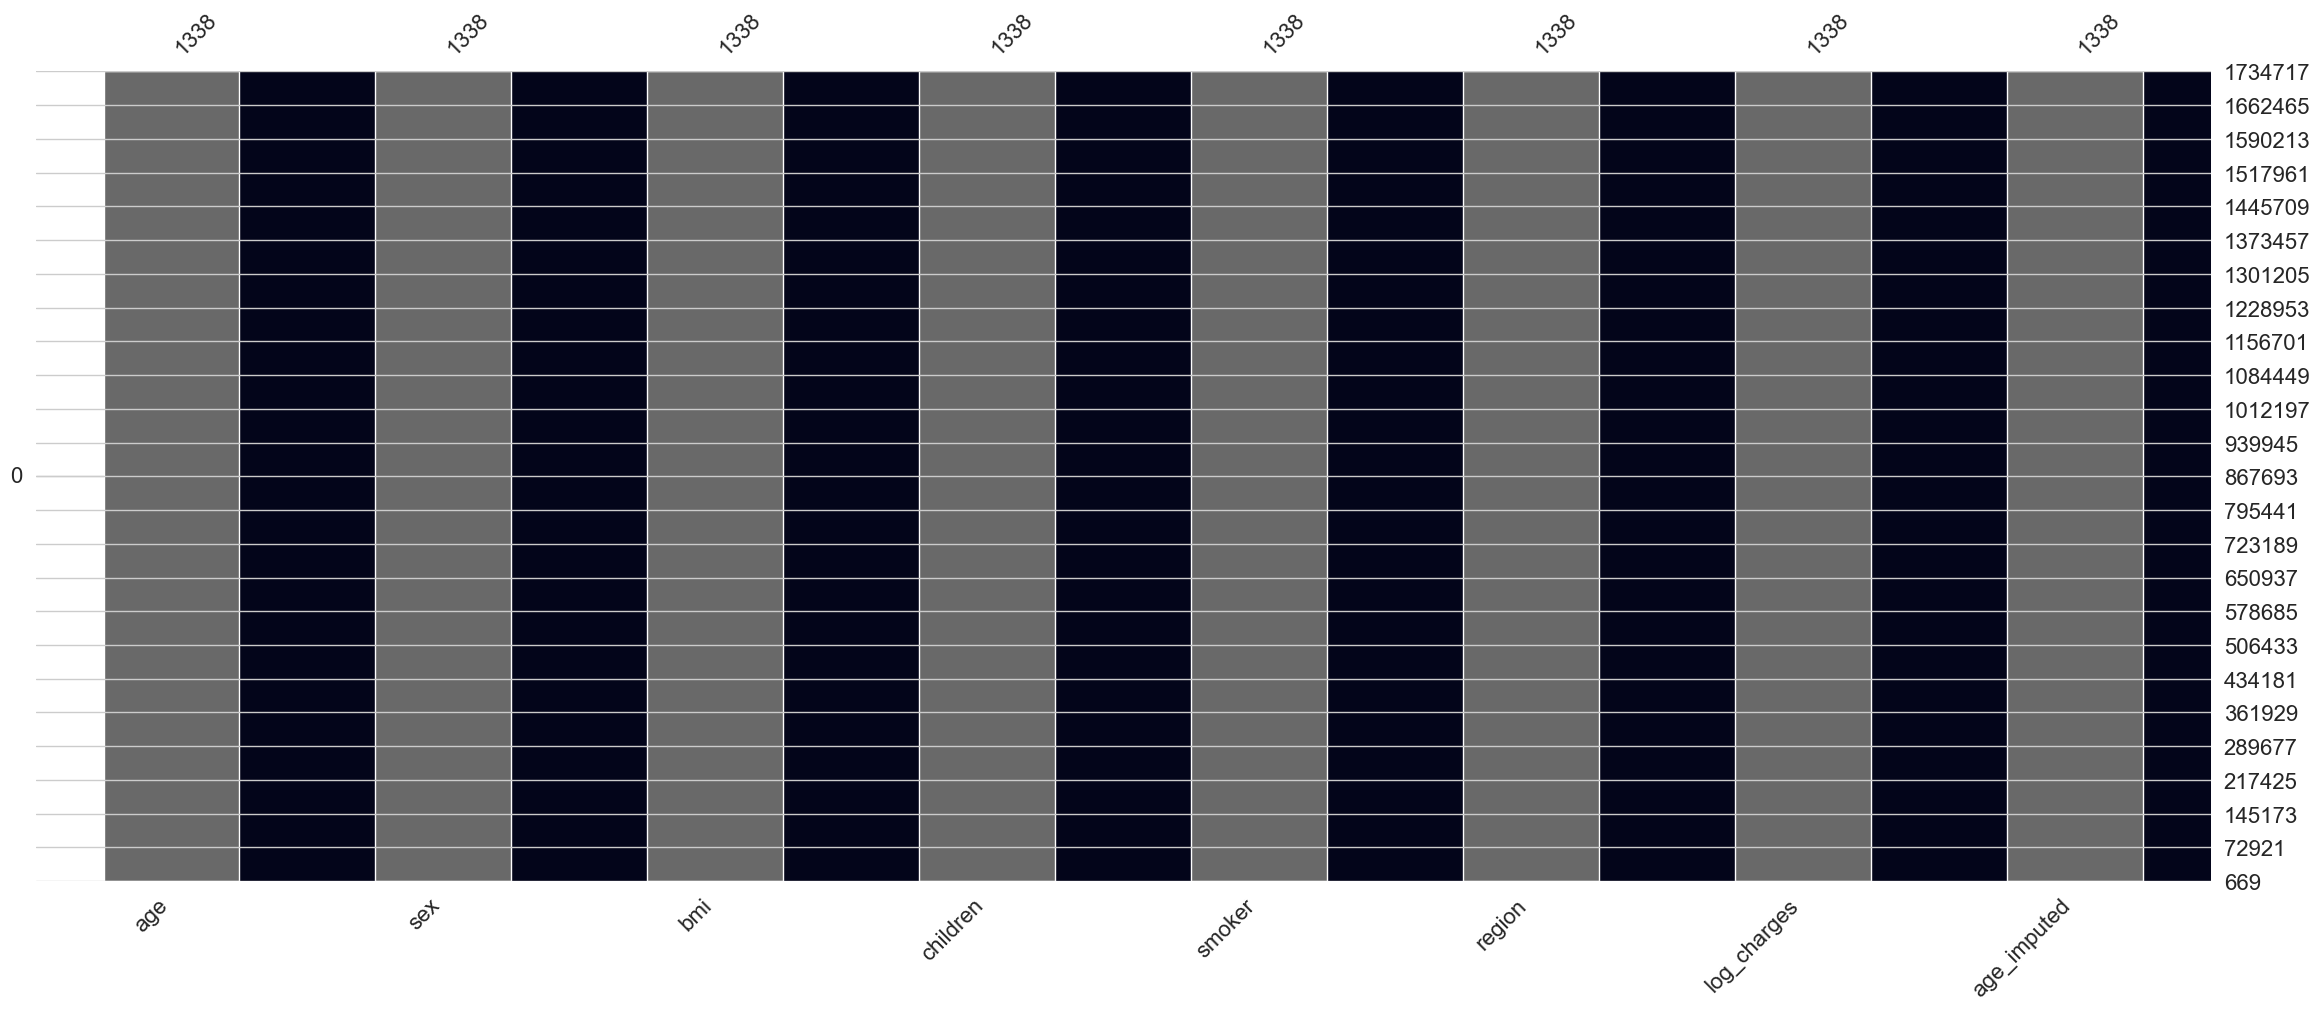

In [44]:
# Using median single imputation to impute missing values
# Miising values imputation can be done before or after visualisation: (Ayub Abu-zer, 2024). In this case, I did it after visualisation 
# Because I did not want the imputed values to affect the original structure of the data. I wanted to visualise the data as it was and understand it and THEN impute

# New TEMPORARY column in the dataframe. This column will say TRUE for all the age rows with a NAN missing value, and False if the value is present
df['age_imputed'] = df['age'].isna()  

# Fill NaN values with the median of the column - median imputation
df['age'].fillna(df['age'].median(), inplace=True)

# Visualize missing values - there should be no missing values now
sns.heatmap(df.isnull(), cbar=False)
msno.bar(df)

# This prints the values of the age, of the rows of age_imputed,  that are set to TRUE. These rows were missing before, but are now filled in, so we can see what values the imputation gave the rows
# All imputed values are 39 
imputed_values = df[df['age_imputed']]['age']  # Shows all 'age' values that were imputed
print(imputed_values)




In [45]:
# we dont need this new column now, so drop it. I only made it to see what the imputed age values will be
df = df.drop(['age_imputed'], axis =1)


In [46]:
# Checking for imputation bias. This is when the imputed values distort the original structure of the column
# For the age column in the statistics, if there is a significant change in the statistics, then this means bias was introduced
# Using the statistics to verify no bias - the only changes in the stats are the mean and the std being SLIGHLTLY lower
# This means no bias introduced, the imputed values (age = 39) fit the dataset well. No significant changes for the age column stats compared to before

df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.213004     0.505232    30.663397     1.094918     0.204783   
std      13.977445     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region  log_charges  
count  1338.000000  1338.000000  
mean      1.515695     9.098659  
std       1.104885     0.919527  
min       0.000000     7.022756  
25%       1.000000     8.463853  
50%       2.000000     9.146552  
75%       2.000000     9.719558  
max       3.000000    11.063045

In [47]:
# redefining X and y after imputation

X = df.drop(['log_charges'], axis = 1)
y = df.log_charges


**Comparing mean and median imputation using t-test**

In [48]:
# First using median imputation and linear regression


Lin_regressionimp1 = LinearRegression().fit(X,y)  # fit into linear regression model

# Cross-validation R-squared and MSE for first model
cross_val_r2_1 = cross_val_score(Lin_regressionimp1, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² for Model 1: {cross_val_r2_1.mean()}')

Cross-Validation R² for Model 1: 0.7590915836028289


In [49]:
# Now using mean imputation and linear regression

dfimp2=  pd.read_csv("insurance-adapted.csv")   # I will make a new dataframe, becasue the other one has already been imputed using median imputation


# mean imputation on the 'age' column
dfimp2['age'].fillna(dfimp2['age'].mean(), inplace=True)

# check if the missing values have been imputed
print("Missing values sum: ", dfimp2['age'].isnull().sum())  # Should print 0 if imputation is successful

encoderimp2 = LabelEncoder()
dfimp2['sex'] = encoderimp2.fit_transform(dfimp2['sex'])  # encoding categorical variables
dfimp2['smoker'] = encoderimp2.fit_transform(dfimp2['smoker']) 
dfimp2['region'] = encoderimp2.fit_transform(dfimp2['region'])

dfimp2['log_charges'] = np.log(dfimp2['charges'])  # normalise target variable

dfimp2 = dfimp2.drop(columns=['charges'])

ximp2 = dfimp2.drop(['log_charges'], axis = 1)  # Define new X and y 
yimp2 = dfimp2.log_charges


Lin_regressionimp2 = LinearRegression().fit(ximp2, yimp2)  # fit into linear regression model

cross_val_r2_2 = cross_val_score(Lin_regressionimp2, ximp2, yimp2, cv=5, scoring='r2')
print(f'Cross-Validation R² for Model 2: {cross_val_r2_2.mean()}')

Missing values sum:  0
Cross-Validation R² for Model 2: 0.759071865298979


In [50]:
# Perform t-test to compare R² scores


t_stat_r2, p_value_r2 = stats.ttest_ind(cross_val_r2_1, cross_val_r2_2)
print(f'T-test for R² comparison: t-statistic = {t_stat_r2}, p-value = {p_value_r2}')

T-test for R² comparison: t-statistic = 0.0005510763334342122, p-value = 0.9995737986670403


**Results:**

Inspired by (‘Machine Learning Evaluation Mastery: How to Use Statistical Tests for Model Comparison and Evaluation’, 2024)



For this test:

1) Null and alternative hypotheses of the test.
* Null Hypothesis (H0): There is no significant difference in the R2 scores between the mean imputed and median imputed models. 
* Alternative Hypothesis (H1): There is a significant difference in the R2 scores between the mean imputed and median imputed models.

2) State the significance level and the test statistic of the test.  
* Significance Level (α) is: 0.05 (5%) unless otherwise specified. This means I am willing to accept a 5% window of incorrectly rejecting the null hypothesis.
* The test statistic calculated from the t-test is: t = 0.0005510763334342122

3) State the p-value and the decision rule of the test.
* p-value: 0.9995737986670403
* Decision rule: If the p-value is less than the significance level (α), I will reject the null hypothesis. In this case it is not less than 0.05, so
I will not reject the null hypothesis. There is no significant difference in the R2 scores between the mean imputed and median imputed models.
4) State the conclusion and the interpretation of the test.
* Conclusion: There isn't sufficient evidence that suggests that there is a significant difference in the R2 scores between the mean imputed and median imputed models.
* Interpretation: Mean imputation did not lead to any improvement in model performance, as shown by the almost identical R2 scores and the high p-value. Therefore, in this case, the mean imputation did not signifcantly impact the model.

**The cell above answers RSQ8:**

**Which method of missing data imputation provides better results?**

# 5. Feature engineering

Allows us to:

* Find the most important features
* Understand which feature most impacts the predictions
* Remove unimportant features
* Improve explainability/intepretability/transparency and hence increasing trust with stakeholders. Explainable AI (XAI) is essential for this project.


Note that feature engineering all depends on the algorithms used as well (Adan, 2019). For linear and logistic regression, MANUAL feature engineering will benefit them as they do not have built in ways to carry out feature engineering. But some models, like decision trees and deep learning models, can do feature engineering on their own due to their built in 'feature_importance'. I will show this below. 

In [51]:
# Inspired by (Liu, 2024)

def correlation(dataset, threshold):
    col_corr = set()  # Stores names of correlated columns to drop
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)-1):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # if the absolute value of correlation is over threshold, we may drop it
                if abs(corr_matrix.iloc[j, len(corr_matfrix.columns)-1]) > abs(corr_matrix.iloc[i, len(corr_matrix.columns)-1]):
                    colname = corr_matrix.columns[i]
                else:  # keep feature with strongest correlation with target
                    colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr


corr_features = correlation(df, 0.95)  # 0.95 is threshold

print(corr_features)

print(f'number of corr features: {str(len(set(corr_features)))}')

df_featReduc_corr = df.drop(corr_features, axis=1)

# good thing we have no highly correlated features here. no need to remove any features
# no multicolinearity

set()
number of corr features: 0


**Below I will be using decision tree regressor to do feature engineering. Using the automatic feature importances that the decision trees calculate will allow use to understand which features are most important for us.**

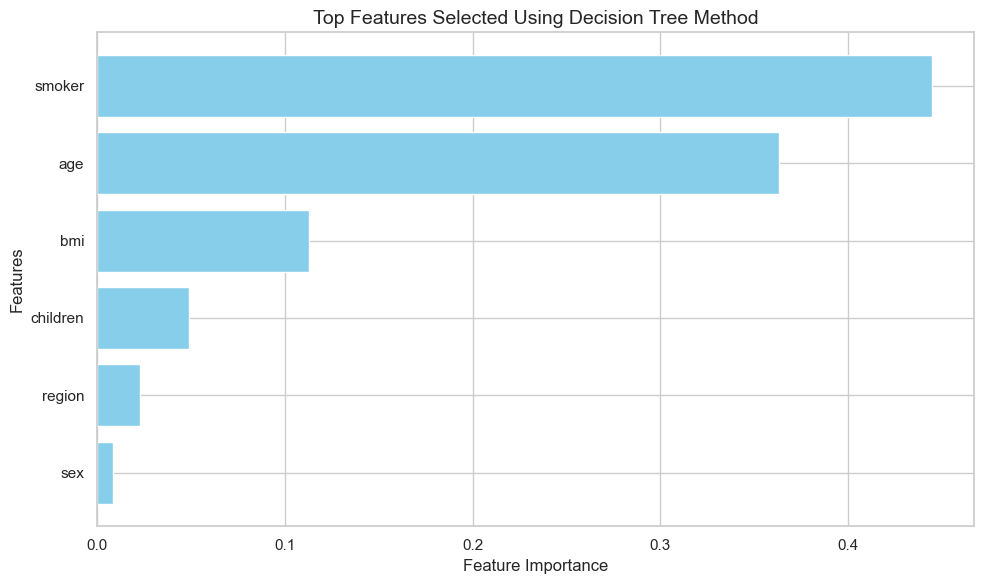

[0.44482927 0.36292525 0.11250026 0.048813   0.02246404 0.00846818]


In [52]:
# Inspired by (Liu, 2024)


X_corr = df_featReduc_corr.drop('log_charges', axis=1)  
y_corr = df_featReduc_corr['log_charges'] 


dt_model = DecisionTreeRegressor(random_state=seed)  # Decision tree model
dt_model.fit(X_corr, y_corr)



decision_tree_feature_importances = dt_model.feature_importances_  # built in feature importances
decision_tree_indices = np.argsort(decision_tree_feature_importances)[::-1]  # sort indices of feature by importance
top_dt_features = X_corr.columns[decision_tree_indices][:6]    # show all 6 features
top_dt_importances = decision_tree_feature_importances[decision_tree_indices][:6]


# Create a single bar chart for the top features
plt.figure(figsize=(10, 6))
plt.barh(top_dt_features[::-1], top_dt_importances[::-1], color='skyblue')
plt.title('Top Features Selected Using Decision Tree Method', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()

# Print feature importances
print(top_dt_importances)

#  The results show smoker as the most important in predicting the log_charges (~44.5% importance)
# Age is next most important (~36.3%)
# Then Bmi(~11.3%), children (~4.9%), region(~2.2%), then least important is sex (~0.8%)




**The cell above answers RSQ3:**

**What features are the most important/most strongly correlated with higher medical insurance costs?**

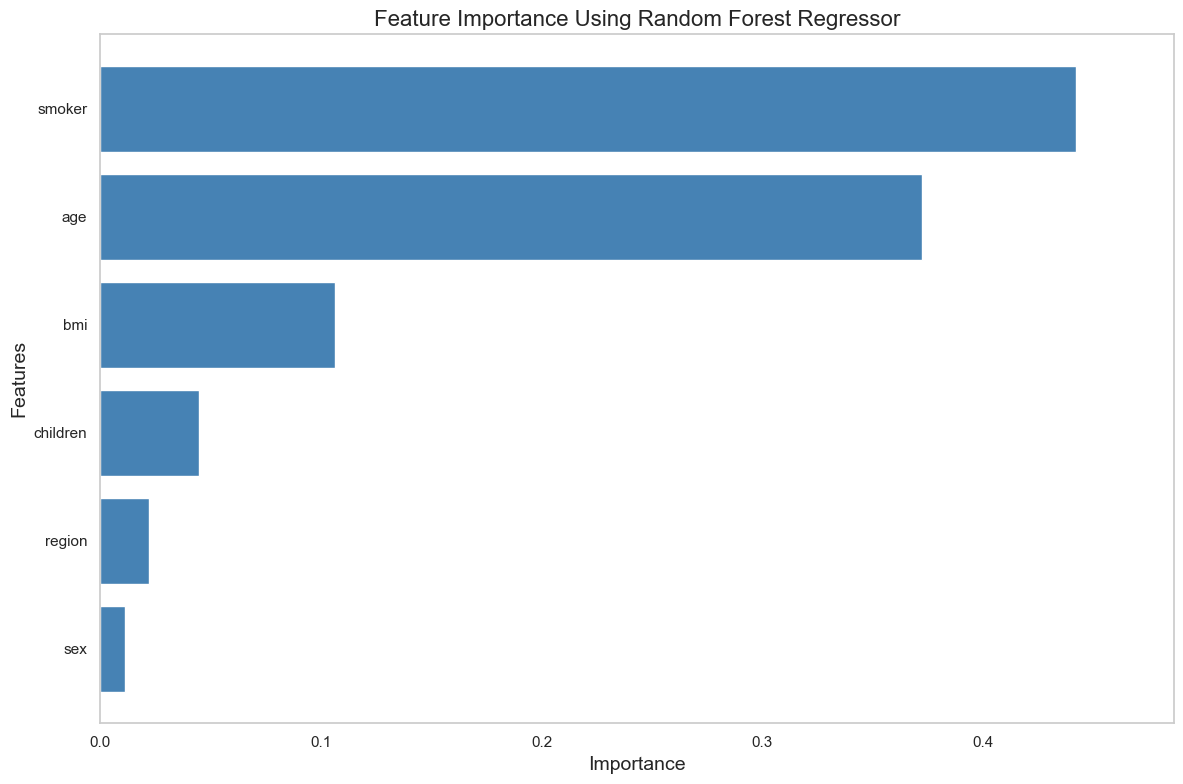

Top Features and their Importance:
    Feature  Importance
0    smoker    0.442523
1       age    0.372743
2       bmi    0.106485
3  children    0.044753
4    region    0.022268
5       sex    0.011228


In [53]:
# Will using random forrest regressor give same results?
# Result: Different precentages to the above cell, but the same order of feature importances
# Inspired by (Liu, 2024)

# Create RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=seed)  

# Fit the model 
rf_model.fit(X_corr, y_corr)


feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]  

# store results in a dataframe for convenience
feature_importance_df = pd.DataFrame({
    'Feature': X_corr.columns[indices],
    'Importance': feature_importances[indices]
})

# horizontal bar chart of feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.title('Feature Importance Using Random Forest Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xlim(0, max(feature_importance_df['Importance']) * 1.1)  # change x-axis limits for clear visualisation
plt.gca().invert_yaxis()  # Inverted y-axis - shows most important features on top
plt.grid(False)  # remove the grid
plt.tight_layout()
plt.show()

top_n = 6 # show all 6 features
print("Top Features and their Importance:")
print(feature_importance_df.head(top_n))


**How many more features to remove?**

Now we understand which features are most important. But should we remove any features? 


Best percentage of top features: 100.00%
Best MAE score: 0.2396


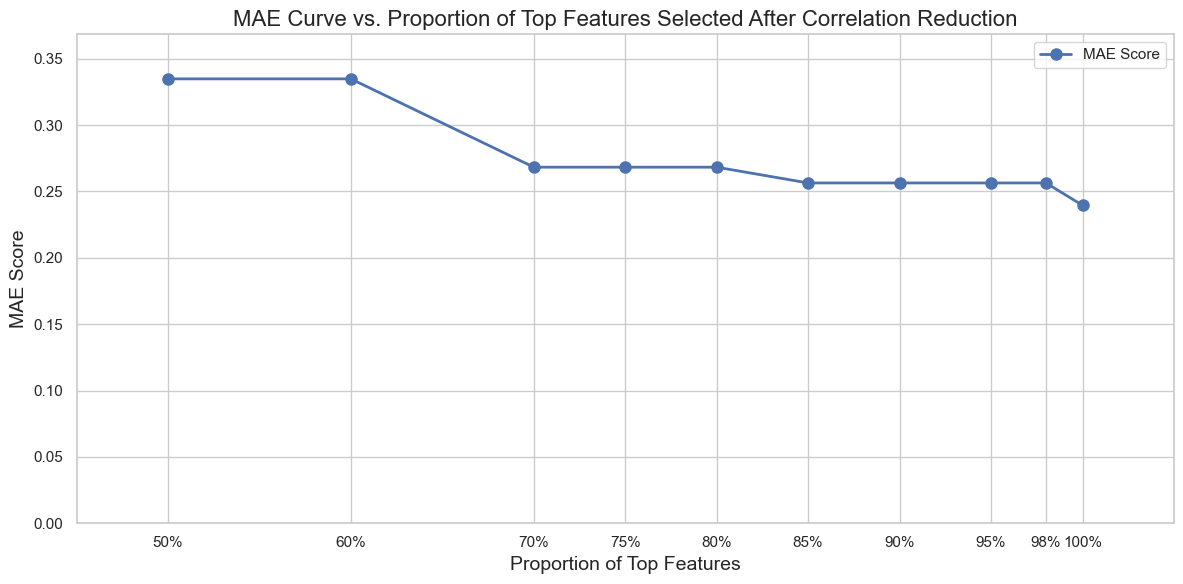

In [54]:
# Testing the scores of each percentage of the features using decision tree regressor and getting the MAE scores
# Inspired by (Liu, 2024)


dt_model = DecisionTreeRegressor(random_state=seed)
dt_model.fit(X_corr, y_corr)


feature_importances = dt_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # sort indices of feature importances

percentages = [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.98, 1.00]  # will test at each of these percentages o fthe top features
mae_scores = []  # Store MAE

# for each percentage, we test the mae using the model. and then store scores in the list 
for percent in percentages:
    n_features = int(len(feature_importances) * percent)  # Number of features to select usng the percentage values
    top_features_indices = indices[:n_features]  #  top features indices of the selected percentage of features


    X_top_features = X_corr.iloc[:, top_features_indices]    # take the top features

    y_pred = cross_val_predict(dt_model, X_top_features, y_corr, cv=kf) # using the top features selected make predictions

    # MAE
    mae = mean_absolute_error(y_corr, y_pred)
    mae_scores.append(mae)

# Find the best percentage with lowest MAE
best_mae = min(mae_scores)  
best_percentage = percentages[mae_scores.index(best_mae)]

# Print the best percentage and MAE
print(f'Best percentage of top features: {best_percentage * 100:.2f}%')
print(f'Best MAE score: {best_mae:.4f}')

# plot results
plt.figure(figsize=(12, 6))
plt.plot(percentages, mae_scores, marker='o', linestyle='-', color='b', markersize=8, linewidth=2, label='MAE Score')
plt.title('MAE Curve vs. Proportion of Top Features Selected After Correlation Reduction', fontsize=16)
plt.xlabel('Proportion of Top Features', fontsize=14)
plt.ylabel('MAE Score', fontsize=14)
plt.xticks(percentages, [f'{int(p*100)}%' for p in percentages])  # print percentages on x axis
plt.ylim(0, max(mae_scores) * 1.1)  # Set y-axis limits
plt.xlim(0.45, 1.05)  # Set  x-axis limits
plt.legend()
plt.tight_layout()
plt.show()


# So for MAE - 100% features is best. no need to remove features

Best percentage of top features: 100.00%
Best R² score: 0.6903


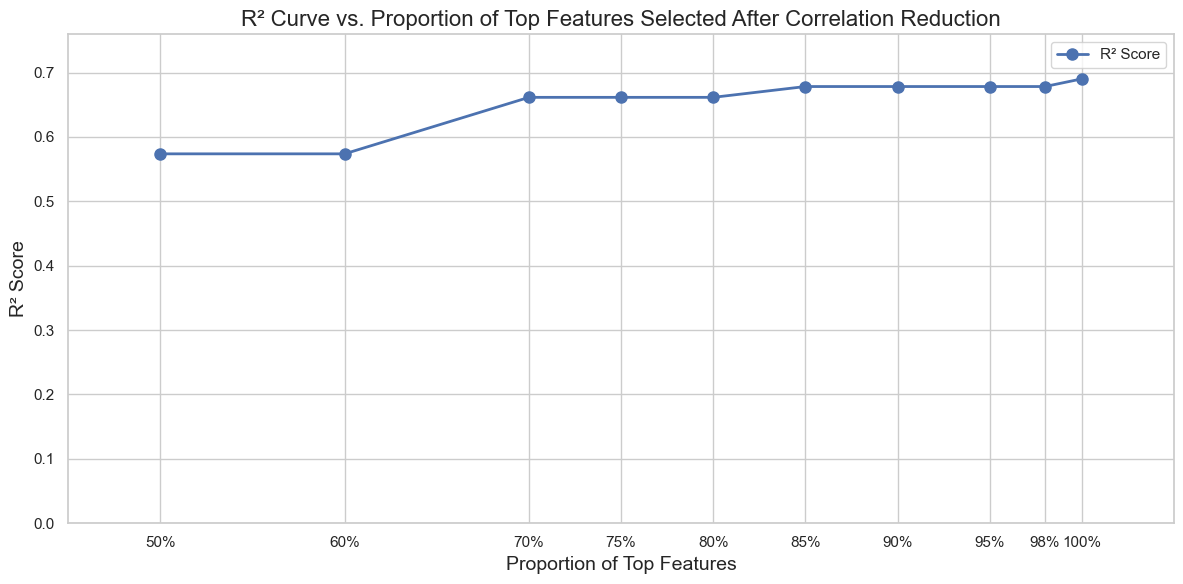

In [55]:
# Testing the scores of each percentage of the features using decision tree regressor and getting the R2 scores
# Inspired by (Liu, 2024)


dt_model = DecisionTreeRegressor(random_state=seed)
dt_model.fit(X_corr, y_corr)


feature_importances = dt_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]  


percentages = [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.98, 1.00]
r2_scores = []  



for percent in percentages:
    n_features = int(len(feature_importances) * percent)  
    top_features_indices = indices[:n_features] 

    X_top_features = X_corr.iloc[:, top_features_indices]  

    
    y_pred = cross_val_predict(dt_model, X_top_features, y_corr, cv=kf)

    # Now instead of MAE, we are using R2 scores
    r2 = r2_score(y_corr, y_pred)
    r2_scores.append(r2)

# Find the best percentage and R² score
best_r2 = max(r2_scores)  
best_percentage = percentages[r2_scores.index(best_r2)]

# Print the results
print(f'Best percentage of top features: {best_percentage * 100:.2f}%')
print(f'Best R² score: {best_r2:.4f}')


plt.figure(figsize=(12, 6))
plt.plot(percentages, r2_scores, marker='o', linestyle='-', color='b', markersize=8, linewidth=2, label='R² Score')
plt.title('R² Curve vs. Proportion of Top Features Selected After Correlation Reduction', fontsize=16)
plt.xlabel('Proportion of Top Features', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(percentages, [f'{int(p*100)}%' for p in percentages])  
plt.ylim(0, max(r2_scores) * 1.1)  
plt.xlim(0.45, 1.05) 
plt.legend()
plt.tight_layout()
plt.show()

# So for R2 - 100% features is best. no need to remove features

Best percentage of top features: 100.00%
Best MSE score: 0.2617


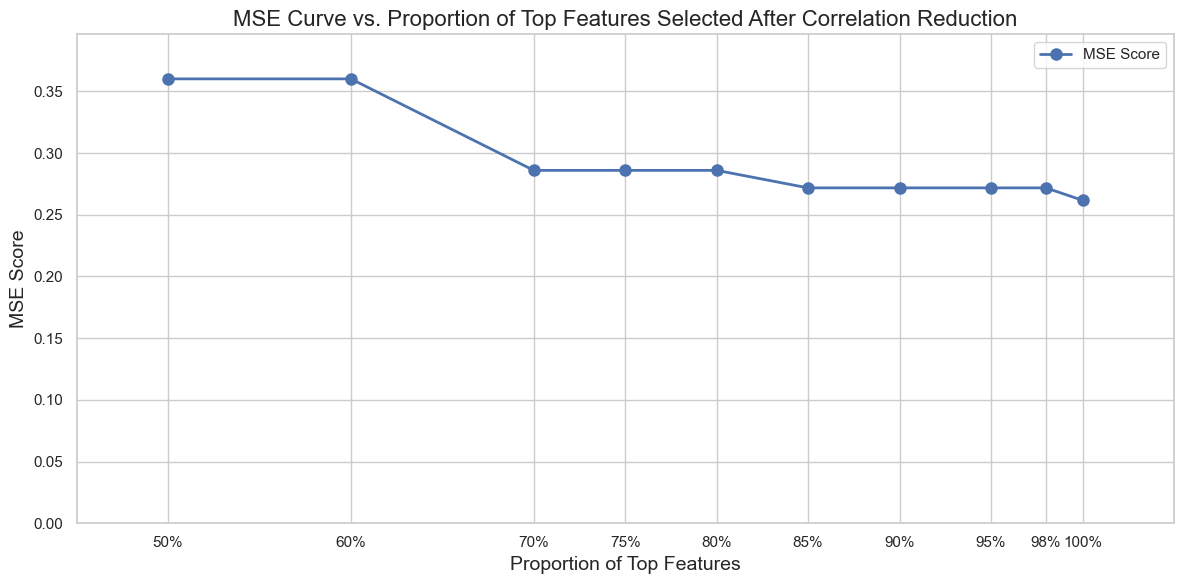

In [56]:
# Testing the scores of each percentage of the features using decision tree regressor and getting the MSE scores
# Inspired by (Liu, 2024)


dt_model = DecisionTreeRegressor(random_state=seed)
dt_model.fit(X_corr, y_corr)


feature_importances = dt_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]  


percentages = [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.98, 1.00]
mse_scores = []  



for percent in percentages:
    n_features = int(len(feature_importances) * percent)  
    top_features_indices = indices[:n_features] 


    X_top_features = X_corr.iloc[:, top_features_indices]  

 
    y_pred = cross_val_predict(dt_model, X_top_features, y_corr, cv=kf)

    # Now using MSE scores 
    mse = mean_squared_error(y_corr, y_pred)
    mse_scores.append(mse)


best_mse = min(mse_scores)    # Best MSE score is the lowest MSE score
best_percentage = percentages[mse_scores.index(best_mse)]


print(f'Best percentage of top features: {best_percentage * 100:.2f}%')
print(f'Best MSE score: {best_mse:.4f}')


plt.figure(figsize=(12, 6))
plt.plot(percentages, mse_scores, marker='o', linestyle='-', color='b', markersize=8, linewidth=2, label='MSE Score')
plt.title('MSE Curve vs. Proportion of Top Features Selected After Correlation Reduction', fontsize=16)
plt.xlabel('Proportion of Top Features', fontsize=14)
plt.ylabel('MSE Score', fontsize=14)
plt.xticks(percentages, [f'{int(p*100)}%' for p in percentages])  
plt.ylim(0, max(mse_scores) * 1.1)  
plt.xlim(0.45, 1.05)  
plt.legend()
plt.tight_layout()
plt.show()


# So for MSE - 100% features is best. no need to remove features

In [57]:
# Testing all the metrics in the same time for better clarity
# Inspired by (Liu, 2024)


percentages = [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.98, 1.00]
mae_scores = []
r2_scores = []
mse_scores = []


# Loop through the feature percentages and then calculate all 3 metrics (mse, mae, r2)
for percent in percentages:
    n_features = int(len(feature_importances) * percent)  
    top_features_indices = indices[:n_features]  

    X_top_features = X_corr.iloc[:, top_features_indices]  


    y_pred = cross_val_predict(dt_model, X_top_features, y_corr, cv=kf)

    # MAE
    mae = mean_absolute_error(y_corr, y_pred)
    mae_scores.append(mae)

    # R²
    r2 = r2_score(y_corr, y_pred)
    r2_scores.append(r2)

    #  MSE
    mse = mean_squared_error(y_corr, y_pred)
    mse_scores.append(mse)

# Output the results 
for percent, mae, r2, mse in zip(percentages, mae_scores, r2_scores, mse_scores):
    print(f"Percentage: {percent*100:.2f}%")
    print(f"MAE: {mae:.4f}, R²: {r2:.4f}, MSE: {mse:.4f}")
    print("-" * 40)

# Find the best model (lowest MSE, lowest MAE, highest r2)
best_mae_percent = percentages[mae_scores.index(min(mae_scores))]
best_r2_percent = percentages[r2_scores.index(max(r2_scores))]
best_mse_percent = percentages[mse_scores.index(min(mse_scores))]


print(f"Best MAE model: {best_mae_percent*100:.2f}%")
print(f"Best R² model: {best_r2_percent*100:.2f}%")
print(f"Best MSE model: {best_mse_percent*100:.2f}%")

# 100% features is best

Percentage: 50.00%
MAE: 0.3348, R²: 0.5738, MSE: 0.3601
----------------------------------------
Percentage: 60.00%
MAE: 0.3348, R²: 0.5738, MSE: 0.3601
----------------------------------------
Percentage: 70.00%
MAE: 0.2683, R²: 0.6616, MSE: 0.2859
----------------------------------------
Percentage: 75.00%
MAE: 0.2683, R²: 0.6616, MSE: 0.2859
----------------------------------------
Percentage: 80.00%
MAE: 0.2683, R²: 0.6616, MSE: 0.2859
----------------------------------------
Percentage: 85.00%
MAE: 0.2564, R²: 0.6784, MSE: 0.2717
----------------------------------------
Percentage: 90.00%
MAE: 0.2564, R²: 0.6784, MSE: 0.2717
----------------------------------------
Percentage: 95.00%
MAE: 0.2564, R²: 0.6784, MSE: 0.2717
----------------------------------------
Percentage: 98.00%
MAE: 0.2564, R²: 0.6784, MSE: 0.2717
----------------------------------------
Percentage: 100.00%
MAE: 0.2396, R²: 0.6903, MSE: 0.2617
----------------------------------------
Best MAE model: 100.00%
Best 

**Using other methods of feature engineering:**

I will also use PCA so I can check the results.

Explained variance ratio: [0.19974143 0.18156573 0.16982734 0.16102535 0.1539821  0.13385806]
Number of components: 6


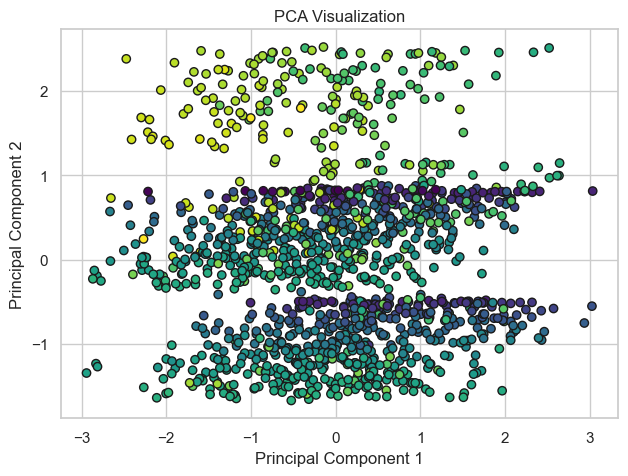

In [58]:
# PCA plots can help with dimension reduction
# using pca.explained_variance_ratio_ we can understand the effect of each feature in predicting charges



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # must scale features to use PCA



# Retain enough components to explain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)


# Scatter plot for the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

# PCA can help us with feature engineering. It can help reduce the dimension of the dataset
# A PCA diagram can show us high dimensional data in two or three dimensions
# Here the diagram shown is not that important, because our data is not high dimensional. One interesting thing about it however is that 
# the plot shows 3 different clusters/rows of data points. The points are grouped into clusters if they have similar features/characeristics (Aluja-Banet, 2024)
# But really the focus here is on the explained variance ratio and number of components shown below
# The feature explained variance shown below is high for all of them, and the number of components retained is 6 (i.e. all 6 features)
#  This shows all 6 features are important to explain the variance in the data
# This shows it is better to keep all features so we do not lose important predictors


Features used: 1
R² Score: 0.2721
MSE: 0.6150
----------------------------------------
Features used: 2
R² Score: 0.2724
MSE: 0.6148
----------------------------------------
Features used: 3
R² Score: 0.2787
MSE: 0.6095
----------------------------------------
Features used: 4
R² Score: 0.2982
MSE: 0.5929
----------------------------------------
Features used: 5
R² Score: 0.7593
MSE: 0.2034
----------------------------------------
Features used: 6
R² Score: 0.7625
MSE: 0.2007
----------------------------------------
Summary:
Best R² achieved with 6 features: 0.7625
Best MSE achieved with 6 features: 0.2007


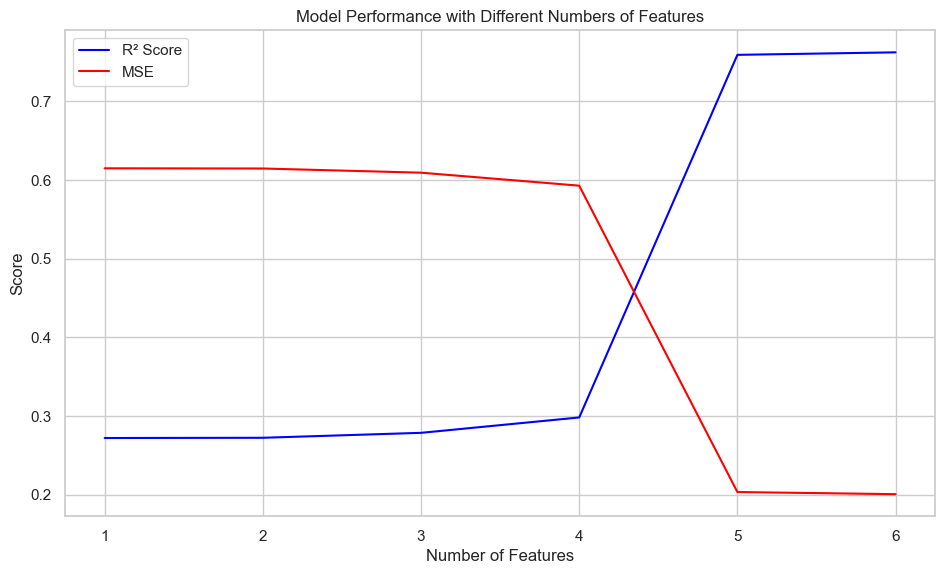

In [59]:
# So far I used a decison tree, random forrest, and PCA and all of them showed that keeping all features is best. But here I have one last check
# I will do linear regression for each number of features and then compares scores. 
# The decision trees and random forrests built in feature importances calculation are good for feature engineering, but they do NOT assume linearity. They are better for predictions involving non-linear data
# However, some of the relationships in this regression dataset are LINEAR
# So, maybe using linear regression will give different results



# lists to store score
r2_scores = []
mse_scores = []

# Incrementally train models with 1 to 6 features
for num_features in range(1, X.shape[1] + 1):

    X_subset = X.iloc[:, :num_features]  # Selecting columns based on the feature count
    
    # fitted Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_subset, y)
    

    y_pred = lin_reg.predict(X_subset)
    
    # Compute scores r2 and mse
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    r2_scores.append(r2)
    mse_scores.append(mse)
    
    print(f"Features used: {num_features}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print("-" * 40)

# Summarize results so they can be printed
best_r2_index = np.argmax(r2_scores)
best_mse_index = np.argmin(mse_scores)

print("Summary:")
print(f"Best R² achieved with {best_r2_index + 1} features: {r2_scores[best_r2_index]:.4f}")
print(f"Best MSE achieved with {best_mse_index + 1} features: {mse_scores[best_mse_index]:.4f}")

# Plotting the performance of models 
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), r2_scores, label="R² Score", color="blue")
plt.plot(range(1, X.shape[1] + 1), mse_scores, label="MSE", color="red")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Model Performance with Different Numbers of Features")
plt.legend()
plt.show()

# Again, the output shows that using all features is best. so all features will be used for the rest of this notebook.
# We already have very low number of features, all of which provide valuable informations, so rmeoving them will harm the model



**The work in feature engineering above answers RSQ10:**

**What features should be kept, and which should be removed?**

In [60]:
# Now that we have done feature engineering, normalisation, and imputation, I will make a new dataset


# Combine X and y into a new DataFrame
df_new = X.copy()  
df_new['log_charges'] = y  

print(df_new.head())


    age  sex     bmi  children  smoker  region  log_charges
0  19.0    0  27.900         0       1       3     9.734176
1  18.0    1  33.770         1       0       2     7.453302
2  28.0    1  33.000         3       0       2     8.400538
3  33.0    1  22.705         0       0       1     9.998092
4  32.0    1  28.880         0       0       1     8.260197


# 6. Splitting the data

In [61]:


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=ts, random_state=seed)

#use all features

# 7. Feature scaling

In [62]:
# Standardising the features, ususally best if the distribution is gaussian normal
# But having gaussian normal distribution is not MANDATORY (tumpanjawat, 2023)
# standardises the data, mean =0 and standard deviation =1
# I will compare this technique to minmax later on
# Standardisation means scaling values so they have a mean of 0 and standard deviation of 1. Typically applied to a model with features that follow a gaussian normal distribution.  
# Normalising (minmax) means scaling values between 0 and 1.



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# According to (suzanne, 2023), all the pre processing steps have now been completed.

# 8. Model selection

I picked these models to test:

1) Linear regression
2) Polynomial regression
3) Random Forrest Regressor
4) Gradient Boosting
5) XGB (extreme gradient boosting)
6) Decision trees
7) Multi layer perceptron (MLP)

# 9. and 10. Training the models and tuning hyperparameters

## Model 1: Multiple linear regression

This is the simplest model here, models relationship between one dependent variable and multiple independent variables.

Justification: This model was tested because it shows us if the relationships between the features and target are linear or non linear, or a mix of both depending on the MSE scores, R2 scores, etc

In [63]:
# FIRST TESTING WITHOUT NORMALISATION. 


# Start timer. will measure the execution time so i can compare the speed of each algorithm
start_timeLR = time.time()

Lin_regression = LinearRegression().fit(X_train,Y_train)  # fit into linear regression model
# End timer
end_timeLR = time.time()

# Calculate the time taken for training (in seconds)
training_timeLR = end_timeLR - start_timeLR
print(f"Training Time: {training_timeLR:.2f} seconds")


y_train_pred = Lin_regression.predict(X_train)
y_test_pred = Lin_regression.predict(X_test)  # make predictions on the training as well as testing set


r2_trainLR = Lin_regression.score(X_train, Y_train)  # R² for training set
r2_testLR = Lin_regression.score(X_test, Y_test)      # R² for test set

 
mse_trainLR = mean_squared_error(Y_train, y_train_pred)  # MSE
mse_testLR = mean_squared_error(Y_test, y_test_pred)


print(f'R-squared for Training Set: {r2_trainLR}')
print(f'R-squared for Test Set: {r2_testLR}')
print(f'MSE for Training Set: {mse_trainLR}')
print(f'MSE for Test Set: {mse_testLR}')

# very fast execution
# The results indicate better performance on the unseen test data than on the training data (lower MSE and higher R^2 score) which is good - means no overfitting

Training Time: 0.02 seconds
R-squared for Training Set: 0.7511571536803983
R-squared for Test Set: 0.8014958102590641
MSE for Training Set: 0.20659896227902153
MSE for Test Set: 0.1784831889019615


In [64]:
# The cross validated model that gives the best results for average MSE and R^ scores is when using 3 folds
# i use cross validation as it shows how well the model generalises to unseen data


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression


model = LinearRegression()


mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -mse_scores

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

for fold, score in enumerate(mse_scores, start=1):
    print(f"Fold {fold}: MSE = {score}")

for fold, score in enumerate(r2_scores, start=1):
    print(f"Fold {fold}: R² Score = {score}")

print(f"\nMean MSE: {mse_scores.mean()}")
print(f"Standard Deviation of MSE: {mse_scores.std()}")

print(f"\nMean R² Score: {r2_scores.mean()}")
print(f"Standard Deviation of R² Scores: {r2_scores.std()}")


# The MSE values show that the model performs consistently across folds, with slight variations only ( low standard deviation score). 
# the standard deviation shows spread/variability
# The R² scores suggest the model explains around 70-80% of the variance of the target variable, with a small variation.
# This consistent performance and quite good scores is a good sign - means the model fits the data reasonably well and that the model is not overfitting as the scores are consistent across different folds

Fold 1: MSE = 0.17848318890196144
Fold 2: MSE = 0.21926126728978984
Fold 3: MSE = 0.17209283709134712
Fold 4: MSE = 0.2326132230235266
Fold 5: MSE = 0.20904400001751727
Fold 1: R² Score = 0.8014958102590641
Fold 2: R² Score = 0.7326414245966373
Fold 3: R² Score = 0.7942054141850374
Fold 4: R² Score = 0.6986471747737564
Fold 5: R² Score = 0.7645034033340058

Mean MSE: 0.20229890326482844
Standard Deviation of MSE: 0.023374219945236408

Mean R² Score: 0.7582986454297002
Standard Deviation of R² Scores: 0.03849774290705632


**Comparing linear regression score with and without scaling using statistical tests**

These allow us to test hypotheses and understand models better, while comapring the difference between how different models perform. They can be used for model comparison and evaluation. Here I will use a paired t-test, a parametric test, that allows us to compare the MSE of the two models, and tell us if the difference is statustically significant or not. Inspired by (‘Machine Learning Evaluation Mastery: How to Use Statistical Tests for Model Comparison and Evaluation’, 2024).


In [65]:
# MSE scores for the unscaled model
mse_scores_unscaled= cross_val_score(LinearRegression(), X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_unscaled = -mse_scores_unscaled  # Convert to positive MSE because it is negative originally

# Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the entire dataset

# MSE scores for the scaled model
mse_scores_scaled= cross_val_score(LinearRegression(), X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_scaled = -mse_scores_scaled  # Convert to positive MSE because it is negative originally

# Print actual MSE scores
print("MSE Scores (Unscaled Model):", mse_scores_unscaled)
print("MSE Scores (Scaled Model):", mse_scores_scaled)

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(mse_scores_unscaled, mse_scores_scaled)

# Output the results of the t-test
print("--- Paired T-Test Results ---")
print(f"T-statistic for MSE: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in MSE is statistically significant.")
else:
    print("The difference in MSE is not statistically significant.")

MSE Scores (Unscaled Model): [0.17848319 0.21926127 0.17209284 0.23261322 0.209044  ]
MSE Scores (Scaled Model): [0.17848319 0.21926127 0.17209284 0.23261322 0.209044  ]
--- Paired T-Test Results ---
T-statistic for MSE: 0.8846517369293826, P-value: 0.4263172079403687
The difference in MSE is not statistically significant.


**Results**

Inspired by (‘Machine Learning Evaluation Mastery: How to Use Statistical Tests for Model Comparison and Evaluation’, 2024)



For this test:

1) Null and alternative hypotheses of the test.
* Null Hypothesis (H0): There is no significant difference in the Mean Squared Error (MSE) between the scaled and unscaled models. 
* Alternative Hypothesis (H1): There is a significant difference in the Mean Squared Error (MSE) between the scaled and unscaled models.

2) State the significance level and the test statistic of the test.
*Significance Level (α) is: 0.05 (5%) unless otherwise specified. This means I am willing to accept a 5% window of incorrectly rejecting the null hypothesis.
*The test statistic calculated from the t-test is: t =  -1.036642110697632

3) State the p-value and the decision rule of the test.
* p-value: 0.3584563446229644
* Decision rule: If the p-value is less than the significance level (α), I will reject the null hypothesis. In this case it is not less than 0.05, so
I will not reject the null hypothesis. There is no significant difference in the Mean Squared Error (MSE) between the scaled and unscaled models. 
4) State the conclusion and the interpretation of the test.
* Conclusion: There isn't sufficient evidence that suggests that there is a significant difference in the MSE between the scaled and unscaled linear regression models.
* Interpretation: scaling the features did not lead to any significant improvement in model performance, as shown by the p-value. This may be because the data was already NOT skewed as investigated before, therefore, standardisation has minimal effect

In [66]:
# compare minmax to standard scaler, i.e. normalisation vs standardisation

from sklearn.preprocessing import MinMaxScaler


# Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the entire dataset

# MSE scores for the standardisatio scaled model
mse_scores_scaled= cross_val_score(LinearRegression(), X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_scaled = -mse_scores_scaled  # Convert to positive MSE because it is negative originally

# Scale the entire dataset now with minmax
scalerminmax = MinMaxScaler()
X_scaled2 = scalerminmax.fit_transform(X)  # Fit and transform the entire dataset

# MSE scores for the scaled model
mse_scores_scaled2= cross_val_score(LinearRegression(), X_scaled2, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_scaled2 = -mse_scores_scaled2
 # Convert to positive MSE because it is negative originally

# Print actual MSE scores
print("MSE Scores (standardised Model):", mse_scores_scaled)
print("MSE Scores (normalised Model):", mse_scores_scaled2)

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(mse_scores_scaled, mse_scores_scaled2)

# Output the results of the t-test
print("--- Paired T-Test Results ---")
print(f"T-statistic for MSE: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in MSE is statistically significant.")
else:
    print("The difference in MSE is not statistically significant.")

MSE Scores (standardised Model): [0.17848319 0.21926127 0.17209284 0.23261322 0.209044  ]
MSE Scores (normalised Model): [0.17848319 0.21926127 0.17209284 0.23261322 0.209044  ]
--- Paired T-Test Results ---
T-statistic for MSE: 0.49236596391733095, P-value: 0.648261294967307
The difference in MSE is not statistically significant.


**Results**

Inspired by (‘Machine Learning Evaluation Mastery: How to Use Statistical Tests for Model Comparison and Evaluation’, 2024)



For this test:

1) Null and alternative hypotheses of the test.
* Null Hypothesis (H0): There is no significant difference in the Mean Squared Error (MSE) between the standardised and normalised models. 
* Alternative Hypothesis (H1): There is a significant difference in the Mean Squared Error (MSE) between the standardised and normalised models.

2) State the significance level and the test statistic of the test.
*Significance Level (α) is: 0.05 (5%) unless otherwise specified. This means I am willing to accept a 5% window of incorrectly rejecting the null hypothesis.
*The test statistic calculated from the t-test is: t = 1.5811388300841895

3) State the p-value and the decision rule of the test.
* p-value: 0.18900365845517536
* Decision rule: If the p-value is less than the significance level (α), I will reject the null hypothesis. In this case it is not less than 0.05, so
I will not reject the null hypothesis. There is no significant difference in the Mean Squared Error (MSE) between the standardised and normalised models. 
4) State the conclusion and the interpretation of the test.
* Conclusion: There isn't sufficient evidence that suggests that there is a significant difference in the MSE between the standardised and normalised models.
* Interpretation: normalisng or standardising the features did not lead to any significant improvement in model performance when compared to each other, as shown by the p-value. 

**Now comparing the unregularised linear regression model, linear regression model with l1 regularisation, and linear regression model with l2 regularisation**

In [67]:


def fit_model(model, x, y):
    mse_scores = []
    coefficients = []
    for train_index, test_index in kf.split(X):  # here basically doing manual k cross validation. This is because using the cross_val_score() function will not give us the coefficents
        # For my model I want to be able to see the coefficients, so I will do manual cross validation and then get the coeffeicients using model.coef_
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split data into train and test splits
        Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        model.fit(X_train, Y_train)
        
        # Predict and calculate MSE
        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(Y_test, y_pred))
        
        # Store the coefficients
        coefficients.append(model.coef_)
    
    return np.array(mse_scores), np.array(coefficients)

# Fit models
mse_scores_lr, coefficients_lr = fit_model(LinearRegression(), X, y)
mse_scores_lasso, coefficients_lasso = fit_model(Lasso(alpha=0.05), X, y)
mse_scores_ridge, coefficients_ridge = fit_model(Ridge(alpha=0.05), X, y)

# Print  MSE scores
print("MSE Scores (Linear Regression):", mse_scores_lr)
print("MSE Scores (Lasso):", mse_scores_lasso)
print("MSE Scores (Ridge):", mse_scores_ridge)

#Perform paired t-test
t_stat_lr_lasso, p_value_lr_lasso = stats.ttest_rel(mse_scores_lr, mse_scores_lasso)
t_stat_lr_ridge, p_value_lr_ridge = stats.ttest_rel(mse_scores_lr, mse_scores_ridge)
t_stat_lasso_ridge, p_value_lasso_ridge = stats.ttest_rel(mse_scores_lasso, mse_scores_ridge)

print()
# Output the results of the t-test
print("--- Paired T-Test Results ---")
print(f"T-statistic for LR vs Lasso MSE: {t_stat_lr_lasso}, P-value: {p_value_lr_lasso}")
print(f"T-statistic for LR vs Ridge MSE: {t_stat_lr_ridge}, P-value: {p_value_lr_ridge}")
print(f"T-statistic for Lasso vs Ridge MSE: {t_stat_lasso_ridge}, P-value: {p_value_lasso_ridge}")

print()
# Interpret the results
def interpret_p_value(p_value, model1, model2):
    if p_value < 0.05:
        print(f"The difference in MSE between {model1} and {model2} is statistically significant.")
    else:
        print(f"The difference in MSE between {model1} and {model2} is not statistically significant.")

interpret_p_value(p_value_lr_lasso, "Linear Regression", "Lasso")
interpret_p_value(p_value_lr_ridge, "Linear Regression", "Ridge")
interpret_p_value(p_value_lasso_ridge, "Lasso", "Ridge")

# Display average coefficients
average_coefficients_lasso = np.mean(coefficients_lasso, axis=0)
average_coefficients_ridge = np.mean(coefficients_ridge, axis=0)
average_coefficients_lr = np.mean(coefficients_lr, axis=0)

print("\nAverage Coefficients (Lasso):", average_coefficients_lasso)
print("Average Coefficients (Ridge):", average_coefficients_ridge)
print("Average Coefficients (Linear Regression):", average_coefficients_lr)




MSE Scores (Linear Regression): [0.17848319 0.21926127 0.17209284 0.23261322 0.209044  ]
MSE Scores (Lasso): [0.20449647 0.24764832 0.18476403 0.24733501 0.2300044 ]
MSE Scores (Ridge): [0.17848467 0.21926964 0.17208983 0.23260732 0.20904345]

--- Paired T-Test Results ---
T-statistic for LR vs Lasso MSE: -6.712221804767229, P-value: 0.00256453121968024
T-statistic for LR vs Ridge MSE: -0.03255591278994415, P-value: 0.97558845540851
T-statistic for Lasso vs Ridge MSE: 6.716908426320592, P-value: 0.0025578678969312477

The difference in MSE between Linear Regression and Lasso is statistically significant.
The difference in MSE between Linear Regression and Ridge is not statistically significant.
The difference in MSE between Lasso and Ridge is statistically significant.

Average Coefficients (Lasso): [ 0.03431064  0.          0.01030847  0.06908372  1.23789681 -0.00413934]
Average Coefficients (Ridge): [ 0.03451492 -0.07495251  0.0129702   0.10363474  1.55077093 -0.04770948]
Average Coe

**Results**

L1 (lasso) regularisation lads to 'sparse' solutions, meaning some coefficents become 0, as shown in the coefficients above. It penalises more than l2, as can be seen l2 coefficients are generally higher than the ones for l1. 

Null Hypotheses (H0): 
* There is no significant difference in the the Mean Squared Error (MSE) between the  unregularised linear regression model and the lasso regularised model.
* There is no significant difference in the Mean Squared Error (MSE) between the unregularised linear regression model and the ridge regularised model.
* There is no significant difference in the Mean Squared Error (MSE) between the lasso regularised linear regression model and the ridge regularised model.
  
Conclusion:
* There is sufficient evidence that suggests that there is a significant difference in the MSE between the unregularised linear regression model and the lasso regularised model. p_value<0.05. The difference is that the model performs worse with lasso regularisation, evidenced by the higher MSE scores. Reject the null hypothesis.
* There isn't sufficient evidence that suggests that there is a significant difference in the MSE between the  unregularised linear regression model and the ridge regularised model. p_value>0.05. No reason to reject the null hupothesis.
* There is sufficient evidence that suggests that there is a significant difference in the MSE between the lasso regularised linear regression model and the ridge regularised model. p_value<0.05. The difference is that the model performs worse with lasso regularisation, evidenced by the higher MSE scores. Reject the null hypothesis.

Therefore, for the linear regression, I will just use the unregularised model, as regularising either does not significantly change the MSE or it makes the MSE worse. 

**Testing and visualising the linear relationship between age and charges**

Age is the continuous variable with highest feature importance as we found out before, during our feature engineering. It could be interesting to observe the relationship with the target variable.


In [68]:
# Lets try simple linear regression
# This cell is just out of interest. I want to see if we can predict the target variable using only the age feature
# Testing the performance of the model only on the age feature
# The scores are much worse than the previous cell where we used all the features
# There are reasons for this:
# When we use multiple features, the model can capture more complex relationships in the data, meaning better predictions
# Also, the relationship between age and log_charges may not be strong enough to account for all the variability in the target variable. Other features may contribute significantly to the model performance as well
#Also, the relationship between age and log_charges may not be PURELY linear, so if the model assumes linear relationship, which leads to a worse model
# Again, this cell is not very important, but I thought it is interesting to keep

x_test_new = X_test['age']  # select age column only
x_train_new = X_train['age']  

x_test_new =np.array(x_test_new).reshape(-1,1)  
x_train_new =np.array(x_train_new).reshape(-1,1)

Lin_regression_new = LinearRegression().fit(x_train_new,Y_train)  # fit into linear regression model

y_train_pred_new = Lin_regression_new.predict(x_train_new)
y_test_pred_new = Lin_regression_new.predict(x_test_new)  # make predictions on the training as well as testing set


r2_train_new = Lin_regression_new.score(x_train_new,Y_train)  # R² for training set
r2_test_new = Lin_regression_new.score(x_test_new, Y_test)      # R² for test set


mse_trainLR_new = mean_squared_error(Y_train, y_train_pred_new)  #MSE
mse_testLR_new = mean_squared_error(Y_test, y_test_pred_new)


print(f'R-squared for Training Set: {r2_train_new}')
print(f'R-squared for Test Set: {r2_test_new}')
print(f'MSE for Training Set: {mse_trainLR_new}')
print(f'MSE for Test Set: {mse_testLR_new}')







R-squared for Training Set: 0.2536047457548508
R-squared for Test Set: 0.3336959939932135
MSE for Training Set: 0.6196862287091085
MSE for Test Set: 0.5991010261569217


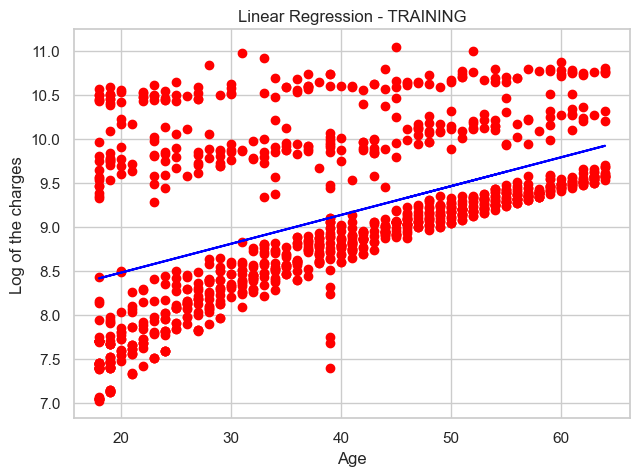

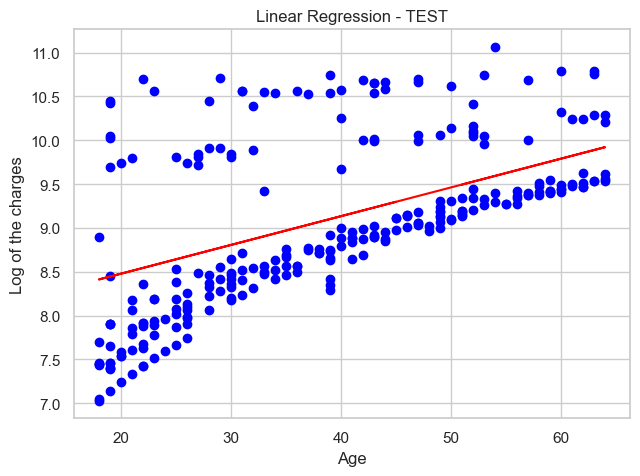

In [69]:
# Plotting the age vs log_charges for training and test sets
# The line fits the data decently but not perfectly. There is definitely a better model elsewhere

#Plotting the data points as well as the linear regression line
plt.scatter(x_train_new,Y_train, color='red')

plt.plot(x_train_new, y_train_pred_new ,color='blue')

plt.title('Linear Regression - TRAINING')
plt.xlabel('Age')
plt.ylabel('Log of the charges')
plt.show()


#Plotting the data points as well as the linear regression line
plt.scatter(x_test_new,Y_test, color='blue')

plt.plot(x_test_new, y_test_pred_new ,color='red')

plt.title('Linear Regression - TEST')
plt.xlabel('Age')
plt.ylabel('Log of the charges')
plt.show()

## Model 2 -Polynomial regression

This extends our linear regression model. It models relationship as a polynomial curve with a certain degree and can capture non linea realtionships.

Justification: This model was tested because it can capture non linear relationships and improve predictions through using polynomial terms.

In [70]:
# Inspired by (hely333, 2018)

# polynomial features
quad = PolynomialFeatures(degree=2) # use degree 2 for now
x_quad_train = quad.fit_transform(X_train)
x_quad_test = quad.transform(X_test)         # Transform test features


# Start timer
start_timePR = time.time()
#fit the model
poly_regression = LinearRegression().fit(x_quad_train, Y_train)
# End timer
end_timePR = time.time()

# Calculate the time taken for training (in seconds)
training_timePR = end_timePR - start_timePR
print(f"Training Time: {training_timePR:.2f} seconds")

    
# Now, make predictions
Y_train_pred = poly_regression.predict(x_quad_train)
Y_test_pred = poly_regression.predict(x_quad_test)

#  R2
r2_trainPR = poly_regression.score(x_quad_train, Y_train)  # R² for training set
r2_testPR = poly_regression.score(x_quad_test, Y_test)     # R² for test set



mse_testPR = mean_squared_error(Y_test, Y_test_pred)  #MSE
mse_trainPR = mean_squared_error(Y_train, Y_train_pred)

# results
print("R-squared for Training Set:", r2_trainPR)
print("R-squared for Test Set:", r2_testPR)
print("MSE for Training Set:", mse_trainPR)
print("MSE for Test Set:", mse_testPR)


# very quick execution time
# The polynomial regression performs better (higher R^2 and lower MSE) than linear regression. Therefore, polynomial regression is more suitable for this dataset
# means the relationship in the data may be better fitted with a non linear model than a linear model. some non linear relationships
# The MSE for test set is lower than training, and the R score for test is higher than training, which is good, meaning the model performs well on new unseen data


Training Time: 0.00 seconds
R-squared for Training Set: 0.823756793403864
R-squared for Test Set: 0.860291845983394
MSE for Training Set: 0.1463239314692757
MSE for Test Set: 0.12561728232050495


**The cell above answers RSQ1 - which is better, linear or polynomial regression?**

**Is a linear regression model better than a polynomial regression model to predict the medical insurance costs?**

**Does scaling significantly impact polynomial regression?**

In [71]:



# Polynomial features = degree 2
poly = PolynomialFeatures(degree=2)

# MSE scores unscaled
mse_scores_unscaled = []

# MSE scores scaled model
mse_scores_scaled = []

# Initialize model
model = LinearRegression()

# Cross-validation for unscaled model. doing cross validation manually and not using the cross_val_score function because I wanted full control over the training process
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split the data manually 
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply polynomial transformation (degree 2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit the model on the polynomial features
    model.fit(X_train_poly, Y_train)
    
    # calculate MSE
    y_pred = model.predict(X_test_poly)
    mse_scores_unscaled.append(mean_squared_error(Y_test, y_pred))

# Convert to numpy array
mse_scores_unscaled = np.array(mse_scores_unscaled)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Cross-validation for scaled model
for train_index, test_index in kf.split(X_scaled):
    X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply polynomial transformation (degree 2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Fit the model on the polynomial features
    model.fit(X_train_poly, Y_train)
    
    # calculate MSE
    y_pred = model.predict(X_test_poly)
    mse_scores_scaled.append(mean_squared_error(Y_test, y_pred))

# Convert to numpy array
mse_scores_scaled = np.array(mse_scores_scaled)

# Print actual MSE scores
print("MSE Scores (Unscaled Model):", mse_scores_unscaled)
print("MSE Scores (Scaled Model):", mse_scores_scaled)

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(mse_scores_unscaled, mse_scores_scaled)

# Output the results of the t-test
print("--- Paired T-Test Results ---")
print(f"T-statistic for MSE: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in MSE is statistically significant.")
else:
    print("The difference in MSE is not statistically significant.")


print('Unscaled: ', np.mean(mse_scores_unscaled))
print('Scaled: ', np.mean(mse_scores_scaled))

MSE Scores (Unscaled Model): [0.12558758 0.15853156 0.1191555  0.16524002 0.16046559]
MSE Scores (Scaled Model): [0.12219273 0.15384707 0.11917237 0.16277178 0.15505578]
--- Paired T-Test Results ---
T-statistic for MSE: 3.359820102949971, P-value: 0.02830956794966187
The difference in MSE is statistically significant.
Unscaled:  0.14579605308819193
Scaled:  0.14260794485191633


**Results**

Inspired by (‘Machine Learning Evaluation Mastery: How to Use Statistical Tests for Model Comparison and Evaluation’, 2024)



For this test:

1) Null and alternative hypotheses of the test.
* Null Hypothesis (H0): There is no significant difference in the Mean Squared Error (MSE) between the scaled and unscaled models. 
* Alternative Hypothesis (H1): There is a significant difference in the Mean Squared Error (MSE) between the scaled and unscaled models.

2) State the significance level and the test statistic of the test.
*Significance Level (α) is: 0.05 (5%) unless otherwise specified. This means I am willing to accept a 5% window of incorrectly rejecting the null hypothesis.
*The test statistic calculated from the t-test is: t = 3.359820102949971

3) State the p-value and the decision rule of the test.
* p-value: 0.02830956794966187
* Decision rule: If the p-value is less than the significance level (α), I will reject the null hypothesis. In this case it is less than 0.05, so
I will reject the null hypothesis. There is a significant difference in the Mean Squared Error (MSE) between the scaled and unscaled models. 
4) State the conclusion and the interpretation of the test.
* Conclusion: There is sufficient evidence that suggests that there is a significant difference in the MSE between the scaled and unscaled polynomial regression models.
* Interpretation: scaling the features lead to a significant improvement in model performance, as shown by the p-value and the average MSE scores of the two models. Therefore, I will use scaling for the rest of this notebook.

In [73]:
# Now lets compare minmax vs standardscaler to see if I can optimise model even further with minmax


poly = PolynomialFeatures(degree=2)
model = LinearRegression()

# MSE scores
mse_scores_standardized = []
mse_scores_normalized = []

# standardized model
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

for train_index, test_index in kf.split(X_standardized):
    X_train_standardized, X_test_standardized = X_standardized[train_index], X_standardized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply polynomial transformation
    X_train_poly = poly.fit_transform(X_train_standardized)
    X_test_poly = poly.transform(X_test_standardized)
    
    # Train and evaluate model
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse_scores_standardized.append(mean_squared_error(y_test, y_pred))

# normalized model
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

for train_index, test_index in kf.split(X_normalized):
    X_train_normalized, X_test_normalized = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply polynomial transformation
    X_train_poly = poly.fit_transform(X_train_normalized)
    X_test_poly = poly.transform(X_test_normalized)
    
    # Train and evaluate model
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse_scores_normalized.append(mean_squared_error(y_test, y_pred))

# Convert to NumPy arrays
mse_scores_standardized = np.array(mse_scores_standardized)
mse_scores_normalized = np.array(mse_scores_normalized)

# Print MSE scores
print("MSE Scores (StandardScaler):", mse_scores_standardized)
print("MSE Scores (MinMaxScaler):", mse_scores_normalized)

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(mse_scores_standardized, mse_scores_normalized)

print("--- Paired T-Test Results ---")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")

if p_value < 0.05:
    print("The difference in MSE is statistically significant.")
else:
    print("The difference in MSE is not statistically significant.")

# Mean and standard deviation
print("StandardScaler: Mean =", np.mean(mse_scores_standardized), "±", np.std(mse_scores_standardized))
print("MinMaxScaler: Mean =", np.mean(mse_scores_normalized), "±", np.std(mse_scores_normalized))


# Standard scaler slightly better (not significantly), so I will keep using standardisation. We fail to reject the null hypotheisis. p-value = 6.9978e-01

MSE Scores (StandardScaler): [0.12219273 0.15384707 0.11917237 0.16277178 0.15505578]
MSE Scores (MinMaxScaler): [0.12221768 0.15387208 0.1191555  0.16248657 0.15605664]
--- Paired T-Test Results ---
T-statistic: -0.6791, P-value: 5.3433e-01
The difference in MSE is not statistically significant.
StandardScaler: Mean = 0.14260794485191633 ± 0.018187106787187702
MinMaxScaler: Mean = 0.14275769336976843 ± 0.018267868646766085


**Plotting the polynomial algorithm outputs**

In [74]:
# Again, here I focused on age feature only, and comaparing it to log charges, rather than ALL features vs log_charges
# Again, this shows worse performance than polynomial regression using all features - lower R^2 and higher MSE because age feature alone is not enough to make predicitions
# Compared to the similar linear rregression experiment, polynomial has SLIGHTLY better scores across the board when using only age feature

 # Select the 'age' feature by its index. ofcourse since we said that scaling is better for polynomial regression, here i am using the scaled data
x_train_new2 = X_train_scaled[:, 0]  # Index 0 corresponds to age
x_test_new2 = X_test_scaled[:, 0]

 # Reshape to 2D
x_train_new2 = x_train_new2.reshape(-1, 1)  
x_test_new2 = x_test_new2.reshape(-1, 1)    

# Polynomial features
quad3 = PolynomialFeatures(degree=2)
x_quad_train3 = quad3.fit_transform(x_train_new2)  # Transform the single feature into polynomial features
x_quad_test3 = quad3.transform(x_test_new2)  # Transform the single feature into polynomial features

# Fitting the model
poly_regression_new = LinearRegression().fit(x_quad_train3 , Y_train)

# make predictions
Y_train_pred_new = poly_regression_new.predict(x_quad_train3)
Y_test_pred_new = poly_regression_new.predict(x_quad_test3 )

# R2
r2_trainPR_new = poly_regression_new.score(x_quad_train3, Y_train)  # R² for training set
r2_testPR_new = poly_regression_new.score(x_quad_test3, Y_test)     # R² for test set

mse_testPR_new = mean_squared_error(Y_test, Y_test_pred_new)  # Mean Squared Error
mse_trainPR_new = mean_squared_error(Y_train, Y_train_pred_new)

# Results
print("R-squared for Training Set:", r2_trainPR_new)
print("R-squared for Test Set:", r2_testPR_new)
print("MSE for Training Set:", mse_trainPR_new)
print("MSE for Test Set:", mse_testPR_new)



R-squared for Training Set: 0.26882366674098246
R-squared for Test Set: 0.30942445518803074
MSE for Training Set: 0.6096581372435118
MSE for Test Set: 0.6130053522876071


In [75]:
print(x_quad_train3.shape)
print(Y_train.shape)

#X_train_new now has 3 columns, the first being a column of 1's (bias), the 2nd being the age feature, the third being the age feature values squared (polynomial)
# To plot the graph, we need only the 2nd column as is done in the cell below

(1071, 3)
(1071,)


In [76]:
# Note: Something very important. The features have been scaled. this means some of the values will be negative
# this is not a problem as (data, 2019) said
# the only issue is that it is more difficult to interpret the visualisations. This will be considered in the model evaluation phase
# because models that need scaling are more difficult to understand/less explainable (XAI) than models that do not need scaling
# perhaps the solution could be to rescale the features in the end of the project so they can be undrstood


min_age = X_train_scaled[: , 0].min()

print("Minimum value of age:", min_age)


min_ages = X_test_scaled[: , 0].min()

print("Minimum value of age:", min_ages)

min_age = X_train_scaled[: , 0].max()

print("Minimum value of age:", min_age)


min_ages = X_test_scaled[: , 0].max()

print("Minimum value of age:", min_ages)

Minimum value of age: -1.5182271704014887
Minimum value of age: -1.5182271704014887
Minimum value of age: 1.77401980433236
Minimum value of age: 1.77401980433236


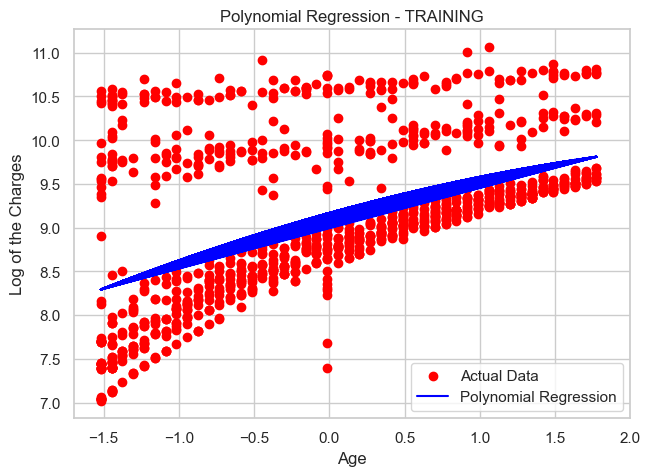

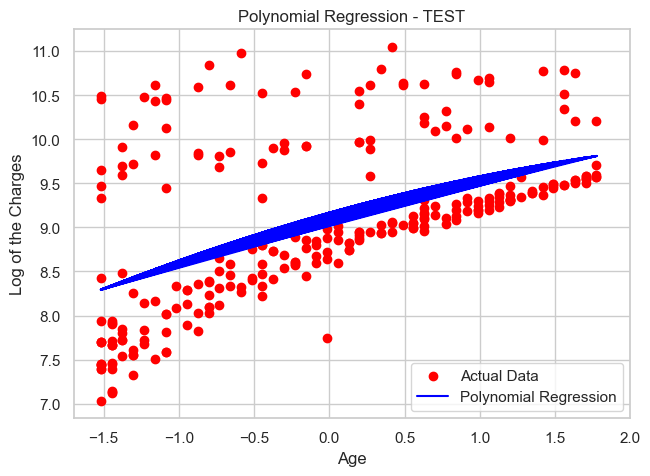

In [77]:
# Here I will plot the training and test polynomial regression predictions against the age feature ONLY. for visualisation puposes
# This helps us understand the relationship between age and the target variable (as we said age is the most important continuous feature in our dataset)
# , and shows us how our polynomial regression model works


# i included the full range of our scaled age feature
age_min = -1.7
age_max = 2.0

# Filter the training data based on the age range as we do not want ages too high or too low on the x axis 
mask = (x_quad_train3[:, 1] >= age_min) & (x_quad_train3[:, 1] <= age_max)


plt.scatter(x_quad_train3[mask, 1], Y_train[mask], color='red', label='Actual Data') # Plotting the data points within the specified age range

#predictions for the filtered x values
plt.plot(x_quad_train3[mask, 1], Y_train_pred_new[mask], color='blue', label='Polynomial Regression')

#  titles and labels
plt.title('Polynomial Regression - TRAINING')
plt.xlabel('Age')
plt.ylabel('Log of the Charges')
plt.legend()

plt.xlim(age_min, age_max)  # Setting the x-axis limits
plt.show()



mask2 = (x_quad_test3[:, 1] >= age_min) & (x_quad_test3[:, 1] <= age_max)

plt.scatter(x_quad_test3[mask2, 1], Y_test[mask2], color='red', label='Actual Data') # Plotting the data points within the specified age range

#predictions for the filtered x values
plt.plot(x_quad_test3[mask2, 1], Y_test_pred_new[mask2], color='blue', label='Polynomial Regression')

#  titles and labels
plt.title('Polynomial Regression - TEST')
plt.xlabel('Age')
plt.ylabel('Log of the Charges')
plt.legend()

plt.xlim(age_min, age_max)  # Setting the x-axis limits
plt.show()


# The regression line is not perfectly straight since this is polynomial regression and it zigzags which is why it is thicker around the middle. Not a problem at this point

In [78]:
# inspired by (dslack, 2016) and (Liu, n.d.)
# This code helps visualise the powers of the polynomial. we used degree 2, so goes up to X squared



features = ['X1']  # only 2 1 feature used (age)

print(quad3.powers_)

for entry in quad3.powers_:
    newFeature = []
    for feat, coef in zip(features, entry): 
        if coef > 0:
            newFeature.append(feat+'**'+str(coef))  # code shows first the powers  of the feature, then shows the feature mutliplied by the powers.
    if not newFeature:
        print(1) # If all powers are 0 then print 1
    else:
        print(' + '.join(newFeature))  

# powers are 0, 1, 2. so we get terms 1 (because anything power 0=1), then X1**1 and X2**2 as the power increases

[[0]
 [1]
 [2]]
1
X1**1
X1**2


In [79]:
poly_regression_new.coef_

array([ 0.        ,  0.47727492, -0.06486075])

In [80]:
poly_regression_new.intercept_

9.16725571904353

In [81]:
# Inspired by (Liu, n.d.)
# trying to see the polynomial regression formula

features = ['(Age)']  # Name of the fature used
terms = []

# Loop through the powers (exponents) and coefficients from the polynomial regression model
for power, coef in zip(quad3.powers_, poly_regression_new.coef_): 
    if power[0] == 0:  # intercept term
        continue
    term = f'{coef:.7f} * {" * ".join([f"{features[0]}**{p}" for p in power if p > 0])}'
    terms.append(term)  

# Combine intercept and terms and then print
polynomial_formula = f"Y = {poly_regression_new.intercept_:.7f} + " + " + ".join(terms) 
print("Polynomial Regression Formula:")
print(polynomial_formula)


Polynomial Regression Formula:
Y = 9.1672557 + 0.4772749 * (Age)**1 + -0.0648608 * (Age)**2


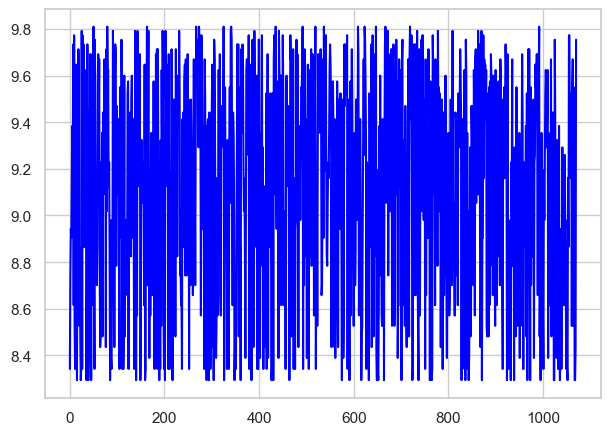

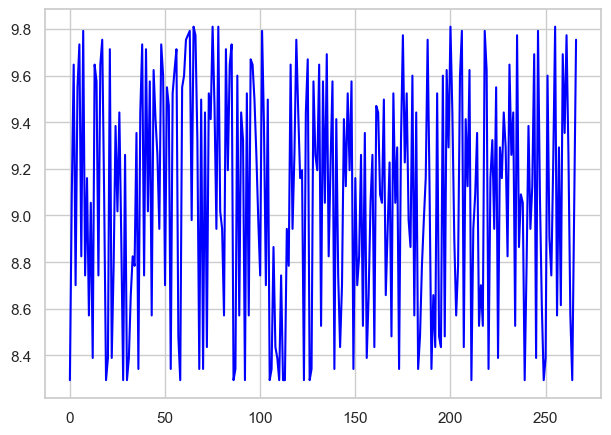

In [82]:
# the predictions plotted

plt.plot(Y_train_pred_new , color='blue')
plt.show()

plt.plot(Y_test_pred_new , color='blue')
plt.show()

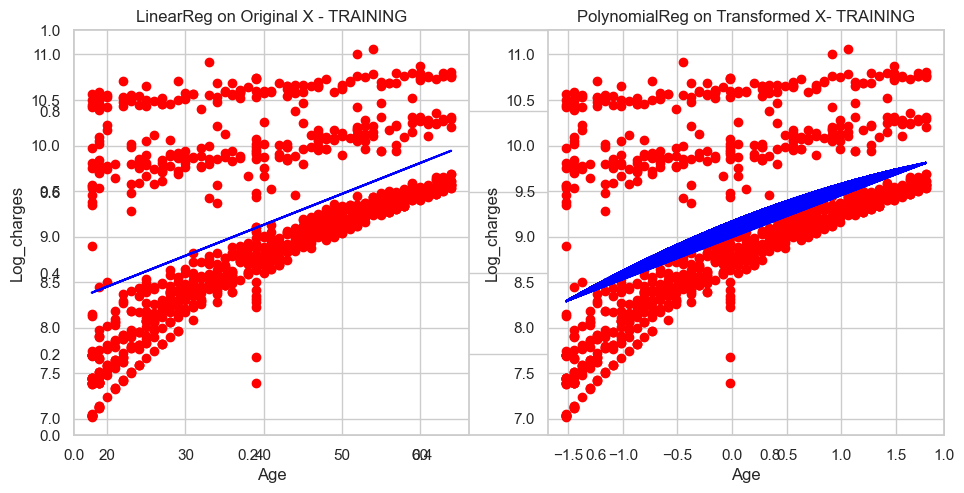

In [88]:
#comparison of linear and polynomial regression TRAINING DATA side-by-side
# Inspired by (Liu, n.d.)

x_test_new = X_test['age']  # select age column only
x_train_new = X_train['age']  

x_test_new =np.array(x_test_new).reshape(-1,1)  
x_train_new =np.array(x_train_new).reshape(-1,1)

Lin_regression_new = LinearRegression().fit(x_train_new,Y_train)  # fit into linear regression model

y_train_pred_new = Lin_regression_new.predict(x_train_new)
y_test_pred_new = Lin_regression_new.predict(x_test_new)  # make predictions on the training as well as testing set


plt.subplots(figsize=(10,5))


plt.subplot(1,2,1)  # Will have 1 row and 2 columns of figures. Now we are using column 2
plt.title("LinearReg on Original X - TRAINING")
plt.scatter(x_train_new,Y_train, color='red')
plt.plot(x_train_new, y_train_pred_new ,color='blue')
plt.xlabel("Age")
plt.ylabel("Log_charges")

plt.subplot(1,2,2)  # Now using column 2
plt.title("PolynomialReg on Transformed X- TRAINING")
plt.scatter(x_quad_train3[mask, 1], Y_train[mask], color='red', label='Actual Data') # Plotting the data points within the specified age range
#predictions for the filtered x values
plt.plot(x_quad_train3[mask, 1], Y_train_pred_new[mask], color='blue', label='Polynomial Regression')
plt.xlabel("Age")
plt.ylabel("Log_charges")
plt.show()

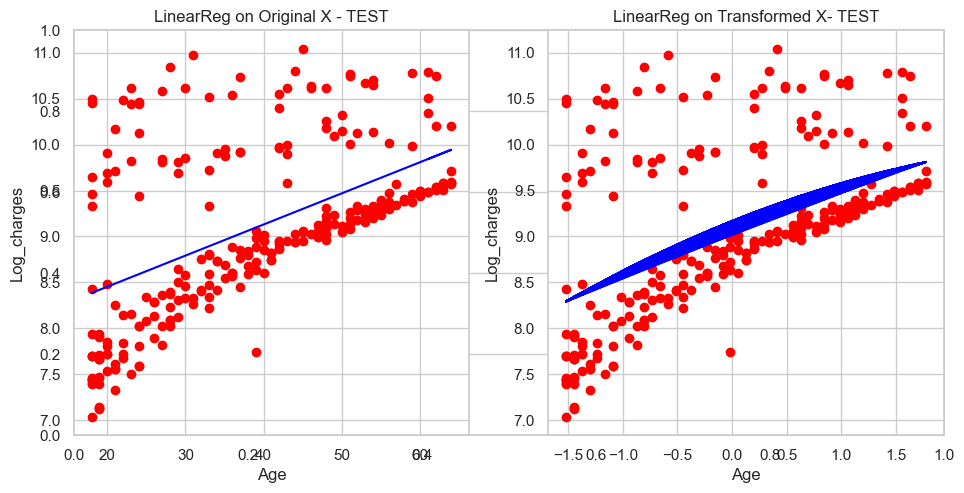

In [89]:
#comparison of linear and polynomial regression TEST DATA side-by-side

import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))


plt.subplot(1,2,1)  # Will have 1 row and 2 columns of figures. Now we are using column 2
plt.title("LinearReg on Original X - TEST")
plt.scatter(x_test_new,Y_test, color='red')
plt.plot(x_test_new, y_test_pred_new ,color='blue')
plt.xlabel("Age")
plt.ylabel("Log_charges")

plt.subplot(1,2,2)  # Now using column 2
plt.title("LinearReg on Transformed X- TEST")
plt.scatter(x_quad_test3[mask2, 1], Y_test[mask2], color='red', label='Actual Data') # Plotting the data points within the specified age range
#predictions for the filtered x values
plt.plot(x_quad_test3[mask2, 1], Y_test_pred_new[mask2], color='blue', label='Polynomial Regression')
plt.xlabel("Age")
plt.ylabel("Log_charges")
plt.show()

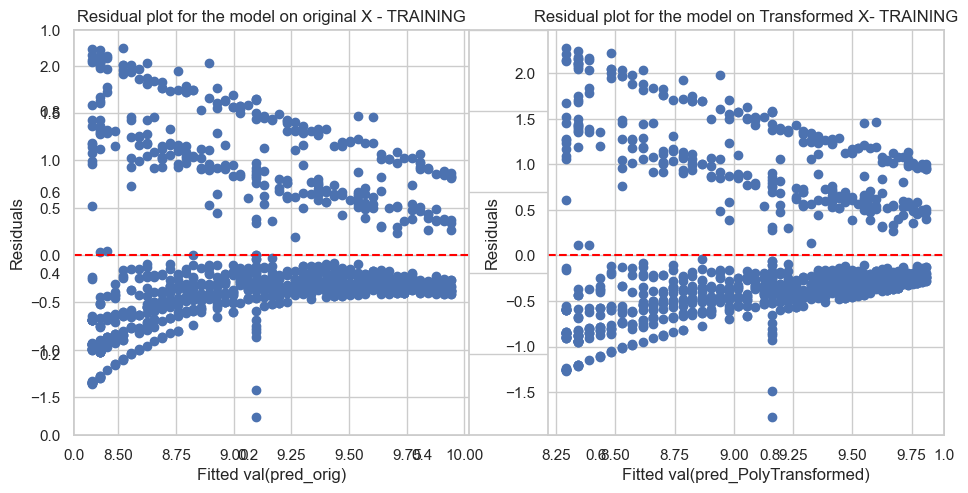

In [90]:
#residual plots side-by-side
# Inspired by (Liu, n.d.)


plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Residual plot for the model on original X - TRAINING")
plt.scatter( y_train_pred_new, (Y_train - y_train_pred_new))# the predicted y values on x axis, and the residual/error (difference between predicted and actual values) on y axis
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel("Fitted val(pred_orig)")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.title("Residual plot for the model on Transformed X- TRAINING")
plt.scatter(Y_train_pred_new[mask], ( Y_train[mask]- Y_train_pred_new[mask]))
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel("Fitted val(pred_PolyTransformed)")
plt.ylabel("Residuals")
plt.show()

# These two resiudal plots are scattered around the 0 line which is good.
# BUt the scattering is not totally random. There is heteroscedasticity, meaning non-constant variance in the residuals
# The linear regression shows slight curve below the residual=0 line, and negative correlation linear patterns above the residual=0 line, which is bad
# The polynomial regression shows a weaker curve pattern below the residual=0 line, and negative correlation linear patterns above the residual=0 line, which is bad
# Therefore, since the curve pattern is weaker, the polynomial residuals are performing better than linear regression. All other aspects look very similar betweeen both models
# The residuals should be totally random and centered around zero (meaning low error in general). The scattering should be constant 
# based on : (Frost, 2017)
# The values of the residuals get reach quite high numbers (+2.5/-2.0)
# There is still plenty of improvements to make, such as changing the degree of the polynomial
# These 2 plots show that there is a better model than these two. Even if R scores are good for both, the resiudal plots are not very good so we must search for another model

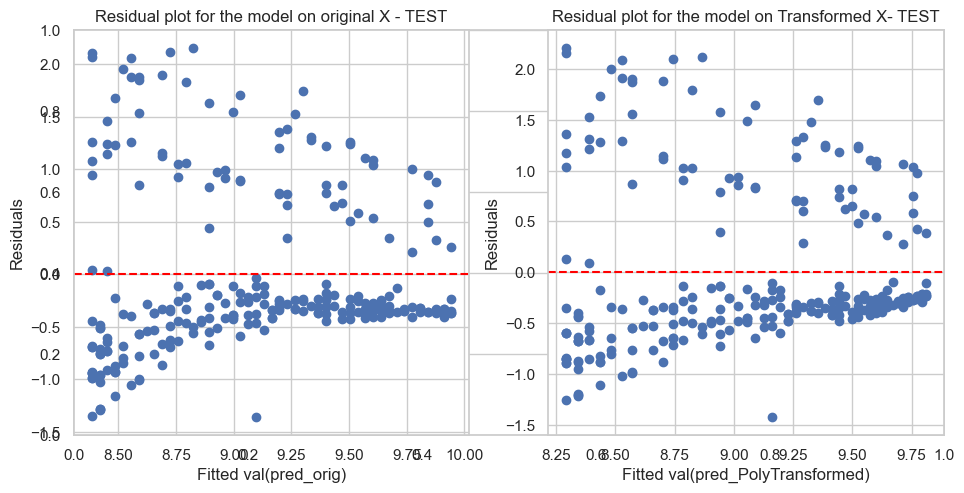

In [91]:

#Cresidual plots side-by-side
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Residual plot for the model on original X - TEST")
plt.scatter( y_test_pred_new, (Y_test - y_test_pred_new))# the predicted y values on x axis, and the residual/error (difference between predicted and actual values) on y axis
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel("Fitted val(pred_orig)")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.title("Residual plot for the model on Transformed X- TEST")
plt.scatter(Y_test_pred_new[mask2], ( Y_test[mask2]- Y_test_pred_new[mask2]))
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel("Fitted val(pred_PolyTransformed)")
plt.ylabel("Residuals")
plt.show()

# similar to training set results

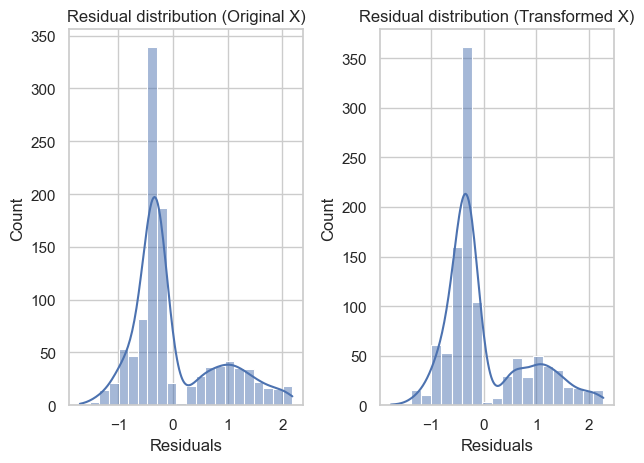

In [92]:
# Residual distirbution curve for training set

# Plot 3: Residual distribution for the linear regression model
plt.subplot(1, 2, 1)
plt.title("Residual distribution (Original X)")
sns.histplot((Y_train - y_train_pred_new), kde=True)  # kde=True adds the kernel density estimate
plt.xlabel("Residuals")

# Plot 4: Residual distribution for polynomial regresssion/transformed X
plt.subplot(1, 2, 2)
plt.title("Residual distribution (Transformed X)")
sns.histplot(( Y_train[mask]- Y_train_pred_new[mask]), kde=True)
plt.xlabel("Residuals")

# Show the plot
plt.tight_layout()
plt.show()



# These histograms of the residuals is used to check if the variance between predicted and actual values is normally distributed.
# The best shape is symmetric bell-shaped histogram, evenly spread around a value of 0.
# (‘Help Online - Origin Help - Residual Plot Analysis’, n.d.)
# if the histogram is not normal, that means the model's assumptions may have not have been satisfied (eg. linearity, homoscedasticity, no multicolinearity, normality of residuals, etc.)
# Both plots are not perfectly bell shaped or symmetrical, but polynomial regression has higher count of residuals that are close to 0
# as can be seen, the peak of the KDE line, next to residual=0, for the linear regression has a count of ~200 while polnomial has ~215
# This means polynomial is better because the closer the error (residual) is to 0, the better the predictions of the model are
# Other than that, the models look very similar

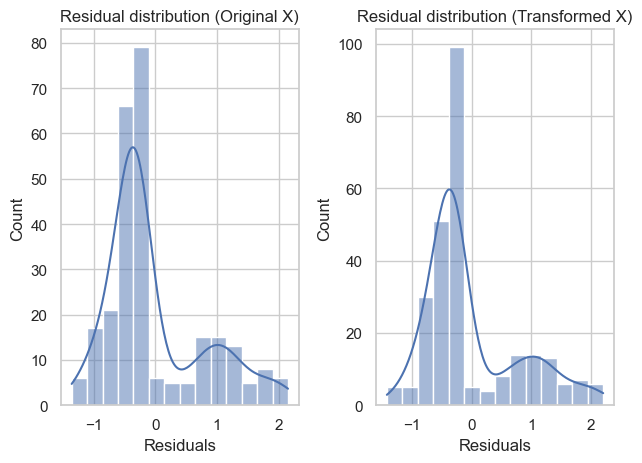

In [93]:
# Residual distirbution curve for testing set


#  Residual distribution for the linear regression model
plt.subplot(1, 2, 1)
plt.title("Residual distribution (Original X)")
sns.histplot((Y_test - y_test_pred_new), kde=True)  # kde=True adds the kernel density estimate
plt.xlabel("Residuals")

# Residual distribution for polynomial regresssion
plt.subplot(1, 2, 2)
plt.title("Residual distribution (Transformed X)")
sns.histplot(( Y_test[mask2]- Y_test_pred_new[mask2]), kde=True)
plt.xlabel("Residuals")

# Show  plot
plt.tight_layout()
plt.show()


# SAME observations as the training data - polynomial better

**Note**

We analysed the feature of age and its predictions. But now I will look at the full model using all the features. What is the optimum degree?

In [94]:
# function to visualise both actual data points and the best fit line
# Inspired by (Liu, n.d.)

def plot_fittedcurve_overpoints(X, y, pred_y, axi):
    axi.scatter(X,y,color='red')
    axi.plot(X, pred_y, color='blue')

In [95]:
# Inspired by (Liu, n.d.)
# next cell will want to sort a zipped list
  
import operator

def sort_myzipxy(x, y):
    zipped = zip(x, y)
  
    # Converting to list
    zipped = list(zipped)

    # Using sorted and operator
    res = sorted(zipped, key = operator.itemgetter(0))
    return res
    

The best model was obtained when setting the degree to: 2
                         R2-score
Degree                           
2                        0.825323
3                        0.825125
4                        0.783015
5                        0.349309
6                      -23.076848
7      -357545526928556160.000000


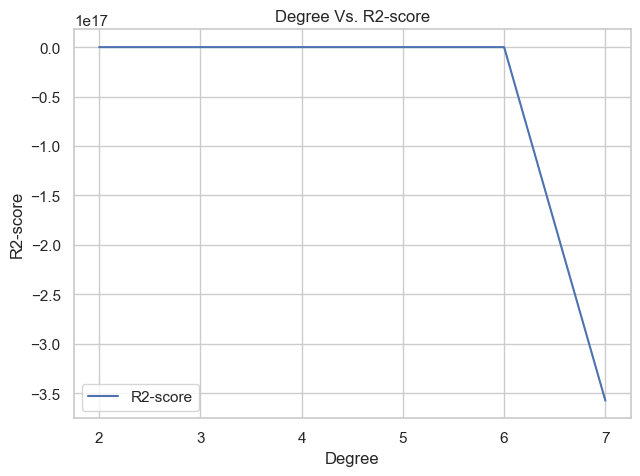

In [96]:
# findig the best degree for my dataset inspired by (Liu, n.d.)

# Initialize LinearRegression and lists to store R^2 scores
lr2 = LinearRegression()
scores2 = []  # store R^2 scores for each degree
degree2 = list(range(2, 8))  # 2 to 7 degrees for testing
best_degree2 = degree2[0]  # Initially set best degree to the first one (degree=2)
best_score2 = 0

# Loop through degrees and find the best one
for n in degree2:
    pr2 = PolynomialFeatures(degree=n)   

    x_pr = pr2.fit_transform(X_train_scaled)  # Fit and transform the training data
    x_pr2 = pr2.transform(X_test_scaled)     # Transform the test data

    lr2.fit(x_pr, Y_train)  # Fit the model on the training data
 
    score2 = lr2.score(x_pr2, Y_test)  
    scores2.append(score2)  # Append the R^2 score to the list

    # Update the best degree if the current model is better
    if score2 > best_score2:
        best_degree2 = n
        best_score2 = score2

# Output the best degree model
print(f'The best model was obtained when setting the degree to: {best_degree2}')

# Create a DataFrame to display the degree vs R^2 score
degree_score_df2 = pd.DataFrame(list(zip(degree2, scores2)), columns=['Degree', 'R2-score'])
degree_score_df2.set_index('Degree', inplace=True)

# Set pandas display option to show the r2 scores in decimals to 6 signiifcant figures 
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Display the DataFrame with R² scores in decimal format
print(degree_score_df2)

# Plot Degree vs R^2 score
degree_score_df2.plot()
plt.xlabel('Degree')
plt.ylabel('R2-score')
plt.title('Degree Vs. R2-score')
plt.show()

# If we use all the features against log_charges, the best degree is 2. The model starts to overfit after that, especially at degree 6 and 7 (negative R^2 scores).


In [98]:
# So to conclude, this is our best polynomial regression model, using degree 2 and scaling the features

# polynomial features
quad = PolynomialFeatures(degree=2)
x_quad_train = quad.fit_transform(X_train_scaled)
x_quad_test = quad.transform(X_test_scaled)         # Transform test features


# Start timer
start_timePR = time.time()
# Fitting the polynomial regression model
poly_regression = LinearRegression().fit(x_quad_train, Y_train)
# End timer
end_timePR = time.time()

# Calculate the time taken for training (in seconds)
training_timePR = end_timePR - start_timePR
print(f"Training Time: {training_timePR:.2f} seconds")



# Now, make predictions
Y_train_pred = poly_regression.predict(x_quad_train)
Y_test_pred = poly_regression.predict(x_quad_test)

# Calculate R-squared scores
r2_trainPR = poly_regression.score(x_quad_train, Y_train)  # R² for training set
r2_testPR = poly_regression.score(x_quad_test, Y_test)     # R² for test set




mse_testPR = mean_squared_error(Y_test, Y_test_pred)  #Mean Squared Error
mse_trainPR = mean_squared_error(Y_train, Y_train_pred)

# results
print("R-squared for Training Set:", r2_trainPR)
print("R-squared for Test Set:", r2_testPR)
print("MSE for Training Set:", mse_trainPR)
print("MSE for Test Set:", mse_testPR)




Training Time: 0.00 seconds
R-squared for Training Set: 0.8383931251032268
R-squared for Test Set: 0.8253233400587787
MSE for Training Set: 0.1347485440019155
MSE for Test Set: 0.15505577668963966


## Model 3: Random Forrest Regressor

This model combines multiple decision trees in an ensemble. Decision trees and ensembles are tree based and are not sensitive to the variance in our feature data, so no need to scale them (Thenraj, 2020). 

Justification: This model was tested because it uses ensemble method to handle complex relatonships with non linearities and interactions.

In [99]:
# (hely333, 2018)
# This performs better than linear regression ands polynomial regression in all factors
# However, testing R^2 score much lower than training and the MSE for testing is higher than training. This means worse performance on test set.Indicates possible overfitting 
# Using 100 trees. You may thik this is causing the overfitting, but even if I lower this number, the test scores does not improve
# I will try to fix this problem later. Perhaps there are outliers that are particularly affecting this model?

# Initialising the RF regressor model
forest = RandomForestRegressor(n_estimators=100,  # 100 trees
                               criterion='squared_error',  # helps calculate MSE
                               random_state=seed, # for reproducibility
                               n_jobs=-1)     # use all the processors available for the parallel processing




# Start timer
start_timeRF = time.time()
forest.fit(X_train, Y_train)   # fit x and y training into the model
# End timer
end_timeRF = time.time()

# Calculate the time taken for training (in seconds)
training_timeRF = end_timeRF - start_timeRF
print(f"Training Time: {training_timeRF:.2f} seconds")

# make predictions using model
forest_train_pred = forest.predict(X_train) 
forest_test_pred = forest.predict(X_test) 


mse_train_forest = mean_squared_error(Y_train, forest_train_pred)  # mean squared error
mse_test_forest = mean_squared_error(Y_test, forest_test_pred)


r2_train_forest = r2_score(Y_train, forest_train_pred)   # R^2 score
r2_test_forest = r2_score(Y_test, forest_test_pred)



print(f'R-squared for Random Forest Training Set: {r2_train_forest}')
print(f'R-squared for Random Forest Test Set: {r2_test_forest}')
print(f'MSE for Random Forest Training Set: {mse_train_forest}')
print(f'MSE for Random Forest Test Set: {mse_test_forest}')



Training Time: 0.17 seconds
R-squared for Random Forest Training Set: 0.9709460708848527
R-squared for Random Forest Test Set: 0.7907853710541815
MSE for Random Forest Training Set: 0.02422529764468041
MSE for Random Forest Test Set: 0.185714203585898


In [100]:
# using max depth = 5 to see if it fixes overfitting

# Initialising the RF regressor model
forest = RandomForestRegressor(n_estimators=100,  # 100 trees
                               criterion='squared_error',  # helps calculate MSE
                               random_state=seed, # for reproducibility
                               n_jobs=-1, 
                               max_depth = 5)     # use all the processors available for the parallel processing




# Start timer
start_timeRF = time.time()
forest.fit(X_train, Y_train)   # fit x and y training into the model
# End timer
end_timeRF = time.time()

# Calculate the time taken for training (in seconds)
training_timeRF = end_timeRF - start_timeRF
print(f"Training Time: {training_timeRF:.2f} seconds")

# make predictions using model
forest_train_pred = forest.predict(X_train) 
forest_test_pred = forest.predict(X_test) 


mse_train_forest = mean_squared_error(Y_train, forest_train_pred)  # mean squared error
mse_test_forest = mean_squared_error(Y_test, forest_test_pred)


r2_train_forest = r2_score(Y_train, forest_train_pred)   # R^2 score
r2_test_forest = r2_score(Y_test, forest_test_pred)



print(f'R-squared for Random Forest Training Set: {r2_train_forest}')
print(f'R-squared for Random Forest Test Set: {r2_test_forest}')
print(f'MSE for Random Forest Training Set: {mse_train_forest}')
print(f'MSE for Random Forest Test Set: {mse_test_forest}')

# inmproves test scores slightly, but significantly worsens train scores

Training Time: 0.14 seconds
R-squared for Random Forest Training Set: 0.8605607203776579
R-squared for Random Forest Test Set: 0.8170776808259139
MSE for Random Forest Training Set: 0.1162651026931141
MSE for Random Forest Test Set: 0.16237522679304883


In [101]:
# optimising hyperparameters
# I do not have a certain set of known hyperparameters to test, so I i will not use gridsearch
# I will use randomised search so that the computer can pick the optimal hyperparameters for me from a range using randint
# This is also less computationally expensive. I will elaborate on this further later

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import time

# Define the parameter distribution.computer picksa random value from the randint ranges
param_dist = {
    'n_estimators': randint(50, 500),              # Randomly pick between 50 and 500
    'max_depth': randint(10, 50),                  # Randomly pick between 10 and 50
    'min_samples_split': randint(2, 20),           # Randomly pick between 2 and 20
    'min_samples_leaf': randint(1, 10),            # Randomly pick between 1 and 10
    'max_features': ['sqrt', 'log2', None],        # Categorical choices
    'bootstrap': [True, False],                    # Categorical choices
}

# Initialize Random Forest Regressor
forest = RandomForestRegressor(random_state=seed, n_jobs=-1)

# RandomizedSearchCVn. 5 fold
random_search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=param_dist,
    n_iter=50,              # Number of random combinations to try
    cv=5,                   # Number of folds
    verbose=2,
    n_jobs=-1,
    random_state=seed
)


# Fit the random search model
random_search.fit(X_train, Y_train)

# Best parameters from the search
print("Best Hyperparameters:", random_search.best_params_)

# Train the model with these best parameters
best_forest = random_search.best_estimator_

# Predict s
forest_train_pred = best_forest.predict(X_train)
forest_test_pred = best_forest.predict(X_test)

# Calculate metrics
mse_train_forest = mean_squared_error(Y_train, forest_train_pred)
mse_test_forest = mean_squared_error(Y_test, forest_test_pred)
r2_train_forest = r2_score(Y_train, forest_train_pred)
r2_test_forest = r2_score(Y_test, forest_test_pred)

print(f'R-squared for Training Set: {r2_train_forest:.4f}')
print(f'R-squared for Test Set: {r2_test_forest:.4f}')
print(f'MSE for Training Set: {mse_train_forest:.4f}')
print(f'MSE for Test Set: {mse_test_forest:.4f}')

# this one has the best test scores so for. Even though the first random forrest model had higher training scores, the computer picked this model as the best estimator
# therefore, i will use this model

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 23, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 16, 'n_estimators': 64}
R-squared for Training Set: 0.8745
R-squared for Test Set: 0.8223
MSE for Training Set: 0.1047
MSE for Test Set: 0.1578


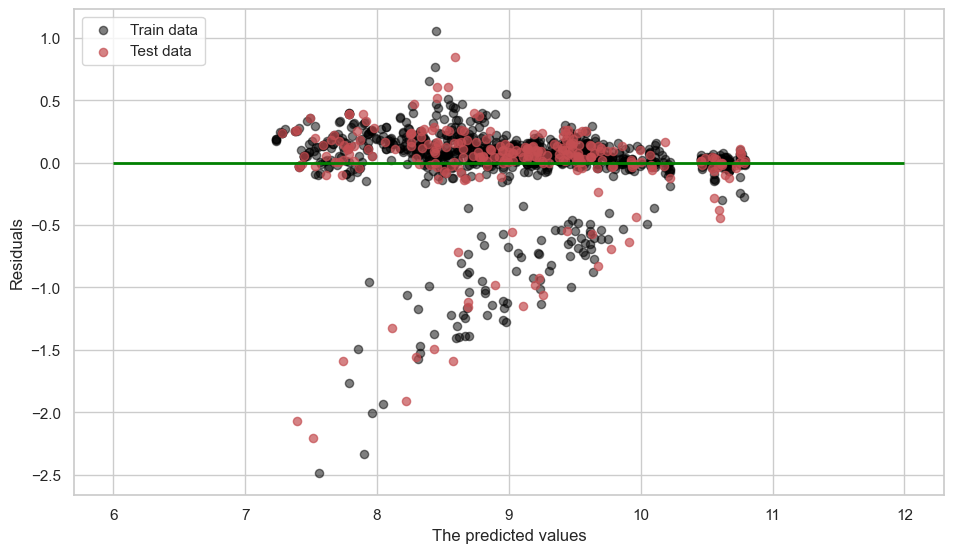

In [102]:
# (hely333, 2018)
# plotting the residuals vs predictions graph. Good performance. 
# For the most part, there is random distributon around the horizontal line, meaning the model is not constantly over-estimating or under-estimating
# For the most part the points are tightly grouped around the horizontal line, which is good
# Note that the training data has 80% of the points,and test only 20%, but it is not obvious when we look at the plot below that the training set is much bigeer than the test set
# WHy? because most of the training residuals are tightly grouped around the residual=0 line where we cant see them very well. Very good training set performance.
# the test residuals hwoever, even though there are less of them, we see they are less tightly grouped, the red shade is not as dark as the grey shade near the horizontal line. Shows worse perfromance for test data than training - overfitting



import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))   # make a new figure

plt.scatter(forest_train_pred,forest_train_pred - Y_train,  # plot the predictions vs the residuals for training data
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - Y_test,   # plot the predictions vs the residuals for testing data
          c = 'r', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('The predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 6, xmax = 12, lw = 2, color = 'green')
plt.show()

In [105]:
# lets del with our biggest outliers, even if they are not EXTREME, just to see if it improves performamce
# i iwll remove outliers for test and train that are below -2 residual

# Initialize and fit the Random Forest Regressor with best hyperparameters
forest = RandomForestRegressor(
    n_estimators=409,            # Best hyperparameter
    max_depth=32,                # Best hyperparameter
    min_samples_split=5,         # Best hyperparameter
    min_samples_leaf=8,          # Best hyperparameter
    max_features=None,           # Best hyperparameter
    bootstrap=True,              # Best hyperparameter
    random_state=seed
)

forest.fit(X_train, Y_train)

# predictions
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

# residuals
residuals_train = forest_train_pred - Y_train
residuals_test = forest_test_pred - Y_test

# Remove rows with residuals < -2 from training data
X_train_filtered, Y_train_filtered = X_train[residuals_train > -2], Y_train[residuals_train >= -2]

# Remove rows with residuals < -2 from test data
X_test_filtered, Y_test_filtered = X_test[residuals_test >= -2], Y_test[residuals_test >= -2]

# Reinitialize and fit the Random Forest Regressor with the filtered training data
forest_filtered = RandomForestRegressor(
    n_estimators=409,            # Best hyperparameter
    max_depth=32,                # Best hyperparameter
    min_samples_split=5,         # Best hyperparameter
    min_samples_leaf=8,          # Best hyperparameter
    max_features=None,           # Best hyperparameter
    bootstrap=True,              # Best hyperparameter
    random_state=seed
)
forest_filtered.fit(X_train_filtered, Y_train_filtered)

# predictions with the filtered model
forest_train_pred_filtered = forest_filtered.predict(X_train_filtered)
forest_test_pred_filtered = forest_filtered.predict(X_test_filtered)

# mse
mse_train_filtered = mean_squared_error(Y_train_filtered, forest_train_pred_filtered)
mse_test_filtered = mean_squared_error(Y_test_filtered, forest_test_pred_filtered)
r2_train_filtered = r2_score(Y_train_filtered, forest_train_pred_filtered)
r2_test_filtered = r2_score(Y_test_filtered, forest_test_pred_filtered)

print(f'R-squared for Filtered Random Forest Training Set: {r2_train_filtered}')
print(f'R-squared for Filtered Random Forest Test Set: {r2_test_filtered}')
print(f'MSE for Filtered Random Forest Training Set: {mse_train_filtered}')
print(f'MSE for Filtered Random Forest Test Set: {mse_test_filtered}')

# Calculate the number of outliers removed from the training data
num_outliers_train = len(X_train) - len(X_train_filtered)
print(f'Number of outliers removed from the training set: {num_outliers_train}')

# Calculate the number of outliers removed from the test data
num_outliers_test = len(X_test) - len(X_test_filtered)
print(f'Number of outliers removed from the test set: {num_outliers_test}')

# This is more like it. Now our model is better

R-squared for Filtered Random Forest Training Set: 0.8913111836842411
R-squared for Filtered Random Forest Test Set: 0.8569462761354342
MSE for Filtered Random Forest Training Set: 0.09057671276535141
MSE for Filtered Random Forest Test Set: 0.12762201808890616
Number of outliers removed from the training set: 2
Number of outliers removed from the test set: 2


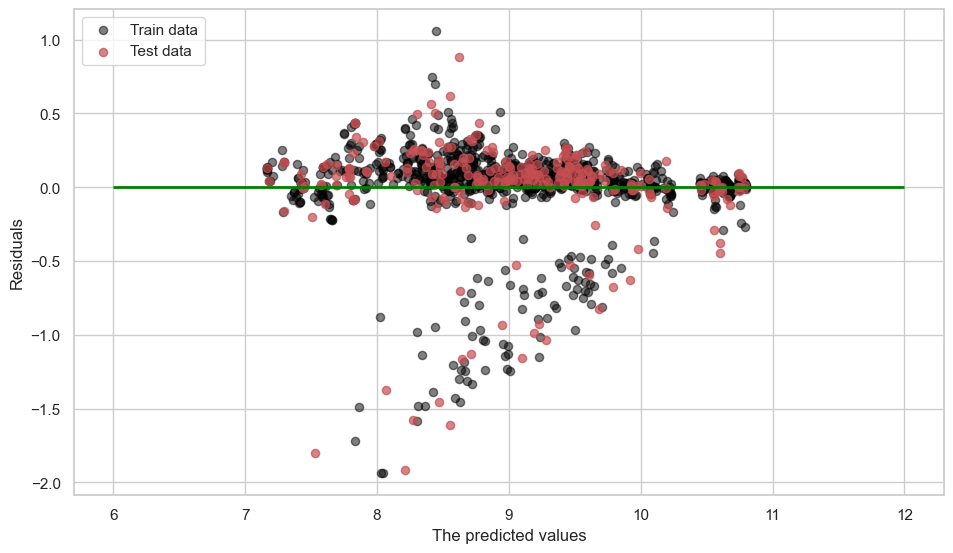

In [106]:
# (hely333, 2018)



import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))   # make a new figure

plt.scatter(forest_train_pred_filtered,forest_train_pred_filtered - Y_train_filtered,  # plot the predictions vs the residuals for training data
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred_filtered,forest_test_pred_filtered - Y_test_filtered,   # plot the predictions vs the residuals for testing data
          c = 'r', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('The predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 6, xmax = 12, lw = 2, color = 'green')
plt.show()

**Should we remove the outliers?**

The advantages of removing it is that it is ruining the value of our test scores and so could be removed to improve this score. The disadvantages of removing it are that filtering the test set to remove outliers introduces bias, since it does not reflect the original distribution of data. It also means the model will not be fitted to allow for outliers like this that are present in the real world. Overall, I feel the increase in R^2 score of around 3.3% and the reduction of MSE of around 3% for the test data are not enough of a reason to remove the outlier and introduce bias. The original scores for the test data for bor the R&2 and MSE were already good even with the outlier included. So, the outlier will be kept. The randomm forrest model even before removing the outliers is the best model we have so far.

**Note:** 

I am not balancing the data. Balancing is needed only in classficiation projects, not regression. All online literature and resources I read such as (Santiago, 2023) spoke about balancing data in the context of classification NOT regression.

## Model 4: Linear regression but OPTIMISED with gradient descent

All code for this part is inspired by (Liu, n.d.).

Gradient descent is an parameter optimisation algorithm, and I will test it with my linear rregression algorihtm. For the sake of ease of analysis, only one feature will be used from the values of X_train and X_test. I will use the 'age' column because it is the most important continuous feature and ofcourse plot it against our target variable 'log_charges'.

Justification: This model was tested because it shows us if optimising our linear regression model can improve results.


In [107]:
# Reshaping both X and y into 2D arrays so that they are compatible with the graident descent algorithm
# since this is a gradient based algorithm, we need to scaled features

# Using all features in X_train
X_trainGD = X_train_scaled[:, 0]
X_trainGD = X_trainGD.reshape(-1, 1)  # Ensure Y is 2D if needed  # No need to reshape, it remains (n_samples, n_features)
Y_trainGD = Y_train.values.reshape(-1, 1)  # Ensure Y is 2D if needed
print(f'X shape: {X_trainGD.shape}')
print(f'X type: {type(X_trainGD)}')
print(f'y shape: {Y_trainGD.shape}')
print(f'y type: {type(Y_trainGD)}')


X shape: (1071, 1)
X type: <class 'numpy.ndarray'>
y shape: (1071, 1)
y type: <class 'numpy.ndarray'>


In [108]:
# The first column is the dummy feature. It has to be a column of 1's not 0's. It represents X^0.
# X^0 will be mutliplied by theta0. theta 0 is the intercept term. If X^0=1, then 1 times theta0 = theta0, so during training we can easily learn the intercept theta 0
# If X^0 = 0, it would eliminate the contribution of theta0, menaing we will not be able to compute the intercept. The model will now be forced to go throough th eorigin (0,0)
# X^0 =1 also allows the regression line to shift up or down, which means more flexibility in the data fitting

X_trainGD = np.hstack((np.ones(shape=(len(X_trainGD), 1)), X_trainGD))
X_trainGD

array([[ 1.        , -1.44665658],
       [ 1.        , -0.80252131],
       [ 1.        , -0.44466837],
       ...,
       [ 1.        , -1.51822717],
       [ 1.        , -1.30351541],
       [ 1.        ,  1.55930805]])

Iteration: 1 - MSE: 83.788
Theta: [0.91079205 0.05549081]
Gradient: [-9.10792049 -0.55490811]
Iteration: 2 - MSE: 67.969
Theta: [1.73045117 0.1046282 ]
Gradient: [-8.19659122 -0.49137391]
Iteration: 3 - MSE: 55.159
Theta: [2.46809681 0.14812688]
Gradient: [-7.37645639 -0.43498677]
Iteration: 4 - MSE: 44.785
Theta: [3.13193577 0.18662225]
Gradient: [-6.63838963 -0.38495366]
Iteration: 5 - MSE: 36.385
Theta: [3.72935357 0.22067911]
Gradient: [-5.97417799 -0.3405686 ]
Iteration: 6 - MSE: 29.582
Theta: [4.26699662 0.25079942]
Gradient: [-5.37643047 -0.30120316]
Iteration: 7 - MSE: 24.073
Theta: [4.7508462  0.27742922]
Gradient: [-4.83849583 -0.26629803]
Iteration: 8 - MSE: 19.611
Theta: [5.18628505 0.30096478]
Gradient: [-4.35438843 -0.23535551]
Iteration: 9 - MSE: 15.999
Theta: [5.57815722 0.32175805]
Gradient: [-3.91872174 -0.20793274]
Iteration: 10 - MSE: 13.073
Theta: [5.93082204 0.34012163]
Gradient: [-3.52664826 -0.18363576]
Iteration: 11 - MSE: 10.703
Theta: [6.24820261 0.35633304]


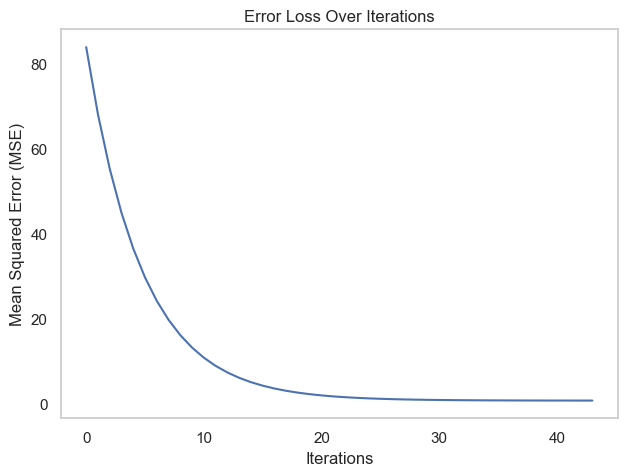

In [109]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Define the gradient calculation function
def calc_gradient(thetas, x, y):
    # Calculate the prediction
    y_hat = np.dot(x, thetas).flatten()   # flatten a 2-d x.dot(thetas) array into a 1-d array
    
    # Calculate error
    error = y_hat - y.ravel() #TO ENSURE Y IS  1D ARRAY
    
    # Calculate the gradient
    gradient = (1.0 / len(x)) * error.dot(x)
    
    # Calculate mean squared error
    mse = np.mean(error ** 2)
    
    return gradient, mse

# Initial parameters and setup
thetas = np.array([0, 0])  # Initialize thetas
iter_count = 0
lr = 0.1  # Learning rate/step
tolerance = 0.01  # Convergence tolerance
mse_history = []  # List to store MSE over iterations

# Gradient descent loop
while True:
    iter_count += 1
    # Compute gradient and MSE on the training set
    gradient, mse = calc_gradient(thetas, X_trainGD, Y_trainGD)
    thetas_hat = thetas - lr * gradient  # Update thetas
    
    mse_history.append(mse)  # Store the MSE for plotting
    
    # Convergence condition
    if np.sum(abs(thetas_hat - thetas)) < tolerance: 
        print("Converged!")
        break
        
    # Stop if max iterations reached
    if iter_count > 100:
        print("Hit the max iteration limit!")
        break
    
    # Update thetas for the next iteration
    thetas = thetas_hat
    
    # Output every 10 iterations
    if iter_count % 1 == 0:
        print(f"Iteration: {iter_count} - MSE: {mse:.3f}")
        print("Theta:", thetas)
        print("Gradient:", gradient)

# Plotting MSE over iterations
plt.plot(mse_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error Loss Over Iterations')
plt.grid()
plt.show()


# After 43 iterations, it stops, meaning it has converged. 
# As can be see, the gradient at 43 iterations is nearly 0, whiih means we reached the minimum point in the cost function plot (the lowest cost)
# the gradient is nealy 0 because the gradient line drawn on the cost function plot is nearly straight horizontally (the lowest point of the cost function plot)

In [110]:

print(f"the shape of x: {X_trainGD.shape}")
print(f"the shape of thetas: {thetas.shape}")

# Checking if the dimensions are approptiate for multiplication
# the shape of x: (1070, 2)
# the shape of thetas: (2,)

# For the equations in the next cell for graident decsent, we will be multiplying theta (1D vector) and X (2D matrix). 
# The dimensions are appropriate to multiply both, because The number of columns of X is equal to the number of elements of theta.
# Matrix-vector multiplication - each row of X timed by theta element-wise and then summed


the shape of x: (1071, 2)
the shape of thetas: (2,)


In [111]:

# Evaluate the model on the test set

X_testGD = X_test_scaled[: , 0]  # This selects the first column as a 1D array
X_testGD = X_testGD.reshape(-1, 1) 
X_testGD = np.hstack((np.ones(shape=(len(X_testGD), 1)), X_testGD))
Y_testGD = Y_test.values.reshape(-1, 1)  # Ensure Y is 2D 
print(f'X shape: {X_testGD.shape}')
print(f'X type: {type(X_testGD)}')
print(f'y shape: {Y_testGD.shape}')
print(f'y type: {type(Y_testGD)}')


y_test_pred = np.dot(X_testGD, thetas).flatten()
test_mse = np.mean((y_test_pred - Y_testGD) ** 2)
print("Test MSE:", test_mse)

# mse = 1.1. quite high, will compare to OLS

X shape: (267, 2)
X type: <class 'numpy.ndarray'>
y shape: (267, 1)
y type: <class 'numpy.ndarray'>
Test MSE: 1.1287461499710223


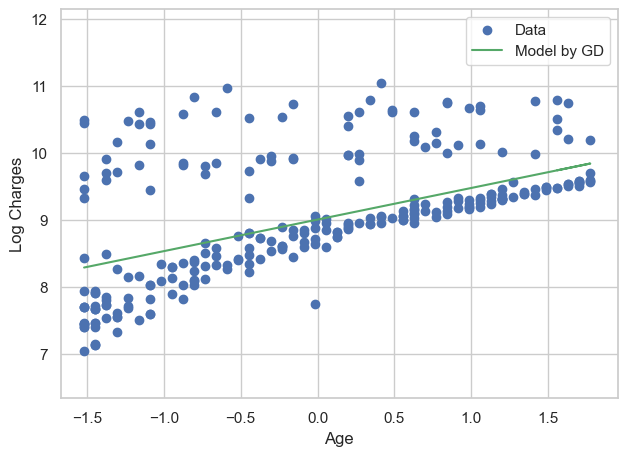

In [112]:




# predictions using the thetas found during gradient descent
y_hat_GD = np.dot(X_testGD, thetas)  # Predictions for test set based on the previous gradient descent

# scatter plot of the real points
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  #:, 1 because we Want to use use 2ND COLUMN, first is for the bias

# line o fbest fit using gradient descent
plt.plot(X_testGD[:, 1], y_hat_GD, c='g', label='Model by GD')  # BEST FIT line 

plt.legend(loc='best')  # At best location

plt.xlabel('Age')
plt.ylabel('Log Charges')
# Set plot limits if needed (optional)
plt.xlim(X_testGD[:, 1].min() * 1.1, X_testGD[:, 1].max() * 1.1)  # Slightly extend x-axis
plt.ylim(Y_testGD.min() * 0.9, Y_testGD.max() * 1.1)  # Slightly extend y-axis

plt.show()


In [113]:
# use the model to make two predictions
# i.e. calculate y_hat with the thetas found by the training

new_x = np.array([[1, -0.5], [1, 1.5]]) # (note that we have also have a value of 1 for x0)   
#FROM ABOVE MAKE A NEW ARRAY OF 2 DATA POINTS - again remember that these are the scaled age values of -0.5 nd 1.5. I want to PREDICT log_charges USING THETAS FROM gradient descent
new_y_hat_GD = new_x.dot(thetas)  # predicted value
print(new_y_hat_GD)

[8.76907933 9.71430549]


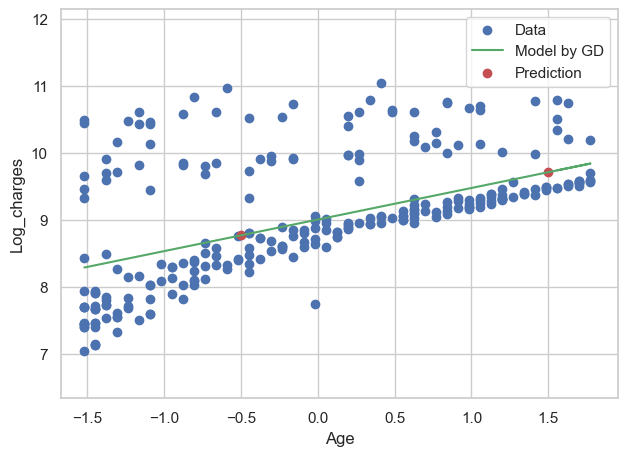

In [114]:
# We scatter the data points first
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  # Using the 2nd column for 'age'
# We then plot the model which is a straight line
plt.plot(X_testGD[:, 1], y_hat_GD, c='g', label='Model by GD')  # Best fit line using the predictions

# We scatter the two data points with the predictions, which are apparently on the straight line of the model
plt.scatter(new_x[:, 1], new_y_hat_GD, c='r', label='Prediction')

plt.legend(loc='best')
plt.xlim(X_testGD[:, 1].min() * 1.1, X_testGD[:, 1].max() * 1.1)  #Slightly extend x-axis
plt.ylim(Y_testGD.min() * 0.9, Y_testGD.max() * 1.1)  #Slightly extend y-axis

plt.xlabel('Age')
plt.ylabel('Log_charges')
plt.show()


**Comparing Gradient descent and Ordinary Least Squares**

In [115]:
# Train a new model using linear regression from sklearn
# obvisuly this uses X_trainGD, which is scaled, but it wont matter because we already mentioned earlier linear rregression is not significanltly impacted by scaling

from sklearn.linear_model import LinearRegression  # Importing the LinearRegression class

# Fit the model using the training data
regr = LinearRegression().fit(X_trainGD[:, 1].reshape(-1, 1), Y_trainGD)  # Fit the model with reshaped X and Y


In [116]:
# y_hat predicted by the new model using the test data
y_hat_ols_test = regr.predict(X_testGD[:, 1].reshape(-1, 1))  # Predictions on test data


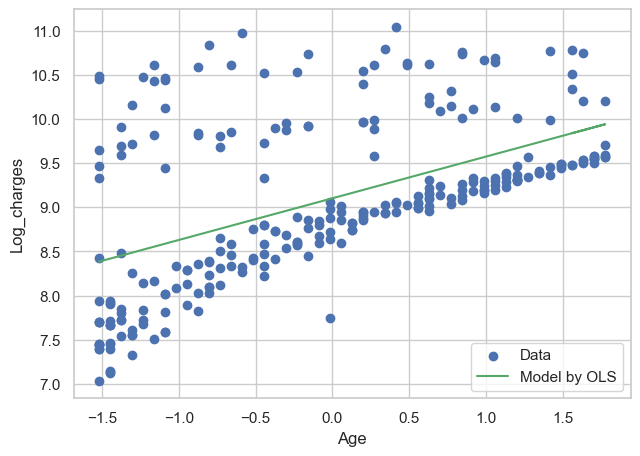

In [117]:
# plot the training data and new model 

# We scatter the data points first
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  # Using the 2nd column for 'age'
# We then plot the model which is a straight line
plt.plot(X_testGD[:, 1], y_hat_ols_test, c='g', label='Model by OLS')  # Best fit line using the predictions

plt.legend(loc='best')

plt.xlabel('Age')
plt.ylabel('Log_charges')
plt.show()

In [118]:
# Using this newly trained model to make two predictions

# make these predictions using the new model
new_y_hat_ols = regr.predict(new_x[:,1].reshape(-1, 1)) # use the new model to predict
new_y_hat_ols 

array([[8.866647  ],
       [9.81340933]])

In [119]:
print(f'shape of new_x is {new_x.shape}, new_y_hat_ols shape is:{new_y_hat_ols.shape}')

shape of new_x is (2, 2), new_y_hat_ols shape is:(2, 1)


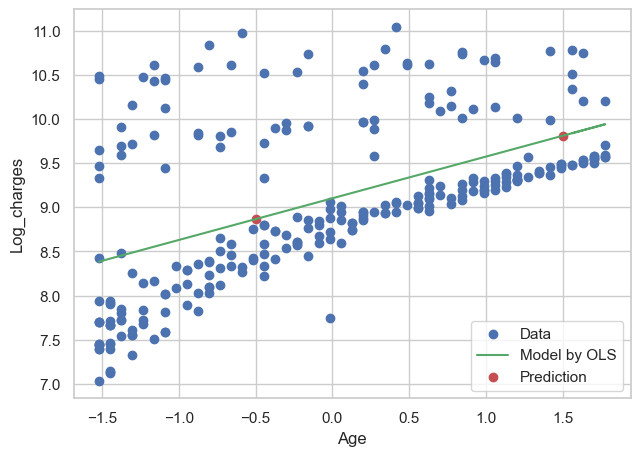

In [120]:
# plot the training data and new model 
# plot the training data, new model and predictions
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  # Using the 2nd column for 'age'
# We then plot the model which is a straight line
plt.plot(X_testGD[:, 1], y_hat_ols_test, c='g', label='Model by OLS')  # Best fit line using the predictions

plt.scatter(new_x[:,1], new_y_hat_ols, c='r', label='Prediction')  # USD SCATTER FOR THE 2 POINTS
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('Log_charges')
plt.show()

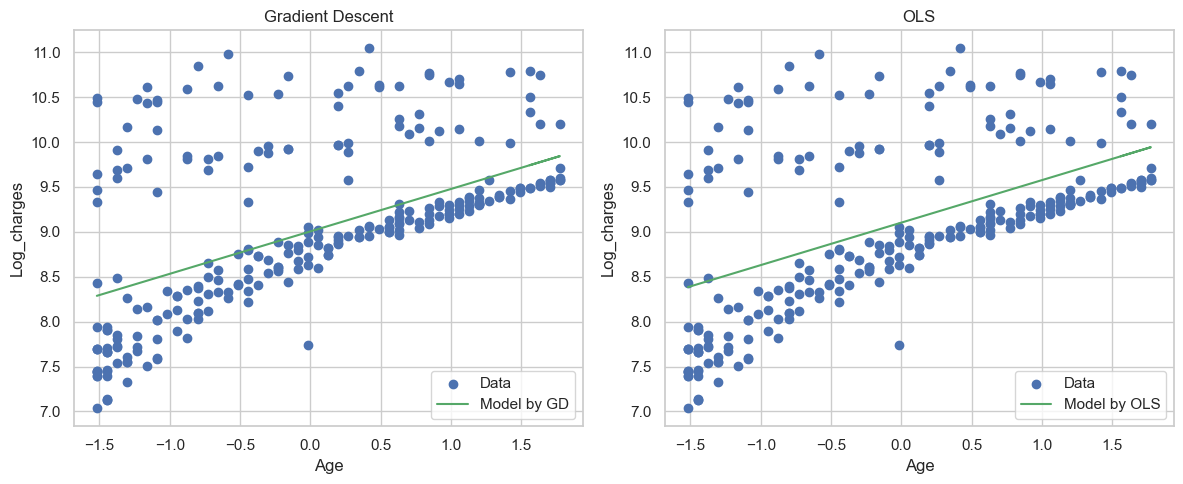

In [121]:
# two side-by-side plots to compare OLS and GD

plt.figure(figsize=(12, 5))   # This line initializes a new figure for plotting with a specified size of 12 inches wide and 5 inches tall. 


plt.subplot(1, 2, 1) # using first column subplot
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  # Using the 2nd column for 'age'
# We then plot the model which is a straight line
plt.plot(X_testGD[:, 1], y_hat_GD, c='g', label='Model by GD')  # Best fit line using the predictions
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('Log_charges')
plt.title('Gradient Descent')

plt.subplot(1, 2, 2)  # NOW USING COLUMN 2 of subplot
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  # Using the 2nd column for 'age'
# We then plot the model which is a straight line
plt.plot(X_testGD[:, 1], y_hat_ols_test, c='g', label='Model by OLS')  # Best fit line using the predictions
plt.legend(loc='best')
plt.xlabel('Age')
# label x and y axis.
plt.ylabel('Log_charges')
plt.title('OLS')

plt.tight_layout()  # makes the layout better

plt.show()

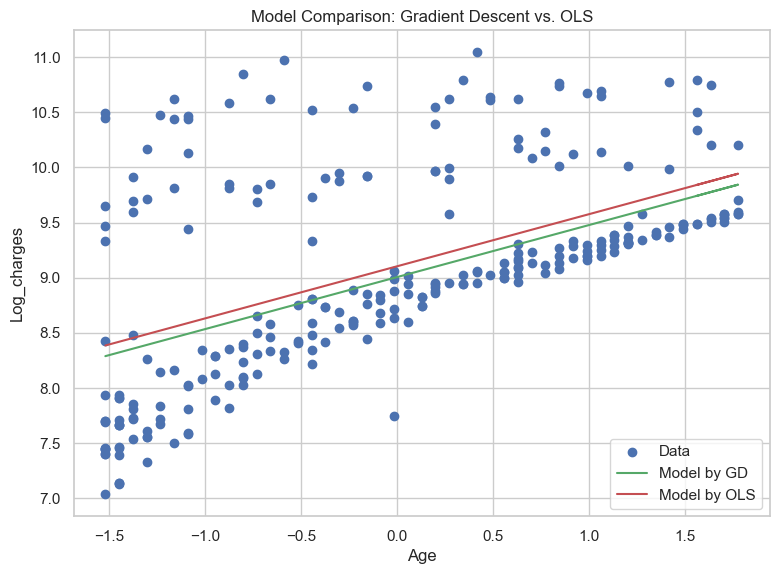

In [122]:
# the 2 lines of best fit on same plot
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  # Using the 2nd column for 'age'

# Plot the model based on Gradient Descent
plt.plot(X_testGD[:, 1], y_hat_GD, c='g', label='Model by GD')  # Best fit line using the predictions

# Plot the model based on Ordinary Least Squares (OLS)
plt.plot(X_testGD[:, 1], y_hat_ols_test, c='r', label='Model by OLS') 

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Log_charges')
plt.legend(loc='best')

# title
plt.title('Model Comparison: Gradient Descent vs. OLS')

# Show the plot
plt.show()

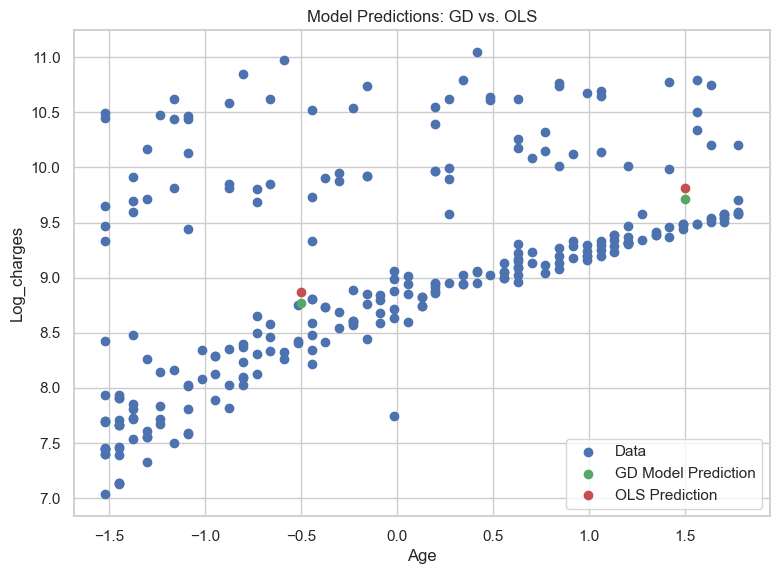

In [123]:
# now plotting the 2 predicted points 

plt.figure(figsize=(8, 6))
plt.scatter(X_testGD[:, 1], Y_testGD, c='b', label='Data')  # Using the 2nd column for 'age'

plt.scatter(new_x[:, 1], new_y_hat_GD, c='g', label='GD Model Prediction')
plt.scatter(new_x[:,1], new_y_hat_ols, c='r', label='OLS Prediction')  # USD SCATTER FOR THE 2 POINTS

plt.xlabel('Age')
plt.ylabel('Log_charges')
plt.legend(loc='best')
plt.title('Model Predictions: GD vs. OLS')

plt.show()


X_random: [[ 1.         -1.375086  ]
 [ 1.          1.41616687]]
X_random.shape: (2, 2)
y_true_random: [[7.80678231]
 [9.45840636]]
y_true_random.shape: (2, 1)
y_pred_random: [[8.45239777]
 [9.7737243 ]]
y_pred_random.shape: (2, 1)


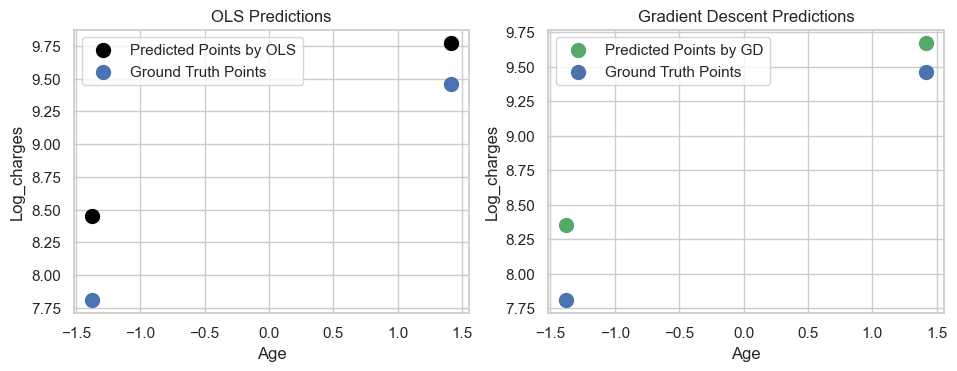

In [124]:
# plotting completely random points

import random


# allows us to generate random indices that we will use to get our X values
random_indices = random.sample(range(len(X_testGD)), 2)

# Select the corresponding points in X using standard NumPy indexing
X_random = X_testGD[random_indices]  
print(f'X_random: {X_random}')
print(f'X_random.shape: {X_random.shape}')  

# get alues for y_true using random indices
y_true_random = Y_testGD[random_indices]  # Assuming Y_testGD is a 1D array
print(f'y_true_random: {y_true_random}')
print(f'y_true_random.shape: {y_true_random.shape}')  

# predict
y_pred_random = regr.predict(X_random[:, 1].reshape(-1, 1))  
print(f'y_pred_random: {y_pred_random}')
print(f'y_pred_random.shape: {y_pred_random.shape}')  

# Plotting the predictions along with the actual data for visualization
plt.figure(figsize=(10, 3.5))

# OLS predictions
plt.subplot(1, 2, 1)
plt.scatter(X_random[:, 1], y_pred_random, c='black', label='Predicted Points by OLS', s=100)  # Random predictions
plt.scatter(X_random[:, 1], y_true_random, c='b', label='Ground Truth Points', s=100)  # Ground truth
plt.xlabel('Age')  # X[:, 1] is the 'Age' column
plt.ylabel('Log_charges')
plt.legend(loc='best')
plt.title('OLS Predictions')

#  GD predictions
y_pred_random_gd = X_random.dot(thetas) 
plt.subplot(1, 2, 2)
plt.scatter(X_random[:, 1], y_pred_random_gd, c='g', label='Predicted Points by GD', s=100)  # GD predictions
plt.scatter(X_random[:, 1], y_true_random, c='b', label='Ground Truth Points', s=100)  # Ground truth
plt.xlabel('Age')  # X[:, 1] is the 'Age' column
plt.ylabel('Log_charges')
plt.legend(loc='best')
plt.title('Gradient Descent Predictions')

plt.show()


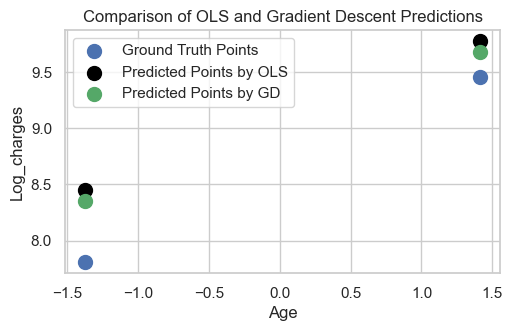

In [125]:
# Plotting the predictions along with the actual data for visualization


plt.figure(figsize=(5, 3))
# Plot the actual ground truth points
plt.scatter(X_random[:, 1], y_true_random, c='b', label='Ground Truth Points', s=100)  # Ground truth in blue

# Plot the OLS predictions
plt.scatter(X_random[:, 1], y_pred_random, c='black', label='Predicted Points by OLS', s=100)  # OLS predictions

# Plot the GD predictions
plt.scatter(X_random[:, 1], y_pred_random_gd, c='g', label='Predicted Points by GD', s=100)  # GD predictions

plt.xlabel('Age')  # Assuming X[:, 1] is the 'Age' column
plt.ylabel('Log_charges')
plt.legend(loc='best')
plt.title('Comparison of OLS and Gradient Descent Predictions')
plt.show()


In [127]:
# MSE Calculation for both models. hopefully GD improved the model


regr_OLS = LinearRegression()
regr_OLS = regr_OLS.fit(X_trainGD[:,1].reshape(-1, 1), Y_trainGD) # LinearRegression() creates an instance of the class
y_all_hat_ols = regr_OLS.predict(X_testGD[:,1].reshape(-1, 1))


y_all_hat_GD = X_testGD.dot(thetas)
mse_GD_all = mean_squared_error(Y_testGD, y_all_hat_GD)  # mean_squared_error is a built in fucntion in sklearn
mse_OLS_all = mean_squared_error(Y_testGD, y_all_hat_ols) 


print(f"MSE for Gradient Descent model: {mse_GD_all:.2f}")
print(f"MSE for OLS model: {mse_OLS_all:.2f}")

# The results when I ran it show that the gradient descent made the MSE slighlty worse.

MSE for Gradient Descent model: 0.63
MSE for OLS model: 0.62


In [128]:
# now we can get r2 score as well


# OLS Model
regr_OLS = LinearRegression()
regr_OLS.fit(X_trainGD[:, 1].reshape(-1, 1), Y_trainGD)  # Fit the model
y_all_hat_ols = regr_OLS.predict(X_testGD[:, 1].reshape(-1, 1))  # Predictions using OLS

# GD Model Predictions
y_all_hat_GD = X_testGD.dot(thetas)  # use our thetas

# MSE Calculation
mse_GD_all = mean_squared_error(Y_testGD, y_all_hat_GD)
mse_OLS_all = mean_squared_error(Y_testGD, y_all_hat_ols)

# R2 Calculation
r2_GD_all = r2_score(Y_testGD, y_all_hat_GD)  
r2_OLS_all = r2_score(Y_testGD, y_all_hat_ols)

# Print MSE 
print(f"MSE for Gradient Descent model: {mse_GD_all:.2f}")
print(f"MSE for OLS model: {mse_OLS_all:.2f}")

# Print R2
print(f"R^2 for Gradient Descent model: {r2_GD_all:.2f}")
print(f"R^2 for OLS model: {r2_OLS_all:.2f}")

# The results when I ran it (as evidenced by the pictue below) show that the gradient descent made the MSE and R2 scores slighlty worse.

MSE for Gradient Descent model: 0.63
MSE for OLS model: 0.62
R^2 for Gradient Descent model: 0.29
R^2 for OLS model: 0.30


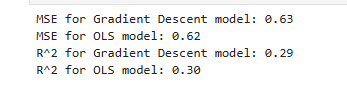

**Using the actual library**:

Now that we have tested the manually written code for gradient descent, it would be useful to test on the entire dataset using a built in library caled SGDRegressor, which carries out stochastic garadient descent. Batcch gradient descent and mini-batch gardient descent do not have built in libraries, so I will just test the stochastic gradient descent, which updates the model parameters successively using each training example.

In [129]:

from sklearn.linear_model import SGDRegressor


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# According to (suzanne, 2023), all the pre processing steps have now been completed.

# Create the SGD Regressor model with gradient descent, the hyperparameters below will be optimied
sgd_regressor = SGDRegressor(max_iter=10, learning_rate='constant', eta0=0.1)

# Start timer
start_timeSGD = time.time()

# Train the model using SGDRegressor
sgd_regressor.fit(X_train_scaled, Y_train)

# End timer
end_timeSGD = time.time()



# Calculate the time taken for training 
training_timeSGD = end_timeSGD - start_timeSGD
print(f"Training Time with Gradient Descent (SGD): {training_timeSGD:.2f} seconds")

# now we can predict
y_train_pred_SGD = sgd_regressor.predict(X_train_scaled)
y_test_pred_SGD = sgd_regressor.predict(X_test_scaled)

# Calculate R-squared and MSE 
r2_trainSGD = r2_score(Y_train, y_train_pred_SGD)
r2_testSGD = r2_score(Y_test, y_test_pred_SGD)

mse_trainSGD = mean_squared_error(Y_train, y_train_pred_SGD)
mse_testSGD = mean_squared_error(Y_test, y_test_pred_SGD)

# Print scores
print(f'R-squared for Training Set: {r2_trainSGD}')
print(f'R-squared for Test Set: {r2_testSGD}')
print(f'MSE for Training Set: {mse_trainSGD}')
print(f'MSE for Test Set: {mse_testSGD}')


Training Time with Gradient Descent (SGD): 0.00 seconds
R-squared for Training Set: 0.4742398956750814
R-squared for Test Set: 0.4391110028787445
MSE for Training Set: 0.4383811554881603
MSE for Test Set: 0.4978860891579585


In [130]:
import numpy as np
import time
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import ttest_rel


# MSE scores
mse_scores_standardized = []
mse_scores_normalized = []

#  StandardScaler
scaler_standard = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize data
    X_train_standardized = scaler_standard.fit_transform(X_train)
    X_test_standardized = scaler_standard.transform(X_test)
    
    # Initialize SGDRegressor
    sgd_regressor = SGDRegressor(max_iter=10, learning_rate='constant', eta0=0.1, random_state=seed)
    
    # Train model
    sgd_regressor.fit(X_train_standardized, Y_train)
    
    # Predict and calculate MSE
    y_test_pred = sgd_regressor.predict(X_test_standardized)
    mse_scores_standardized.append(mean_squared_error(Y_test, y_test_pred))

# MinMaxScaler
scaler_minmax = MinMaxScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Normalize data
    X_train_normalized = scaler_minmax.fit_transform(X_train)
    X_test_normalized = scaler_minmax.transform(X_test)
    
    # Initialize SGDRegressor
    sgd_regressor = SGDRegressor(max_iter=10, learning_rate='constant', eta0=0.1, random_state=seed)
    
    # Train model
    sgd_regressor.fit(X_train_normalized, Y_train)
    
    # Predict and calculate MSE
    y_test_pred = sgd_regressor.predict(X_test_normalized)
    mse_scores_normalized.append(mean_squared_error(Y_test, y_test_pred))

# Convert MSE scores to numpy arrays
mse_scores_standardized = np.array(mse_scores_standardized)
mse_scores_normalized = np.array(mse_scores_normalized)

#  paired t-test
t_stat, p_value = ttest_rel(mse_scores_standardized, mse_scores_normalized)

# Print MSE scores
print("MSE Scores (StandardScaler):", mse_scores_standardized)
print("MSE Scores (MinMaxScaler):", mse_scores_normalized)

# Output t-test results
print("--- Paired T-Test Results ---")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")

if p_value < 0.05:
    print("The difference in MSE is statistically significant.")
else:
    print("The difference in MSE is not statistically significant.")

# Mean and standard deviation
print("StandardScaler: Mean =", np.mean(mse_scores_standardized), "±", np.std(mse_scores_standardized))
print("MinMaxScaler: Mean =", np.mean(mse_scores_normalized), "±", np.std(mse_scores_normalized))

# Therefore normalising better significantly. We reject the null hypothesis

MSE Scores (StandardScaler): [0.29158446 0.31577882 0.25258647 0.3711376  0.2931536 ]
MSE Scores (MinMaxScaler): [0.17979153 0.28068764 0.1798915  0.23430042 0.21601836]
--- Paired T-Test Results ---
T-statistic: 4.9673, P-value: 7.6664e-03
The difference in MSE is statistically significant.
StandardScaler: Mean = 0.3048481907607023 ± 0.03887863443659159
MinMaxScaler: Mean = 0.21813788872798584 ± 0.03771318259883469


In [131]:
# Now I will optimise hyperparameters
# Why did I use randomsearch?
# Because personally, I have not done much work on stochastic gradient descent(SGD) before
# This means I do not know what the usual best hyperparameter values of SGD are
# I instead chose to randomly search through a range of values for the hyperparameters so that the computer picks the best values for me
# If I had experience with stochastic gradient descent (SGD), I would just pick a few hyperparameters that I know for sure work well with SGD and use gridsearch
# but since I do not know any specific values I want to test, I will let the computer randomly pick combinations for me


from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, loguniform  # For random integer and log-uniform sampling
import numpy as np

# Updated Hyperparameter grid with randint for integers
param_dist = {
    'eta0': loguniform(1e-5, 1e+1),  # Learning rate sampled from a log-uniform distribution
    'max_iter': randint(1000, 20001),  # Random integers for max_iter between 1000 and 20000
    'learning_rate': ['constant', 'optimal', 'invscaling'],  # Learning rate schedule
    'alpha': loguniform(1e-5, 1e-1),  # Regularization strength sampled from log-uniform distribution
}

# Create the SGD Regressor model
sgd_regressor = SGDRegressor()

# Use RandomizedSearchCV to perform the hyperparameter search
random_search = RandomizedSearchCV(
    estimator=sgd_regressor,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=seed,  # Random seed for reproducibility
    n_jobs=-1  # Use all processors
)


# Normalize data
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)


# Fit the model using RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train_normalized, Y_train)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions
y_train_pred_SGD = best_model.predict(X_train_normalized)
y_test_pred_SGD = best_model.predict(X_test_normalized)

# Calculate R-squared and MSE for the training and testing sets
r2_trainSGD = r2_score(Y_train, y_train_pred_SGD)
r2_testSGD = r2_score(Y_test, y_test_pred_SGD)

mse_trainSGD = mean_squared_error(Y_train, y_train_pred_SGD)
mse_testSGD = mean_squared_error(Y_test, y_test_pred_SGD)

# Print metrics
print(f'R-squared for Training Set: {r2_trainSGD}')
print(f'R-squared for Test Set: {r2_testSGD}')
print(f'MSE for Training Set: {mse_trainSGD}')
print(f'MSE for Test Set: {mse_testSGD}')

# results have improved a lot 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'alpha': 0.0034167643418329683, 'eta0': 1.6934155410667961, 'learning_rate': 'optimal', 'max_iter': 11173}
R-squared for Training Set: 0.7577010610118842
R-squared for Test Set: 0.7607167921759181
MSE for Training Set: 0.2020299523935011
MSE for Test Set: 0.21240527297943743


## Model 5: Gradient boost algorithm

Another ensemble. Build decision trees sequentially, each tree corrects error of previous tree.

This model's code as well as the analysis in the comments was inspired by (tumpanjawat, 2023)

Decision trees and ensembles are tree based and are not sensitive to the variance in our feature data, so no need to scale them (Thenraj, 2020). 

Justification: This model was tested because it enhances our model performance by correcting the errors of previous trees.

In [132]:
model = GradientBoostingRegressor(random_state=seed)

# Start timer
start_timeGB = time.time()

model.fit(X_train, Y_train)
# End timer
end_timeGB = time.time()

# Calculate the time taken for training (in seconds)
training_timeGB = end_timeGB - start_timeGB
print(f"Training Time: {training_timeGB:.2f} seconds")

Training Time: 0.10 seconds


In [133]:
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)  # cross validation to get a mean MSE
print(f"Cross-validated MSE: {-np.mean(scores)}")

Cross-validated MSE: 0.1467293501132795


**What to use? cross validation or randomsearch?**:


Randomized search is typically thought of as better than grid search when the hyperparameter space is large. Even though my inspiration (tumpanjawat, 2023) used gridsearch, I disagree and I will use randomsearch instead so that I can search a wider range of hyperparameters quickly. Randomized search is more efficient because it does not evaluate all combinations, saving computational resources


**This cell above, as well as the comments I provided in the earlier cells answer RSQ9**:

**When should we use randomsearch and when should we use gridsearch to optimise hyperparameters?**

In [134]:
# Optimisation. Now I will carry out RandomizedSearch in order to get the best set of hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the hyperparameter distributions to search over
param_distributions = {
    'n_estimators': randint(100, 500),  # Testing values between 100 and 500
    'learning_rate': uniform(0.001, 1),  # Random values between 0.001 and 0.1
    'max_depth': randint(3, 7)  # Testing values between 3 and 10
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=25,  # Number of random combinations to try I will do 25
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=seed  # For reproducibility so that we can repeat experiment again
)

# Fit random search
random_search.fit(X_train, Y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# The results show the optimal combination of hyperparameters:
# A low value of learning rate -> slow learning rate of the model, but may assist in preventing overfitting
# A reasonable max depth -> prevents overfitting while allowing the model to capture patterns which is good
# An appropriate number of boosting stages -> ensures sufficient trees to learn data patterns effectively


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'learning_rate': 0.035388521115218396, 'max_depth': 4, 'n_estimators': 180}


In [135]:
# Update the model with the best parameters found during RandomizedSearch
model = random_search.best_estimator_


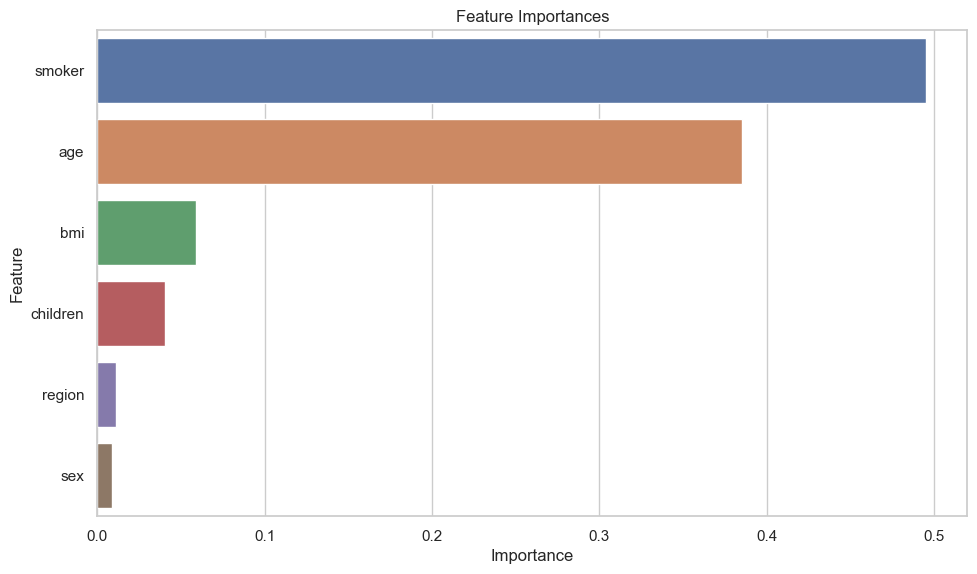

    Feature  Importance
4    smoker    0.495307
0       age    0.385503
2       bmi    0.058942
3  children    0.040234
5    region    0.011076
1       sex    0.008938


In [136]:
# Get feature importances again for this new optimised model 
#same order as done before in the feature engineering using decision tree regressor, but now for the gradient boost regressor,
# the percentages are slightly different

importances = model.feature_importances_

# Create a dataframe
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

print(feature_importances)


#  The results show smoker as the most important in predicting the log_charges (~50.0% importance)
# Age is next most important (~38.6%)
# Then Bmi(~5.9%), children (~4.0%), region(~1.1%), then least important is sex (~0.9%)

In [137]:
# Make predictions
y_pred = model.predict(X_test)

In [138]:
# Calculate MAE, MSE, RMSE, R2
mae = mean_absolute_error(Y_test, y_pred)
mse_GB = mean_squared_error(Y_test, y_pred)
rmse = sqrt(mse_GB)    
r2GB = r2_score(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse_GB)
print("RMSE:", rmse)
print("R2 Score:", r2GB)


# now for the training set

y_pred_train = model.predict(X_train)
mse_GBtr = mean_squared_error(Y_train, y_pred_train)
r2GBtr = r2_score(Y_train, y_pred_train)

print("MSE training:", mse_GBtr )
print("R2 Score training:", r2GBtr)

# Good scores 
#Training and test scores  far, overfitting
# the scores shown in image below

MAE: 0.2068275282974355
MSE: 0.1591639761960398
RMSE: 0.3989536015579253
R2 Score: 0.8206952856678319
MSE training: 0.0884970929033801
R2 Score training: 0.8938635016244676


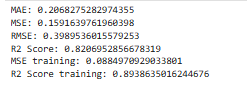

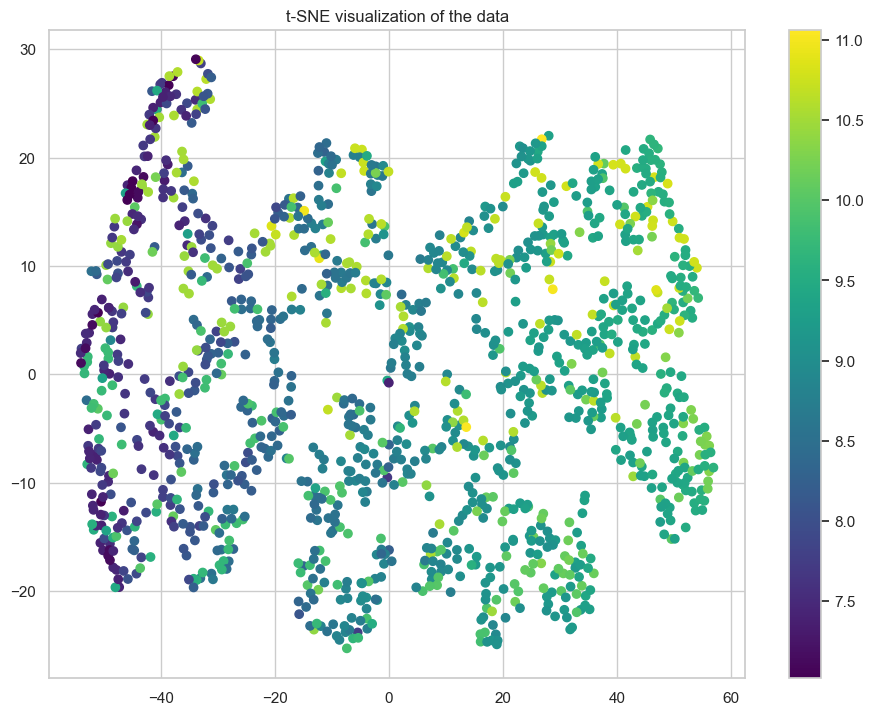

In [139]:
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE visualization of the data')
plt.show()

# There is a distinct distribution of data points, each corresponding to a sample in the dataset (tumpanjawat, 2023)
# the color coded nature reflects the different log_charges value ranges. Each colour represents a range
#  There are clear clusters of data points, proposing the idea that there are groups of samples in the dataset with similar behaviours
# The clusters could mean differing log_charges values patterns, which our model can gain insights from

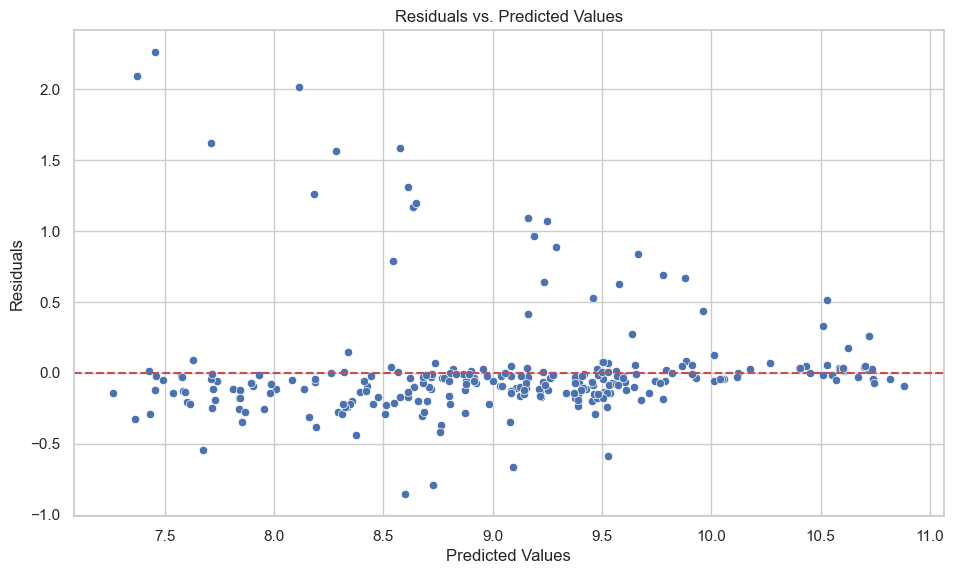

In [140]:
# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# SLIGHTLY random pattern of dispersion of the residuals around the horizontal y=0 axis indicate SLIGHLTY random errors - no strong trends in the residuals
# This is good, model is using the data well
# However, if we are bing critical, the residuals exhibit a slight linear pattern, as predicted values rise, SOME of the residuals rise as well. 
# this is because many residuals are below residual=0 line at the start, then as predicted value rises, there are less points below the line
# This is bad, model me be experiencing heteroscedasticity. WHich means the variability of the error changes across different predicted values 
# Also, the residuals overall are mainly focused below the residual=0 line, which means not completely random behaviour
# All this means there may be a better model to use, but overall the model is doing a good job. No strong patterns in the residuals

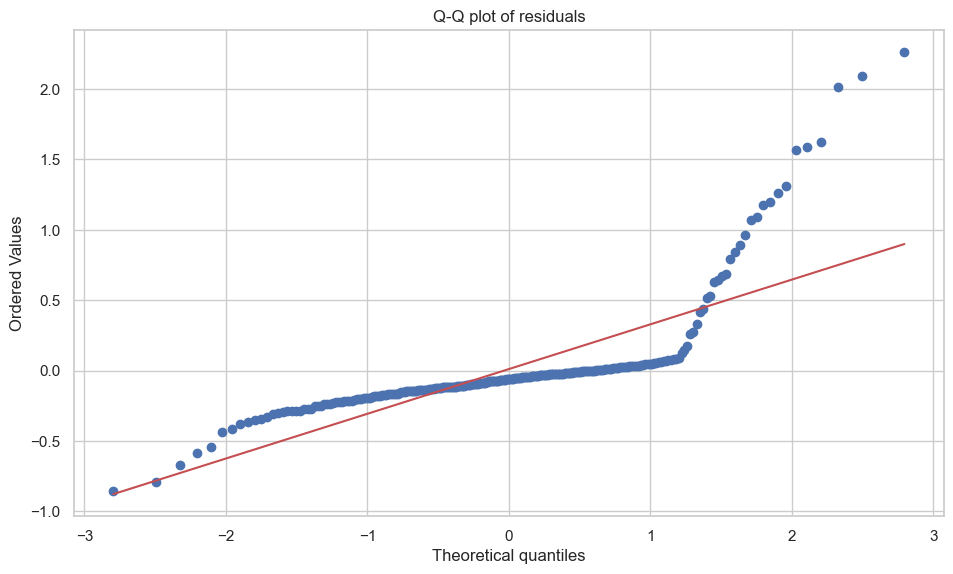

In [141]:
# Q-Q plot of residuals
plt.figure(figsize=(10, 6))
probplot(residuals, plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

# This plot can show if a dataset shows a specific theoretical distribution, for example to check if residuals are normaly distributed
# X-axis shows the quantiles from the normal distribution
# y-axis are ordered values, or the quantiles of the residuals
# if perfectly normal residuals, the points in the plot below should be a straight line
# In reality, they follow an ALMOST straight line, especially in the centre of the distribution
# So the residuals are nearly normally distributed, which is good
# However, the ends of the distribution are not perfectly following the straight line pattern (as you can see below -1.5 and above +1.25), which is a bad sign
# May mean that there are outliers/extreme residual values
# Means OVERALL good performance, but there may be a better model

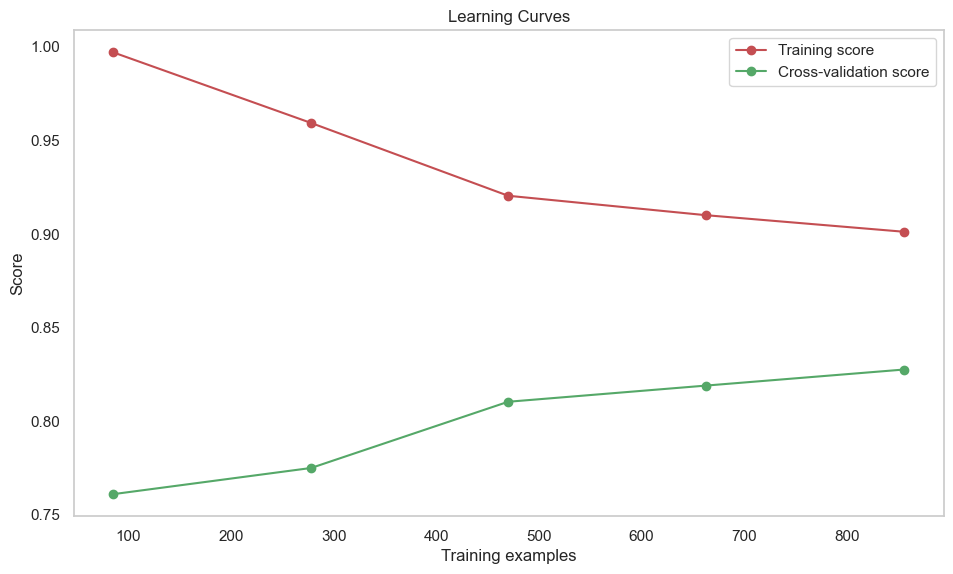

In [142]:
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# At small amount of training examples, training score is high because model finds it easier to fit to a smaller amoutn of data
# As we increase training example amount, the score decreases gradually until it almost stabilises because model finds it harder to fit to a larger amoutn of data
# The validation curve starts at a lower score because the model has not learned enough information, so it generalises bad on unseen data
# validation set score improves as more data is fed to the model 
# (tumpanjawat, 2023) mentioned that if the scores become parallel/converge, this means that there is no overfitting/underfitting
# For my plot, they are not parallel.  My plots therefore show overfitting.(tumpanjawat, 2023) had parallel plots
#My model and (tumpanjawat, 2023)'s model perform differently because I normalised my target variable, they did not
# There is a gap between the two scores 

**Final result analysis for gradient boosting:**

* Robust performance (because can perform well under cross validation using different sets)
*  R2 Score: 0.82, model can explain 82% of the variance in the medical charges
*  RMSE: 0.399, mean on average, the model's predictions are 0.399 units away from the actual log_charges values
*  Smoking by far most important feature - due to the infamous health problems it causes
*  BMI second, as it usually can show us an individual's health and so correlates with charges
*  Age third, older people have higher risks to their health incuring more costs
*  A neural network or random forrest algorithm could improve results

## Model 6: Gradient boost algorithm XGB Regressor

A very efficent gradient boosting algorithm that uses advanced techniques like regularisation and parallel processing to improve performance and prevent overfitting (‘ML | XGBoost (eXtreme Gradient Boosting)’, 2019).

Decision trees and ensembles are tree based and are not sensitive to the variance in our feature data, so no need to scale them (Thenraj, 2020).

Justification: This model was tested because it provides a highly optimised gradient boosting technique that may improbve the scores.

In [143]:
# Inspired by (touba7, 2022)

XGB_model = XGBRegressor(max_depth=10)
start_timeXGB = time.time()
XGB_model.fit(X_train, Y_train)  # fit the model
end_timeXGB = time.time()
training_timeXGB = end_timeXGB - start_timeXGB
print(f"Training Time: {training_timeXGB:.2f} seconds")
y_pred = XGB_model.predict(X_test)  # make predictions
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(Y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(Y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

# good values of MAE, MSE and RMSE
# MAE =0.232. The model's predictions are on average wrong by 0.232 units only
# MSE = 0.198. The average squared difference (i.e. error) between the predicted and actual values is 0.198 only
# RMSE = 0.445. The model's predictions on average are wrong by 0.445 units 
# Note these values may change when you run them on your computer


Training Time: 0.12 seconds


Metrics
MAE_XGB  0.232434
MSE_XGB  0.197829
RMSE_XGB 0.444780

In [144]:
# Inspired by (touba7, 2022)

scores = cross_val_score(XGB_model, X_train, Y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

r2_score(Y_test, XGB_model.predict(X_test))

# An average R² of around 0.78 means that, on average,the model explains 78% of the variance in log_charges
# similar result when directly getting r^score on the test set . good score, model generalises well on useen data

[0.81240476 0.66707953 0.83478505 0.77868453 0.79287674]
0.7771661229142565


0.7771375608256934

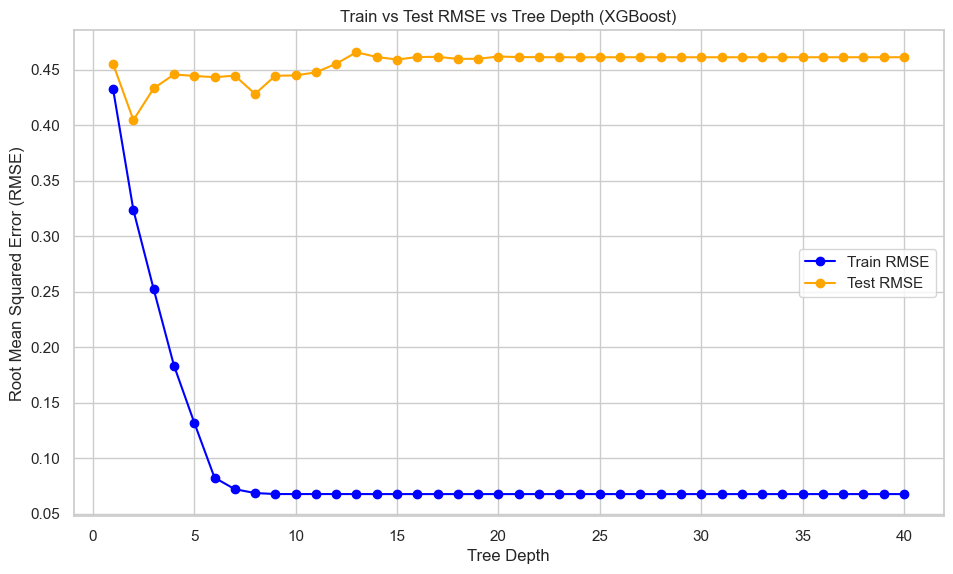

In [145]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store RMSE values
train_rmse_list = []
test_rmse_list = []
depths = range(1, 41)  # Test max_depth values from 1 to 15

# Iterate over different tree depths
for depth in depths:
    XGB_model = XGBRegressor(max_depth=depth)
    # Start timer

    XGB_model.fit(X_train, Y_train)
    
    # Predictions on training and test data
    y_train_pred = XGB_model.predict(X_train)
    y_test_pred = XGB_model.predict(X_test)
    
    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    
    # Append RMSE to lists
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.plot(depths, train_rmse_list, label='Train RMSE', color='blue', marker='o')
plt.plot(depths, test_rmse_list, label='Test RMSE', color='orange', marker='o')
plt.title("Train vs Test RMSE vs Tree Depth (XGBoost)")
plt.xlabel("Tree Depth")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend()
plt.grid(True)
plt.show()

# This graph shows overfitting. the test and train losses both decrease, until tree deoth = 2, where test losses start rising. this is the overfitting point
# Therefore, for the model to work best, pick a max depth of 2
# However both losses at the end are still decent - testing RMSE = ~0.41 and training RMSE = ~0.075. 


**Interesting task**

Let use see if using max depth =2, which is the overfitting point, to see if this improves results. Theoretically, it should.

In [146]:
# Inspired by (touba7, 2022)


XGB_model =XGBRegressor(max_depth = 2)

# Record start time
start_timeGB = time.time()
XGB_model.fit(X_train, Y_train)
# Record end time after training
end_timeGB = time.time()
# Calculate the time taken for training (in seconds)
training_timeGB = end_timeGB - start_timeGB
print(f"Training Time: {training_timeGB:.2f} seconds")


y_pred_TEST = XGB_model.predict(X_test)
y_pred_TEST = pd.DataFrame(y_pred_TEST)
y_pred_TRAIN = XGB_model.predict(X_train)  # Now I will add some train metric as well, because I will use these at the end of the notebook for the model evaluation section
y_pred_TRAIN = pd.DataFrame(y_pred_TRAIN)

MAE_XGB_TEST= metrics.mean_absolute_error(Y_test, y_pred_TEST)
MSE_XGB_TEST = metrics.mean_squared_error(Y_test, y_pred_TEST)
RMSE_XGB_TEST =np.sqrt(MSE_XGB)

MAE_XGB_TRAIN= metrics.mean_absolute_error(Y_train, y_pred_TRAIN)
MSE_XGB_TRAIN = metrics.mean_squared_error(Y_train, y_pred_TRAIN)
RMSE_XGB_TRAIN =np.sqrt(MSE_XGB_TRAIN)

pd.DataFrame([MAE_XGB_TEST, MSE_XGB_TEST, RMSE_XGB_TEST, MAE_XGB_TRAIN, MSE_XGB_TRAIN, RMSE_XGB_TRAIN], index=['MAE_XGB_test', 'MSE_XGB_test', 'RMSE_XGB_test', 'MAE_XGB_train', 'MSE_XGB_train', 'RMSE_XGB_train'], columns=['Metrics'])

# Good - all results have improved even the execution time

Training Time: 0.04 seconds


Metrics
MAE_XGB_test   0.220454
MSE_XGB_test   0.163677
RMSE_XGB_test  0.444780
MAE_XGB_train  0.179507
MSE_XGB_train  0.104657
RMSE_XGB_train 0.323507

In [147]:
# Inspired by (touba7, 2022)
# I did cross validation for my initial model, so I will do it again here so that I can compare the performance and see if using maxdepth=2 improved results


scores = cross_val_score(XGB_model, X_train, Y_train, cv=5, scoring='r2')
print(scores)
print("mean cross validation r2: ", np.mean(scores))

r2_test_GB = r2_score(Y_test, XGB_model.predict(X_test))
r2_train_GB = r2_score(Y_train, XGB_model.predict(X_train))

print("r2 test: ", r2_test_GB)
print("r2 train: ", r2_train_GB)

# Good - all results have improved
# An average R² of around 0.82 means that, on average,the model explains 82% of the variance in log_charges
# similar result when directly getting r^score on the test set. good scores, model generalises well on unseen data

[0.86461391 0.69076172 0.87804149 0.81281539 0.84178291]
mean cross validation r2:  0.8176030831198668
r2 test:  0.8156113687601956
r2 train:  0.8744828720694264


In [148]:
# let us try to optmise it using random search, not gird search for reasons I highlighted before

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=seed)

# Define the ranges for hyperparameters
param_distributions = {
    'n_estimators': np.arange(100, 501, 50),
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_depth': np.arange(3, 11),
    'min_child_weight': np.linspace(1, 10, 10),
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=seed
)

# Fit RandomizedSearchCV
random_search.fit(X_train, Y_train)

# Extract the best model and hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best MSE from Cross-Validation: {best_score:.4f}")

# Predict on Test and Train Sets
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Metrics
MSE_XGB_TEST = mean_squared_error(Y_test, y_test_pred)
MSE_XGB_TRAIN = mean_squared_error(Y_train, y_train_pred)
RMSE_XGB_TEST = np.sqrt(MSE_XGB_TEST)
RMSE_XGB_TRAIN = np.sqrt(MSE_XGB_TRAIN)
r2_test_GB = r2_score(Y_test, y_test_pred)
r2_train_GB = r2_score(Y_train, y_train_pred)

# Print Results
print(f"Training MSE: {MSE_XGB_TRAIN:.4f}, RMSE: {RMSE_XGB_TRAIN:.4f}, R²: {r2_train_GB:.4f}")
print(f"Test MSE: {MSE_XGB_TEST:.4f}, RMSE: {RMSE_XGB_TEST:.4f}, R²: {r2_test_GB:.4f}")

# lower train scores, but better Test scores which is more important. this is a better model

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 300, 'min_child_weight': 6.0, 'max_depth': 3, 'learning_rate': 0.02}
Best MSE from Cross-Validation: 0.1415
Training MSE: 0.1130, RMSE: 0.3362, R²: 0.8645
Test MSE: 0.1572, RMSE: 0.3965, R²: 0.8229


## Model 7: decision trees 

Not distance  Decision trees

Decision trees and ensembles are tree based and are not sensitive to the variance in our feature data, so no need to scale them (Thenraj, 2020). But to demonstrate my point, I performed a t-test below to compare.

Justification: this model was tested because it models complex, non-linear relationships and provides a more explainable form compared to ensembles.

In [149]:
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize scaler
scaler = StandardScaler()

# Store RMSE values for cross-validation
rmse_scores = {
    "Unscaled": [],
    "Scaled": []
}

# Perform cross-validation on unscaled data
tree_reg_model = DecisionTreeRegressor(max_depth=4)  # Adjust max_depth as needed

# Cross-validation for unscaled data
cv_scores_unscaled = cross_val_score(tree_reg_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_unscaled = np.sqrt(-cv_scores_unscaled)  # Convert MSE to RMSE
rmse_scores["Unscaled"] = rmse_cv_unscaled

# Output results for unscaled data
print(f"Unscaled - CV Mean RMSE: {np.mean(rmse_cv_unscaled):.9f}, Std Dev: {np.std(rmse_cv_unscaled):.9f}")

# Scale the data using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validation for scaled data
cv_scores_scaled = cross_val_score(tree_reg_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scaled = np.sqrt(-cv_scores_scaled)  # Convert MSE to RMSE
rmse_scores["Scaled"] = rmse_cv_scaled

# Output results for scaled data
print(f"Scaled - CV Mean RMSE: {np.mean(rmse_cv_scaled):.9f}, Std Dev: {np.std(rmse_cv_scaled):.9f}")

# Perform t-test to compare the RMSE between unscaled and scaled data
t_stat, p_value = ttest_ind(rmse_scores["Unscaled"], rmse_scores["Scaled"])
print(f"\nT-Test between Unscaled and Scaled Data: t-statistic = {t_stat:.9f}, p-value = {p_value:.9f}")


Unscaled - CV Mean RMSE: 0.390784665, Std Dev: 0.062295618
Scaled - CV Mean RMSE: 0.390784665, Std Dev: 0.062295618

T-Test between Unscaled and Scaled Data: t-statistic = 0.000000000, p-value = 1.000000000


For this test:

1) Null and alternative hypotheses of the test.
* Null Hypothesis (H0): There is no significant difference in the Root Mean Squared Error (RMSE) between the scaled and non-scaled models. 
* Alternative Hypothesis (H1): There is a significant difference in the averages of the Mean Squared Error (RMSE) between the scaled and non-scaled models.

2) State the significance level and the test statistic of the test.
*Significance Level (α) is: 0.05 (5%) unless otherwise specified. This means I am willing to accept a 5% window of incorrectly rejecting the null hypothesis.
*The test statistic calculated from the t-test is: t = 0.0

3) State the p-value and the decision rule of the test.
* p-value: 1.0
* Decision rule: If the p-value is less than the significance level (α), I will reject the null hypothesis. In this case it is not less than 0.05, so
I will not reject the null hypothesis. There is no significant difference in the  Root Mean Squared Error (RMSE) between the scaled and non-scaled models. 
4) State the conclusion and the interpretation of the test.
* Conclusion: There isn't sufficient evidence that suggests that there is significant difference in the average MSE between the scaled and non-scaled linear regression models.
* Interpretation: Scaling the features did not lead to any improvement in model performance, as shown by the identical MSE scores and the high p-value. Therefore, in this case, the scaling does not improve the predictions of the linear regression model for this dataset.

In [150]:
# Inspired by (touba7, 2022)


tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train, Y_train)

y_pred = tree_reg_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(Y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(Y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])


# MAE =0.249. The model's predictions are on average wrong by 0.249 units 
# MSE = 0.290 The average squared difference (i.e. error) between the predicted and actual values is 0.290 
# RMSE = 0.538 The model's predictions on average are wrong by 0.538 units 

Metrics
MAE_tree_reg  0.251676
MSE_tree_reg  0.298070
RMSE_tree_reg 0.545958

In [151]:
# Inspired by (touba7, 2022)


scores = cross_val_score(tree_reg_model, X_train, Y_train, cv=5)
print(scores)
print(np.mean(scores))

r2_score(Y_test, tree_reg_model.predict(X_test))

# An average R² of around 0.663 means that, on average,the model explains 66.3% of the variance in log_charges. bad performance
# Better result when directly getting r^score on the test set. Decent score, model generalises decently on useen data, but worse than XGB

[0.74290688 0.57467691 0.62064657 0.68925029 0.70419257]
0.6663346446143285


0.6642115710585541

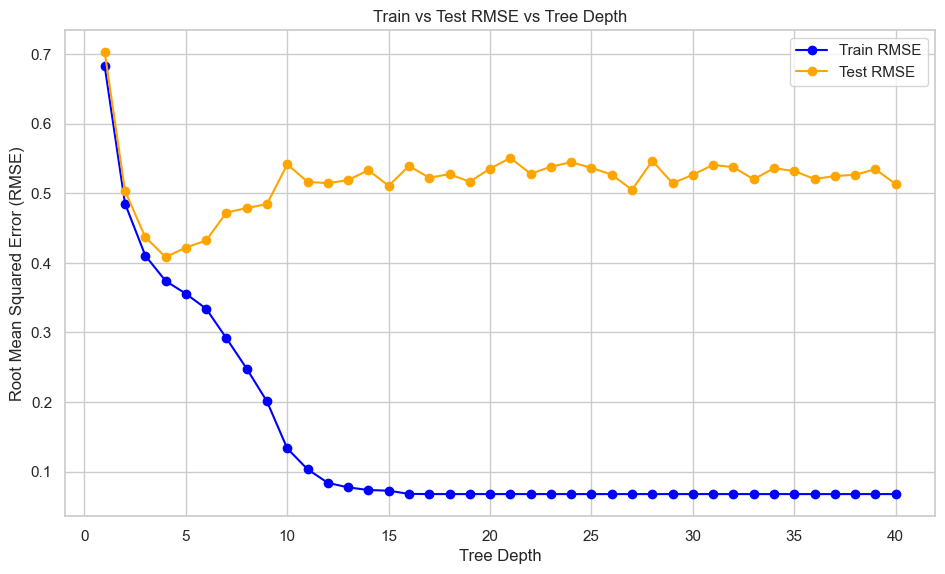

In [152]:


# Initialize lists to store RMSE values
train_rmse_list = []
test_rmse_list = []
depths = range(1, 41)  # Test max_depth values from 1 to 40

# Iterate over different tree depths
for depth in depths:
    tree_reg_model = DecisionTreeRegressor(max_depth=depth)
    tree_reg_model.fit(X_train, Y_train)
    
    # Predictions on training and test data
    y_train_pred = tree_reg_model.predict(X_train)
    y_test_pred = tree_reg_model.predict(X_test)
    
    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    
    # Append RMSE to lists
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.plot(depths, train_rmse_list, label='Train RMSE', color='blue', marker='o')
plt.plot(depths, test_rmse_list, label='Test RMSE', color='orange', marker='o')
plt.title("Train vs Test RMSE vs Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend()
plt.grid(True)
plt.show()

# This graph shows overfitting. the test and train losses both decrease, until tree depth = 4, where test losses start rising. this is the overfitting point
# Therefore, for the model to work best, pick a max depth of 4
# However both losses at the end are still decent - testing RMSE = ~0.49 and training RMSE = ~0.075. 


**Interesting task**  
Let use see if using max depth =2, which is the overfitting point, to see if this improves results. Theoretically, it should.

In [153]:

tree_reg_model =DecisionTreeRegressor(max_depth = 4)
# Record start time
start_timeDT = time.time()
tree_reg_model.fit(X_train, Y_train)
end_timeDT = time.time()

# Calculate the time taken for training (in seconds)
training_timeDT = end_timeDT - start_timeDT
print(f"Training Time: {training_timeDT:.2f} seconds")

# Inspired by (touba7, 2022)
y_pred_TEST = tree_reg_model.predict(X_test)
y_pred_TEST = pd.DataFrame(y_pred_TEST)
y_pred_TRAIN = tree_reg_model.predict(X_train)
y_pred_TRAIN = pd.DataFrame(y_pred_TRAIN)

MAE_DT_TEST= metrics.mean_absolute_error(Y_test, y_pred_TEST)
MSE_DT_TEST = metrics.mean_squared_error(Y_test, y_pred_TEST)
RMSE_DT_TEST =np.sqrt(MSE_DT_TEST)

MAE_DT_TRAIN= metrics.mean_absolute_error(Y_train, y_pred_TRAIN)
MSE_DT_TRAIN = metrics.mean_squared_error(Y_train, y_pred_TRAIN)
RMSE_DT_TRAIN =np.sqrt(MSE_DT_TRAIN)

pd.DataFrame([MAE_DT_TEST, MSE_DT_TEST, RMSE_DT_TEST, MAE_DT_TRAIN, MSE_DT_TRAIN, RMSE_DT_TRAIN], index=['MAE_DT_test', 'MSE_DT_test', 'RMSE_DT_test', 'MAE_DT_train', 'MSE_DT_train', 'RMSE_DT_train'], columns=['Metrics'])


# Overall, better scores now that we reduced overfitting

Training Time: 0.00 seconds


Metrics
MAE_DT_test   0.238785
MSE_DT_test   0.166638
RMSE_DT_test  0.408213
MAE_DT_train  0.211047
MSE_DT_train  0.139862
RMSE_DT_train 0.373981

In [154]:
# Inspired by (touba7, 2022)


scores = cross_val_score(tree_reg_model, X_train, Y_train, cv=5)
print(scores)
print("Mean r2 score from cross validation: ", np.mean(scores))


r2_test_DT = r2_score(Y_test, tree_reg_model.predict(X_test))
r2_train_DT = r2_score(Y_train, tree_reg_model.predict(X_train))

print("r2 test: ", r2_test_DT)
print("r2 train: ", r2_train_DT)


# Overall, much better scores
# An average R² of around 0.81 means that, on average,the model explains 81% of the variance in log_charges. Hige increase from before!
# slightly Better result when directly getting r^score on the test set (81.2%). model generalises decently on useen data

[0.86014095 0.6796341  0.86575108 0.82924023 0.81871193]
Mean r2 score from cross validation:  0.8106956573775346
r2 test:  0.8122760114442368
r2 train:  0.8322607408505625


In [155]:
# can i optmise hyperparameters? used randomsearch and not grid search for same reason as before

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'max_depth': randint(3, 20),           # Random integer values between 3 and 20 for max_depth
    'min_samples_split': randint(2, 20),    # Random integer values between 2 and 20 for min_samples_split
    'min_samples_leaf': randint(1, 20),     # Random integer values between 1 and 20 for min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2', None],  # Choice of features for the splits
}

# Initialize the Decision Tree Regressor
tree_reg_model = DecisionTreeRegressor(random_state=seed)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tree_reg_model,
    param_distributions=param_dist,
    n_iter=50,             # Number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    verbose=2,             # Display progress
    random_state=seed,       # For reproducibility
    n_jobs=-1              # Use all available processors
)

# Fit the model using RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, Y_train)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict on the test data using the optimized model
y_pred = best_model.predict(X_test)

# Calculate metrics for the test data
MAE_tree_reg = mean_absolute_error(Y_test, y_pred)
MSE_tree_reg = mean_squared_error(Y_test, y_pred)
RMSE_tree_reg = np.sqrt(MSE_tree_reg)
r2_test_reg = r2_score(Y_test, y_pred)

# Calculate metrics for the training data
y_train_pred = best_model.predict(X_train)
MAE_train = mean_absolute_error(Y_train, y_train_pred)
MSE_train = mean_squared_error(Y_train, y_train_pred)
RMSE_train = np.sqrt(MSE_train)
r2_train_reg = r2_score(Y_train, y_train_pred)
print()
# Print metrics
metrics_df = pd.DataFrame({
    'Train MAE': [MAE_train],
    'Train MSE': [MSE_train],
    'Train RMSE': [RMSE_train],
    'Train R-squared': [r2_train_reg],
    'Test MAE': [MAE_tree_reg],
    'Test MSE': [MSE_tree_reg],
    'Test RMSE': [RMSE_tree_reg],
    'Test R-squared': [r2_test_reg]
})

print(metrics_df)

# only improved the train results, the test results got slighlty worse! so will just use the previous model becuase test results are more important.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 18}

   Train MAE  Train MSE  Train RMSE  Train R-squared  Test MAE  Test MSE  \
0   0.190947   0.119553    0.345765         0.856617  0.223797  0.167457   

   Test RMSE  Test R-squared  
0   0.409215        0.811353  


## Model 8: Multi Layer Perceptron (MLP) Feedforward Neural Network

This is a type of artificial neural network made up of multiple layers of neurons. Each neuron is connected to every neuron in the next layer. It is feedforward, moves only in one direction; forwards. No backpropagation.

Justification: This model was tested because it captures highly non-linear relationships and interactions and is flexible due to it being a neural network.

The inspiration of this section was from (niteshyadav3103, 2021). But he used unscaled feature values. I disagree, I think scaling is better. And then I did additional research and found out that other people like (for, 2020) also agree with me.

In [162]:
# lets compare minmax vs standardscaler first

# Define MinMaxScaler
scaler_minmax = MinMaxScaler()

# Scale data using MinMaxScaler
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Compile the model (same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['mae'])

# Fit the model with StandardScaler-scaled data

model_history_standard = model.fit(X_train_scaled, Y_train, epochs=500, verbose=0)

# Evaluate the model on test data
mae_standard = model.evaluate(X_test_scaled, Y_test, verbose=0)[1]
print(f"Test MAE (StandardScaler): {mae_standard:.4f}")

# Reinitialize the model for MinMaxScaler data
model_minmax = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_minmax.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['mae'])

# Fit the model with MinMaxScaler-scaled data

model_history_minmax = model_minmax.fit(X_train_minmax, Y_train, epochs=500, verbose=0)

# Evaluate the model on test data
mae_minmax = model_minmax.evaluate(X_test_minmax, Y_test, verbose=0)[1]
print(f"Test MAE (MinMaxScaler): {mae_minmax:.4f}")

# Perform a t-test to compare MAE scores
scores_standard = model_history_standard.history['mae'][-10:]  # Last 10 epochs
scores_minmax = model_history_minmax.history['mae'][-10:]  # Last 10 epochs

t_stat, p_value = ttest_ind(scores_standard, scores_minmax, equal_var=False)

print("\nT-Test Results:")
print(f"T-Statistic: {t_stat:.9f}")
print(f"P-Value: {p_value:.9f}")

# Interpret results
if p_value < 0.05:
    print("There is a significant difference between StandardScaler and MinMaxScaler.")
else:
    print("There is no significant difference between StandardScaler and MinMaxScaler.")

# p =   0.000000000, therefore there is a singificant improvement when using standardisation
# my results are included in the image below for reference in case they change

Test MAE (StandardScaler): 0.1578
Test MAE (MinMaxScaler): 0.1626

T-Test Results:
T-Statistic: -76.999310504
P-Value: 0.000000000
There is a significant difference between StandardScaler and MinMaxScaler.


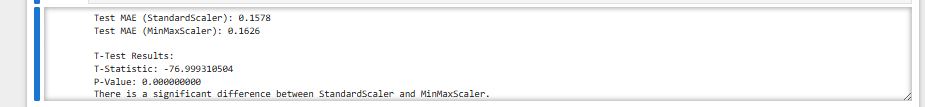

**Now RSQ5 has been answered:**

**Do the different types of normalisations provide better results for each of these models, i.e which is better – normalisation or standardisation?**

The answer is for linear regreson - insignificant difference, polynomial regression-insignificant difference, gradient descent- significant improvement by using minmax, MLP - significant improvement by using standardisation

In [163]:
# creating a model using the Sequential API. 
# we can see 6 layers below
# this is feedforward network
# relu activation used because its computatinally efficient and helps fix the vanishing gradient problem 
# adam optmiser used because of its adaptability, and means I do not need to do extensive manual hyperparameter tuning


model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),  #RELU function, which model non linear relationships well (inspired by Haixia Liu email, 2024)
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model

model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), metrics = ['mae']) # using adam optimiser to optmise hyperparameter


# fit the model
start_timeMLP = time.time()


model_history = model.fit(X_train_scaled, Y_train, epochs = 500)

# Fit the model
end_timeMLP = time.time()

# Calculate the time taken for training (in seconds)
training_timeMLP = end_timeMLP - start_timeMLP
print(f"Training Time: {training_timeMLP:.2f} seconds")

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.2129 - mae: 9.2129
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1695 - mae: 9.1695
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1371 - mae: 9.1371
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1430 - mae: 9.1430
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0840 - mae: 9.0840
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0355 - mae: 9.0355
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9678 - mae: 8.9678
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9999 - mae: 8.9999
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9816 - mae: 8.9816
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9185 - mae: 8.9185
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8579 - mae: 8.8579
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8337 - mae: 8.8337
Epoch 13/500
34/34 ━━━━━━━━━━━━━━━━━━

In [164]:
model.evaluate(X_test_scaled, Y_test)

# good mae scores

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1528 - mae: 0.1528 


[0.1711909919977188, 0.1711909919977188]

In [165]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 300)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,265 (883.85 KB)

 Trainable params: 75,421 (294.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 150,844 (589.24 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training R²: 0.840400088585211
Test R²: 0.8083729844309061
Training MSE: 0.1330751287636398
Test MSE: 0.1701021518489185


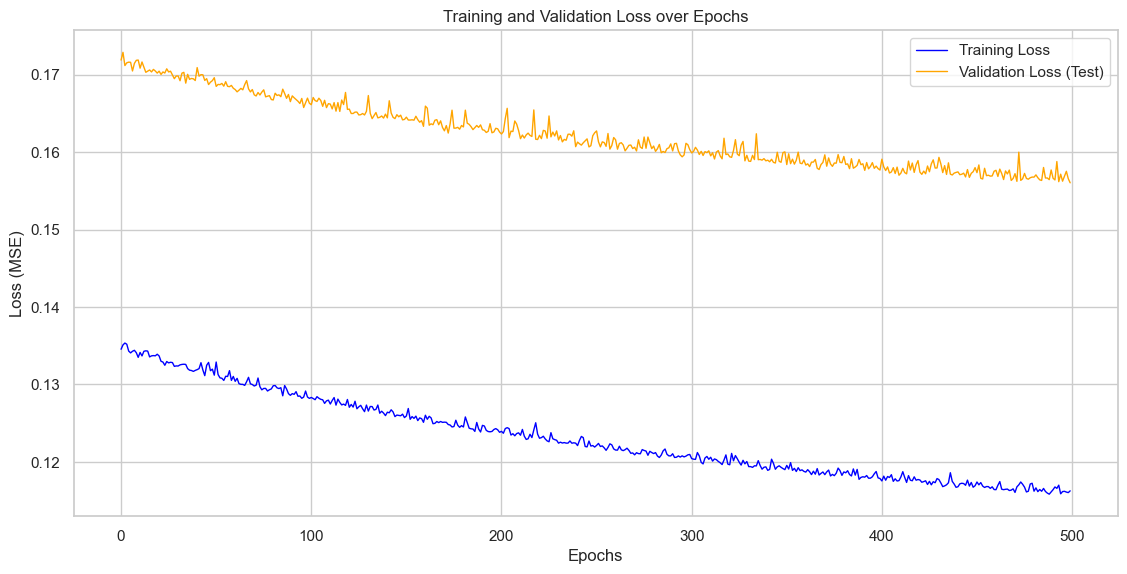

In [166]:
# Calculate R² score for the training and test sets
import time

# Fit the model
model_history = model.fit(X_train_scaled, Y_train, epochs=500, validation_data=(X_test_scaled, Y_test), verbose=0)

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_r2 = r2_score(Y_train, train_predictions)
test_r2 = r2_score(Y_test, test_predictions)


print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")

train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plot the training and validation loss over time
plt.figure(figsize=(12, 6))

# Plot training loss
plt.plot(model_history.history['loss'], label='Training Loss', color='blue', linewidth=1)

# Plot validation loss (test loss)
plt.plot(model_history.history['val_loss'], label='Validation Loss (Test)', color='orange', linewidth=1)

plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()



#  Good performance on both sets. but overfitting a litle bit isnce traiing is better than  test scores
# Note the line is zigzagging/fluctuating, which is not a big problem
# I already tried to fix this by increasing the learning rate (the learning rate that  (niteshyadav3103, 2021) used was = 0.01, I changed it to lr=0.00001)
# this reduced the fluctuating a lot already. I do not want to reduce it further as it may make the scores worse,as shown in cell below
# Therefore to answer RSQ2, yes there is a considerable improvement in the TRAINING scores from linear regression when using a nerual netowrk MLP, but not in the TESTING scores


**Note:**

Adam optimiser will dynaomically optimise the hyperparameter learning rate for me rather than me doing hyperparameter optimisation myself. But why is  the lines zigzagging? Can I see if raising learning rate makes model faster and makes line smoother? 

The lines below are smoother, but scores significanlty worse. Model step size is too fast.

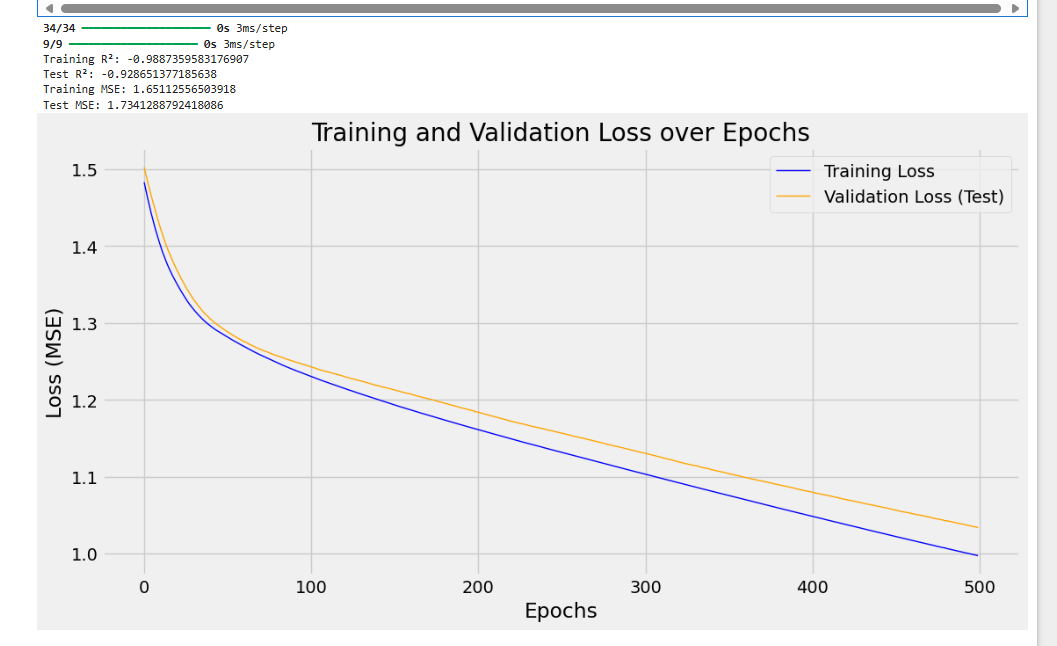
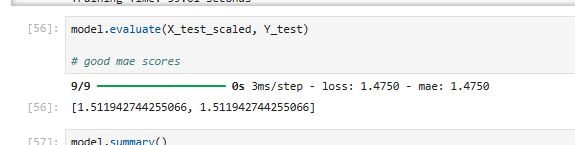

**Answering RSQ2**: 

**Will there be a considerable difference in performance between a traditional regression models such as linear regression and more advanced machine learning models (e.g., MLP) for predicting medical insurance costs?**


**Further work(tumpanjawat, 2023)**:


* Add more internal features to the patients, such as exercise hours per week
* Add more external features to the patients, such as the healthcare availability/quality of the area the person is staying at and socioeconomic factors 
* Apply project to other purposes in healthcare such as to predict disease


# <span style="color:red">Summary of Regression Model Training (below 500 words) </span>

---

### <span style="color:red">Goals:</span>
1. **Train models that are able to predict medical charges based on 6 features.**
2. **Make sure to note down the training times of each algorithm**
3. **Optimise the hyperparameters when training the models**
---

### <span style="color:red">Findings Summarised:</span>
1. Training the models was quick across the board, with the only exception being the MLP which took relatively long.
2. Optimising hyperparameters using randomised search and NOT grid search was more suitable for my models

---

### <span style="color:red">Ethics:</span>


1. **Environmental Impact**:  
   - Anyone working with AI should consider the environmental impact.  
   - For instance, Google reported a **48% rise in greenhouse gas emissions** due to data consumption (Kerr, 2024).  
   - Even though this relates to generative AI, the concern extends to all large-scale training.  
   - **Thankfully**, our project consumed **minimal energy** due to the small dataset size and relatively simple models.  
   - On the other hand, the **music dataset** may be more concerning as it is larger.
2. **Data quality**:
   - The data the models are trained on must be labelled correctly, cleaned correctly, and unbiased. My data satisfies all these requirements (‘Data Ethics in AI: 6 Key Principles for Responsible Machine Learning’, 2024).
---

### <span style="color:red">Reflections:</span>
- Training the model was very enjoyable overall because the data cleaning was done, and the more exciting part of **training models** began.  
- At first, since this module was my **introduction to machine learning**, I struggled to choose which models to use. It seemed like there were infinite choices!  
- With help from **Kaggle**, I was able to better understand the content and choose appropriate regression models.  
- I tried to balance **exploration** and **exploitation** in my model training, which was easier due to my prior knowledge from the **Search and Optimisation** task.  
- Now I can better understand the **different regression models** and their hyperparameters, which is invaluable for my personal development and will undoubtedly help in future job applications.

# 11. Model evaluation 

I now have nearly all the data I need to compare all these models and then pick a best one. However, I still have one more thing I need to asses. And that is the 'Explainability'. This is necessary to ensure the stakeholders, such as medical insurance companies, who may not have technical experience in computer science, can still understand my findings. 

I will look at explanability in terms of 4 aspects of XAI (explainable AI). These are (‘Explainable artificial intelligence’, 2020):
1) Interpretability (Can the model be comprehended and is the decision making understandable?)
2) Simulatability (Can you , as a human, reproduce the predicitions?)
3) Decompasability (Can you explain and understand the parameters?)
4) Algorthmic transparency (Can you explain how the model actually works?)

Here is the ranking based on explainability of the seven algorithms tested (Barredo Arrieta et al., 2020):

1) Linear regression
* Good in all the 4 aspects of XAI shown above. Presence of coefficients means more explainability. It can be less explainable if it is a large model, but ours is small, so it is explainable.
2) Polynomial Regression
* Decent in all the 4 aspects of XAI shown above. Presence of coefficients means more explainability. It can be less explainable if it has high order degree, but ours is small (degree =2), so it is explainable.
3) Gradient descent linear regression
* This is a bit more complex than linear regression, but the presence of coefficents makes this not too difficult to explain. Overall, this is still decent in all 4 aspects of XAI. 
4) Decision trees
*  Decent in all the 4 aspects of XAI shown above. High depth can be less explainable, but we used max depth = 4, not bad and can be explained, but more complex than the previous two.
5) Random Forrest Regressor
* Difficult to interpret. No simulatability, decompasability, and transparency. Ensemble using multiple trees makes it much harder than understanding just one tree.
6) Gradient Boosting
*  Difficult to interpret. No simulatability, decompasability, and transparency. Ensemble using multiple trees makes it much harder than understanding just one tree. Sequential nature of it, where it corrects the errors with every new tree, adds complexity.
7) XGB Regressor
* This is an improved gradient boosting algorithm. Meaning, it is even less explainable in all 4 aspects (Sandeep S. Sandhu, 2017).
8) MLP
* Bad in all 4 aspects. Presence of multiple layers, activation functions, and Adam optimiser in my model makes it the most complex.


In [167]:
# lets put all the comparisons on one table

import pandas as pd



explainability_1 = "No.1 best"
explainability_2 = "No.2 best"
explainability_3 = "No.5 best"
explainability_4 = "No.3 best"
explainability_5 = "No.6 best"
explainability_6 = "No.7 best"
explainability_7 = "No.4 best"
explainability_8 = "No.8 best"


# Now that I added msetrain and r2train, but the most important aspects are the test scores
model_1 = {'Model': 'Linear Regression', 'r2_train': r2_trainLR,'r2_test': r2_testLR, 'mse_train': mse_trainLR, 'mse_test': mse_testLR, 'explainability': explainability_1, 'speed': training_timeLR}
model_2 = {'Model': 'Polynomial Regression','r2_train': r2_trainPR, 'r2_test': r2_testPR, 'mse_train': mse_trainPR, 'mse_test': mse_testPR, 'explainability': explainability_2, 'speed': training_timePR}
model_3 = {'Model': 'Random Forrest Regressor','r2_train': r2_train_forest, 'r2_test': r2_test_forest, 'mse_train': mse_train_forest, 'mse_test': mse_test_forest, 'explainability': explainability_3, 'speed': training_timeRF}
model_4 = {'Model': 'Gradient descent linear regression','r2_train': r2_trainSGD, 'r2_test': r2_testSGD, 'mse_train': mse_trainSGD, 'mse_test': mse_testSGD, 'explainability': explainability_4, 'speed': training_timeSGD}
model_5 = {'Model': 'Gradient Boost', 'r2_train': r2GBtr,'r2_test':r2GB, 'mse_train':mse_GBtr , 'mse_test': mse_GB , 'explainability': explainability_5, 'speed': training_timeGB}
model_6 = {'Model': 'XGB Regressor','r2_train': r2_train_GB ,'r2_test': r2_test_GB, 'mse_train': MSE_XGB_TRAIN, 'mse_test':MSE_XGB_TEST, 'explainability': explainability_6, 'speed': training_timeXGB}
model_7 = {'Model': 'Decision Trees','r2_train':  r2_train_DT,'r2_test':  r2_test_DT, 'mse_train': MSE_DT_TRAIN, 'mse_test': MSE_DT_TEST, 'explainability': explainability_7, 'speed': training_timeDT}
model_8 = {'Model': 'MLP', 'r2_train': train_r2, 'r2_test': test_r2, 'mse_train': train_mse, 'mse_test': test_mse, 'explainability': explainability_8, 'speed': training_timeMLP}

# Collect all models' data into a list
models_data = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8]

# Convert into a DataFrame
df_results = pd.DataFrame(models_data)

# Display the table
df_results


Model  r2_train  r2_test  mse_train  mse_test  \
0                   Linear Regression  0.751157 0.801496   0.206599  0.178483   
1               Polynomial Regression  0.838393 0.825323   0.134749  0.155056   
2            Random Forrest Regressor  0.874479 0.822272   0.104660  0.157764   
3  Gradient descent linear regression  0.757701 0.760717   0.202030  0.212405   
4                      Gradient Boost  0.893864 0.820695   0.088497  0.159164   
5                       XGB Regressor  0.864464 0.822869   0.113010  0.157234   
6                      Decision Trees  0.832261 0.812276   0.139862  0.166638   
7                                 MLP  0.840400 0.808373   0.133075  0.170102   

  explainability     speed  
0      No.1 best  0.017820  
1      No.2 best  0.001150  
2      No.5 best  0.144058  
3      No.3 best  0.002000  
4      No.6 best  0.039057  
5      No.7 best  0.120426  
6      No.4 best  0.001998  
7      No.8 best 48.321657

**Two models picked:**

Now that I added msetrain and r2train, but the most important aspects are the test scores.

The best test scores are XGBoost and polynomial regression.  
The best train scores are Random Forrest Regressor and Gradient Boost (both bad explainability).


The best model: Polynomial regression. Not only are both its test and train and speed scores good, but most importantly, it also balances this with a very good explainability factor. Suitable for non technical stakeholders and means increase in trust with them.
The second best model: Decision trees. Provides us with interesting eye-catching visualisations. Again, suitable for non technical stakeholders and means increase in trust with them. The scores are also good across the board.

**Now we answered RSQ12**:

**What are the trade-offs between interpretability/explainability to stakeholders and performance when using complex models like neural networks relative to simpler models like linear regression?**

In [168]:
# Now let us train model 1 using cross validation
# (using cv=10 because Haixia coursework guide(Liu, 2024a)says so, but I usually would use cv=5 for this dataset as I explained before)
# but either way, using cv=10 can be useful here as it allows more folds for us to see if the model generalises well
# this model has been optimised already through using degree =2, and by comparing unscaled, standarised, and normalised models with t test, which gave me optimised polynomial model with standardisation, as i said before



# Apply polynomial features
quad = PolynomialFeatures(degree=2)
X_train_quad = quad.fit_transform(X_train_scaled)

# Define the polynomial regression model
poly_regression = LinearRegression()

# Use cross-validation with 5 folds
scores1 = cross_val_score(poly_regression, X_train_quad, Y_train, cv=10)

print(scores1)
print("Mean r2 score from cross validation: ", np.mean(scores1))

# great result. Cross validation is useful because it can show us if a model overfits or if a model generalies well or if it only performs well on a subset of the data
# The specific reeults for each susbets vary, but none of the subset results are bad. It generalises well and the mean r2 score is good

[0.87293901 0.89690067 0.74174807 0.66925553 0.83822415 0.92223859
 0.89982433 0.7421131  0.77667993 0.89534601]
Mean r2 score from cross validation:  0.8255269394284037


In [169]:
# now model 2
# note that ranodmsearch hyperparameter optimisation has already been done for this model



tree_reg_model =DecisionTreeRegressor(max_depth = 4)
scores2 = cross_val_score(tree_reg_model, X_train, Y_train, cv=10)
print(scores2)
print("Mean r2 score from cross validation: ", np.mean(scores2))

# The specific reeults for each susbets vary, but none of the subset results are bad. It generalises well and the mean r2 score is good
# Therefore, since our models perform well using normal testing as well as cross validation testing, we can say that 
# we CAN predict the medical insurance cost with RELATIVELY good performance

[0.84769357 0.8699638  0.7244729  0.6197121  0.82074611 0.91742632
 0.88569118 0.75904305 0.80946345 0.87630994]
Mean r2 score from cross validation:  0.813052240659634


In [170]:
# let us comapre the models

from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(scores1, scores2)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the models.")
else:
    print("There is no statistically significant difference between the models.")

# We fail to reject the null hypothesis. There is no significant difference in the performance of the models.

t-statistic: 0.3153226955868857
p-value: 0.7561430691564982
There is no statistically significant difference between the models.


**This answer RSQ4:**
    
Can we accurately predict the medical insurance costs based on these features?

**Deliver insights**:

I already delivered plenty of insights to stakeholders using EDA, but lets do more explanations for our 2 models, using feature importances.

In [171]:
# Polynomial regression can create more features when it is used, depending on degree used (Amirgiano, 2023)
# it includes new features combining the impact of multiple predictors on the target variable. this code prints out on the left side of the dataframe the indices of the coefficient/feature, then the feature name, then the coeffieint

quad = PolynomialFeatures(degree=2)
x_quad_train = quad.fit_transform(X_train_scaled)  # Apply to scaled training set
x_quad_test = quad.transform(X_test_scaled)  # Apply to scaled test set

# Fit the polynomial regression model
poly_regression = LinearRegression().fit(x_quad_train, Y_train)

# Get the coefficients
coefficients = poly_regression.coef_

# Manually set the original feature names for your features before transformation
original_feature_names = X_train.columns.tolist()  # You must have access to original features

# Get the feature names from the polynomial transformation
feature_names = quad.get_feature_names_out(input_features=original_feature_names)

# Create a DataFrame for feature names and corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficient (importance)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display top features
print(feature_importance[['Feature', 'Abs_Coefficient']].head(10))

# Now, print the evaluation metrics
Y_train_pred = poly_regression.predict(x_quad_train)
Y_test_pred = poly_regression.predict(x_quad_test)

# R-squared scores
r2_trainPR = poly_regression.score(x_quad_train, Y_train)  # R² for training set
r2_testPR = poly_regression.score(x_quad_test, Y_test)     # R² for test set

# Mean Squared Error
mse_testPR = mean_squared_error(Y_test, Y_test_pred)
mse_trainPR = mean_squared_error(Y_train, Y_train_pred)

print("R-squared for Training Set:", r2_trainPR)
print("R-squared for Test Set:", r2_testPR)
print("MSE for Training Set:", mse_trainPR)
print("MSE for Test Set:", mse_testPR)


         Feature   Abs_Coefficient
5         smoker 8768092768.103180
13         sex^2 8687961787.927286
25      smoker^2 6071107565.925694
2            sex  178473614.740280
0              1    5896662.479359
1            age          0.460737
11    age smoker          0.187751
4       children          0.142580
20    bmi smoker          0.125008
10  age children          0.078495
R-squared for Training Set: 0.8384036534585493
R-squared for Test Set: 0.8253742113081154
MSE for Training Set: 0.13473976541157812
MSE for Test Set: 0.1550106196487406


**Explaining results to a non technical audience**


Polynomial regression uses several factors, or features, in order to predict medical insurance costs. It can also use interactions between features to make predictions. 

Smoking by itself is the most important feature as shown by the table in the previous cell. It has the highest coefficient, meaning it affects the charges the most. Then, sex is. Then the next new feature is age. After that, we can see that age interacting with smoking status can also be useful to predict. CHildren, bmi and smoker interaction, and age children interaction are next on the list. We notice the region is the only one not here, meaning it is the weakest predictor of the insurance.

Training Results: When the model was tested on data it had already seen (the training data), it was able to make accurate predictions hence explaining about 84% of the results
Testing Results: When the model was tested on new, unseen data, it  had a similar performance (83%), explaining about 83% of the outcomes. This is a great sign, the model performs well even if we give it brand new data which is what we want it to do.

The predictions had relatively low errors:

For the training data, the error rate was 0.13 (meaning predictions were very close to the actual values).
For the testing data, the error rate was 0.16.


In [172]:
# Get feature importances

tree_reg_model =DecisionTreeRegressor(max_depth =4)
tree_reg_model.fit(X_train, Y_train)


importances = tree_reg_model.feature_importances_

# Create a DataFrame to show the feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Now, print the evaluation metrics
y_train_pred = tree_reg_model.predict(X_train)
y_test_pred =tree_reg_model.predict(X_test)

# R2 scores
r2_train = tree_reg_model.score(X_train, Y_train)  # R² for training set
r2_test = tree_reg_model.score(X_test, Y_test)     # R² for test set

# MMSE
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_train = mean_squared_error(Y_train,y_train_pred)

print("R-squared for Training Set:", r2_train)
print("R-squared for Test Set:", r2_test)
print("MSE for Training Set:", mse_train)
print("MSE for Test Set:", mse_test)


    Feature  Importance
4    smoker    0.531269
0       age    0.407012
2       bmi    0.035392
3  children    0.026326
1       sex    0.000000
5    region    0.000000
R-squared for Training Set: 0.8322607408505625
R-squared for Test Set: 0.8122760114442367
MSE for Training Set: 0.13986175375759338
MSE for Test Set: 0.16663753966091197


**Explaining results to a non technical audience**

Decision trees uses several factors, or features, in order to predict medical insurance costs.  

Smoking status is the most important feature to predict costs. Then age, bmi, children, sex, region. Sex and region in this case are of very little use (0.000000 importance when shown to 6 decimal places).

Training Results: When the model was tested on data it had already seen (the training data), it was able to make accurate predictions hence explaining about 83% of the results
Testing Results: When the model was tested on new, unseen data, it did even better (81%), explaining about 81% of the outcomes. This is a great sign, the model performs well even if we give it brand new data which is what we want it to do.

The predictions had relatively low errors:

For the training data, the error rate was 0.14 (meaning predictions were very close to the actual values).
For the testing data, the error rate was 0.17.


**Note**:

My final step to increase explainability is to of course un-normalise the target variable charges so that the values can be explained and shown accurately, for example in visualisations. I will show how to do this below and this can be done whenever something is presented to non technical audience.

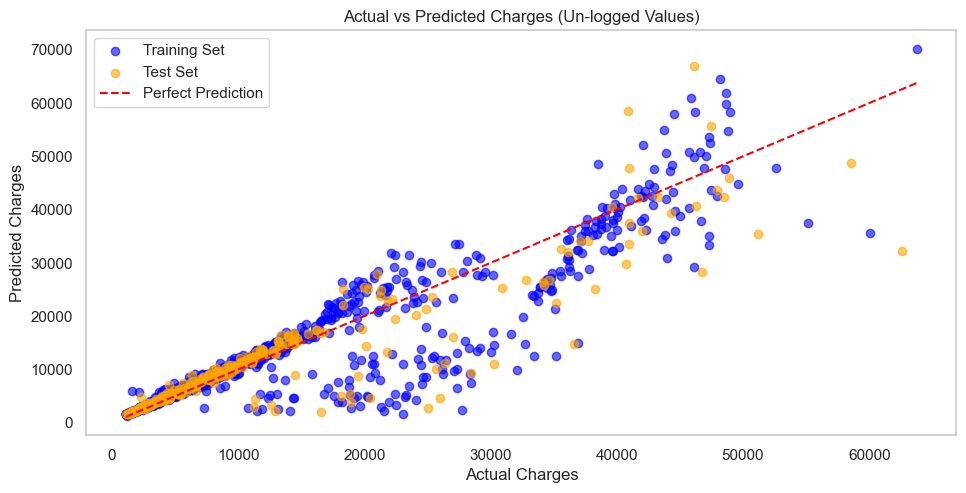

In [173]:

# Reverse the natural log. in order to remove the np.log (which is log to base e), we have to use np.exp
Y_train_unlogged = np.exp(Y_train)
Y_test_unlogged = np.exp(Y_test)
Y_train_pred_unlogged = np.exp(Y_train_pred)
Y_test_pred_unlogged = np.exp(Y_test_pred)

# Plot forTraining and Test Sets
plt.figure(figsize=(10, 5))
plt.scatter(Y_train_unlogged, Y_train_pred_unlogged, alpha=0.6, label='Training Set', color='blue')
plt.scatter(Y_test_unlogged, Y_test_pred_unlogged, alpha=0.6, label='Test Set', color='orange')
plt.plot(
    [min(Y_train_unlogged), max(Y_train_unlogged)],
    [min(Y_train_unlogged), max(Y_train_unlogged)],
    color='red', linestyle='--', label='Perfect Prediction'
)
plt.title("Actual vs Predicted Charges (Un-logged Values)")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid()
plt.show()

**Limitations:**

Decision trees -> they did well in this case, but if the dataset had more/different features with linear relationships with the target, then decision trees may struggle to model these relationships well. This means mistakes in the predictions, leading to wrong information being transferred to our stakeholders, such as patients. This way, patients may suffer consequences such as being charged much higher insurnace premiums than they expected, leading to disastrous effect on their budgets.   
Also, decision trees are unstable due to high variance. If the training data slightly changes, the results may change significantly. This way stakeholders like insurnace companies may go bankrupt if they undercharge their customers due to wrong information from the models (‘Pros and Cons of Decision Tree Regression in Machine Learning’, 2024).

Polynomial regression -> If we add data that has outliers, polynomial regression worsens significantly. This way insurance companies may overcharge customers and then the customers may go to other insurance companies instead due to being overcharged.
Also, if we use a different dataset, and need a higher degree to model it, this may lead to overfitting. This can lead to stakeholders, such as other students, getting bad marks in their submissions because of overfitting model (Gavrilova, 2021).

# <span style="color:red">Summary of Regression Model Evaluation (under 500 words)</span>

---

### <span style="color:red">Goals:</span>
1. **Compare all models**  
2. **Pick the 2 best models**  
3. **Deliver findings from these 2 models**

---

### <span style="color:red">Findings Summarised:</span>
- The more complex models had some excellent scores
- However, the 2 models picked were the relatively simpler ones, like polynomial regression and decision tree  
- They were picked because of balance of good scores and explainability
- However, overall, none of the models had bad scores when using all features – all performed reasonably well.
- Obviously, the simplest model (**linear regression**) performed the worst, even with gradient descent.  
- **Why?** Because the gradient descent model still assumes linearity, and some of our features have a non-linear relationship with the target variable.  
- **MLP**, even though it was the most complex model, it still did **NOT** have the best performance.  
---

### <span style="color:red">Ethics:</span>

1. **Communicate Limitations** (D.5 from *‘Examples — Deon’, n.d.*):  
   - **Question**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?  
   - **Response**: Yes, the limitations of the models have been explained.

2. **Explainability** (D.4 from *‘Examples — Deon’, n.d.*):  
   - **Question**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
   - **Response**: Yes, I picked explainable models that can do this.
    
3. **Public Good**:  
   - (ACM, 2018) in point 3.1 mentions that we must ensure public good is the main concern during tasks related to testing and validation.  
   - This was true for my project. I was constantly honest and focused on making my project more transparent so stakeholders can trust and understand the model outcomes.  
   - This ensures stakeholders can use it to their advantage and avoid suffering negative consequences due to the models being unexplainable.  
   - I reported all performance metrics, such as **MSE** and **R² scores**, to enhance explainability of model performance.

---

### <span style="color:red">Reflections:</span>
- Model evaluation helped me master new concepts to me, which are metrics such as MSE, R2 score, etc. Before this module, I had never heard these terms before. This module was my first encounter, and comparing these scores during model evaluation helped me understand these metrics.
- Implementing techniques like cross-validation helped me understand how important it is to ensure that the model generalises well to unseen data
- Model evaluation also helped me develop a detail oriented mindset. Analysing model evaluation results needs meticulous attention to detail. I had to make sure that that no details were overlooked. I analysed training, test scores as well as explainability and execution speeds of the algorithms.
- I now know what two models could be good for tasks like this one (polynomiial regression and decision trees)

# Novelty

**Literature review on existing methods in the related fields (inspired by haixia coursework guide novelty section (Liu, 2024a)):**
Existing literature puts an emphasis on the ‘explainability’ of algorithms (XAI).  For example, (Orji and Ukwandu, 2023) wrote about trying to execute the cost prediction of medical insurance in an explainable manner. They investigated SHapley Additive exPlanations (SHAP) and Individual Conditional Expectation (ICE) plots to explain the key features when predicting medical insurance costs. SHAP measure the contribution of each feature variable. ICE plots show how each feature impacts predictions, but in a visual way ( a plot).  They mentioned how machine learning explainability  has a focus on these regions: Transparency, causality, bias, fairness, and safety.

**Identify research gaps (Liu, 2024a):**

This is when I noticed a gap in the research. What is noticed by these methods is that they focus on the explainability of the FEATURES. But what about the explainability of the TARGET variable? This is what I tried to do in my novelty section. If we keep mentioning to the stakeholders that the charges are for example 20,000, 40,000 etc, it can become all a blur and very tiring to read. It can be heard to interpret if the charges value is actually a bad one or a good one when compared to the other charges values.

**Propose and justify new ML methods or new investigation perspectives (Liu, 2024a):**
 My novelty idea adds classification to our regression task, using three classes: high, medium, or low risk. It helps us classify whether the person is at high, medium, or low risk of having high insurance charges. If the output is high – this person is at HIGH risk of getting HIGH insurance costs, if medium then this person is at MEDIUM risk of getting HIGH insurance costs, if low then this person is at LOW risk of getting HIGH insurance costs. This is a simple but novel,  important change, because it makes the model even more unambiguous and easy to understand, while adding an extra layer of explainability, hence increasing trust with stakeholders.

**The two cells below have code that does two tasks (Liu, 2024a):**

* Tell us out of the entire dataset how many people were high, medium, and low risk.
* Allows us to predict the risk for a certain INDIVIDUAL with certain characteristics. For example, what is the risk of high insurance costs for an individual who is 40 years old, a male, has a bmi of 30, has 1 children, is a smoker, and from the southwest region. This makes it easier to use this model in a case by case basis for each individual.

In [174]:
# Out of the entire dataset how many people were high, medium, and low risk. Using our chosen polynomial model



# Apply Polynomial Features 
quad = PolynomialFeatures(degree=2)
x_quad_train = quad.fit_transform(X_train_scaled)
x_quad_test = quad.transform(X_test_scaled)

# Fit a Linear Regression model
regressor = LinearRegression()
regressor.fit(x_quad_train, Y_train)

#Make predictions for the train and test sets
Y_train_pred = regressor.predict(x_quad_train)
Y_test_pred = regressor.predict(x_quad_test)

# Classify predictions based on threshold values. I picked these threshold values through analysing my visualisations and checking what the lower, mid, and upper range of my log_charges are
def classify_risk(predictions):
    return ['High' if val > 10.5 else 'Low' if val < 7.8 else 'Medium' for val in predictions]

# Apply the classification
Y_train_risk = classify_risk(Y_train_pred)
Y_test_risk = classify_risk(Y_test_pred)

# Count how many samples are in each risk category for both train and test sets
train_risk_counts = {'High': Y_train_risk.count('High'), 'Medium': Y_train_risk.count('Medium'), 'Low': Y_train_risk.count('Low')}
test_risk_counts = {'High': Y_test_risk.count('High'), 'Medium': Y_test_risk.count('Medium'), 'Low': Y_test_risk.count('Low')}

# Print the counts of each risk category
print(f"Training Set Risk Distribution: {train_risk_counts}")
print(f"Test Set Risk Distribution: {test_risk_counts}")

Training Set Risk Distribution: {'High': 67, 'Medium': 924, 'Low': 80}
Test Set Risk Distribution: {'High': 14, 'Medium': 231, 'Low': 22}


In [175]:
# Now lets work with a specific case/person
# what is the risk of high insurance costs for an individual who is 40 years old, a male, has a bmi of 30, has 1 children, and is a smoker, and is from the southwest.



# Ignore all warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


quad = PolynomialFeatures(degree=2)

# Apply Polynomial Features to the scaled training data 
x_quad_train = quad.fit_transform(X_train_scaled)

# Fit a Linear Regression model
regressor = LinearRegression()
regressor.fit(x_quad_train, Y_train)

# Now, for the sample data with 6 features 
sample_data = np.array([[40, 1, 30, 1, 1, 3]])  # 6 features



# Apply the same scaling to the sample data 
sample_data_scaled = scaler.transform(sample_data)

# Apply the same polynomial transformation 
sample_data_poly = quad.transform(sample_data_scaled)

# Now make the prediction with the trained regressor
predicted_value = regressor.predict(sample_data_poly)

# Define risk classification 
def classify_risk(predictions):
    return ['High' if val > 10.5 else 'Low' if val < 7.8 else 'Medium' for val in predictions]

# Classify the risk based on the prediction
predicted_risk = classify_risk(predicted_value)

# Print the result
print(f"Risk for a person who is 40 years old, a male, has a bmi of 30, has 1 child, and is a smoker and is from the southwest: {predicted_risk}")

Risk for a person who is 40 years old, a male, has a bmi of 30, has 1 child, and is a smoker and is from the southwest: ['Medium']


**Note**:

This is good but it can be improved. What if we make it interactive? Having an interactive system, that asks the user what their details are so that they can be used in the models, would be even better because it adds to the interpratibility and explainability. When the stakeholders feel they are personally involved in the process of this project and are answering questions the computer asks them, they are less likely to be intimidated by the complexities of our project. It will make the entire process more enjoyable for them if they are personally contirbuting to the project, as I will show below. It will help us explain the models better if we show the stakeholders the models working in an interactive system. 

In [176]:
# I will only allow the users to enter numbers that are within a certain range so that they dont enter numbers way out of range

for column in X.columns:
    min_val = X[column].min()
    max_val = X[column].max()
    print(f"Feature '{column}': Min = {min_val}, Max = {max_val}")

Feature 'age': Min = 18.0, Max = 64.0
Feature 'sex': Min = 0, Max = 1
Feature 'bmi': Min = 15.96, Max = 53.13
Feature 'children': Min = 0, Max = 5
Feature 'smoker': Min = 0, Max = 1
Feature 'region': Min = 0, Max = 3


In [177]:
# I have included error checking tehcniuqes to make the code better. checks input is valid
# also, added code that automatically then encodes the inputed categorical features. They are encoded to exactly the same numbers that they were encoded in my previous models
# For example, in my project I had smoker = yes =1 , smoker =no =0, and I made sure to use these same exact values here as well, to maintain consistency
# there are also other error handling tehcniques shown below, such as if the user enters 'yes' for the sex category, the computer will say that the user an only enter 'male'/'female'

# Ignore all warnings
warnings.filterwarnings("ignore")

# Function to get valid user input. the user should NOT enter words for a numerical input, or numbers for a categorical input, and the inputted values should NOT be out of range
def get_valid_input(prompt, input_type, valid_options=None, min_value=None, max_value=None):
    while True:
        user_input = input(prompt).strip()
        try:
            if input_type == "number":
                # If input is numeric (age, BMI, or children), ensure it is a valid number
                value = float(user_input) if '.' in user_input else int(user_input)
                
                # Ensure the value is within the provided min and max limits
                if min_value is not None and value < min_value:
                    print(f"Value must be greater than or equal to {min_value}.")
                elif max_value is not None and value > max_value:
                    print(f"Value must be less than or equal to {max_value}.")
                else:
                    return value
            elif input_type == "categorical":
                # If input is categorical, check if it's in valid options
                if user_input.lower() in valid_options:
                    return user_input.lower()
                else:
                    print(f"Invalid input. Please choose from {valid_options}.")
            else:
                print("Invalid input type specified.")
        except ValueError:
            print(f"Invalid {input_type} value. Please try again.")

# Function to get user input and encode categorical variables
def get_user_input():
    # Asking for user input with validation and limits
    age = get_valid_input("Enter age: ", "number", min_value=18, max_value=64)  # Age is a number between 18 and 64
    sex = get_valid_input("Enter sex (male/female): ", "categorical", valid_options=["male", "female"])  # Sex is categorical
    bmi = get_valid_input("Enter BMI: ", "number", min_value=15.96, max_value=53.13)  # BMI is a number between 15.96 and 53.13
    children = get_valid_input("Enter number of children: ", "number", min_value=0, max_value=5)  # Children is a number between 0 and 5
    smoker = get_valid_input("Are you a smoker? (yes/no): ", "categorical", valid_options=["yes", "no"])  # Smoker is categorical
    region = get_valid_input("Enter region (southwest/southeast/northwest/northeast): ", "categorical", valid_options=["southwest", "southeast", "northwest", "northeast"])  # Region is categorical

    # Encoding categorical features manually to maintain consistency
    # Encoding 'sex' as 1 for male, 0 for female
    sex_encoded = 1 if sex == 'male' else 0
    
    # Encoding 'smoker' as 1 for yes, 0 for no
    smoker_encoded = 1 if smoker == 'yes' else 0
    
    # Encoding 'region' as 3 for southwest, 2 for southeast, 1 for northwest, and 0 for northeast
    region_encoded = {'southwest': 3, 'southeast': 2, 'northwest': 1, 'northeast': 0}.get(region, -1)
    
    # Return the encoded input data as a numpy array (with 6 features). HAd to make sure they are in the correct order as they are in X_train/X_test for consitency
    return np.array([[age, sex_encoded, bmi, children, smoker_encoded, region_encoded]])



quad = PolynomialFeatures(degree=2)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

x_quad_train = quad.fit_transform(X_train_scaled)

# Fit a Linear Regression model
regressor = LinearRegression()
regressor.fit(x_quad_train, Y_train)

# Get the user input and process it
user_data = get_user_input()

# If the user input is invalid, return early
if user_data is None:
    exit()

# Apply scaling to the sample data using the fitted scaler
user_data_scaled = scaler.transform(user_data)  

# Apply the same polynomial feature transformation used during training
user_data_poly = quad.transform(user_data_scaled)


# Make prediction with the trained regressor
predicted_value = regressor.predict(user_data_poly)


# Define risk classification
def classify_risk(predictions):
    return ['High' if val > 10.5 else 'Low' if val < 7.8 else 'Medium' for val in predictions]

# Classify the risk based on the predicted insurance cost
predicted_risk = classify_risk(predicted_value)

# Print the result
print(f"Risk for the given person: {predicted_risk[0]}")

Enter age:  34
Enter sex (male/female):  2


Invalid input. Please choose from ['male', 'female'].


Enter sex (male/female):  male
Enter BMI:  77


Value must be less than or equal to 53.13.


Enter BMI:  44
Enter number of children:  3
Are you a smoker? (yes/no):  yes
Enter region (southwest/southeast/northwest/northeast):  southwest


Risk for the given person: High


In [178]:
user_data  # good. the input has appropriately been encoded, and in the correct order as our original dataset features (age, sex, bmi, children number, smoker, region)

array([[34,  1, 44,  3,  1,  3]])

In [179]:
predicted_value  # high risk

array([10.86155319])

**Implement the new method(s) with functions that can take in dummy data; or design experiments steps to investigate (Liu, 2024a):**

In [180]:
print(Y_train.min())
print(Y_train.max())

7.02275569117477
11.063044851063491


In [183]:
# I will create dummy data for training AND testing a polynomial regression model, then use our new classification function to classify the risk
# I made sure to follow the correct sttructure of each feature as well as the target variable
# The training generated data features all used the same min and max values as the real dataset data, as I showed in the previous cell
# I made sure to keep the generated age as integer, smoker status as binary, etc.
# Furthermore, the generated target variable training data is between the min and max too of the real dataset data
# Then i generated dummy TEST feature data, and used it to make predictions


# Ignore all warnings
warnings.filterwarnings("ignore")


# setting seed again as I did before, just in case
seed = 42  

# Set the seed for reproducibility
np.random.seed(seed)

# BELOW is the generated dummy training FEATURE data
dummyXtrain = np.column_stack((
    np.random.randint(18, 65, 50),       # Age between 18 and 64
    np.random.choice([0, 1], 50),       # Sex: 0 = female, 1 = male
    np.random.uniform(15.96, 53.14, 50),  # BMI between 15.96 and 53.13
    np.random.randint(0, 6, 50),        # Children: 0 to 5
    np.random.choice([0, 1], 50),       # Smoker: 0 = no, 1 = yes
    np.random.randint(0, 4, 50)         # Region: 0, 1, 2, 3

# BELOW is the generated dummy training TARGET data
))
dummyYtrain = np.random.rand(50) * (11.044406702204412 - 7.02275569117477) + 7.02275569117477  # Random values between the min and max

# Initialize the StandardScaler and PolynomialFeatures
scaler = StandardScaler()
quad = PolynomialFeatures(degree=2)

# Scale the training data
x_train_scaled = scaler.fit_transform(dummyXtrain)

# Apply Polynomial Features to the scaled training data
x_quad_train = quad.fit_transform(x_train_scaled)

# Train a dummy regressor 
regressor = LinearRegression()
regressor.fit(x_quad_train, dummyYtrain)

# Correctly structured dummy TEST FEATURE sample data for prediction
sample_data = np.array([[40.0, 1, 30.0, 1, 1, 2]])  # Example sample

# Apply the same scaling to the sample data (using the fitted scaler)
sample_data_scaled = scaler.transform(sample_data)

# Apply the same polynomial transformation 
sample_data_poly = quad.transform(sample_data_scaled)

# Predict the output for the dummy data
predicted_value = regressor.predict(sample_data_poly)

# Define risk classification 
def classify_risk(predictions):
    return ['High' if val > 10.5 else 'Low' if val < 7.8 else 'Medium' for val in predictions]

# Classify the risk based on the prediction
predicted_risk = classify_risk(predicted_value)

# Print structured dummy data
print('X (Dummy Features):')
print(dummyXtrain)
print('\nY (Dummy Target):')
print(dummyYtrain)

print('\nX (Dummy feature SAMPLE):')
print(sample_data)

# Print the result
print(f"\nRisk classification for the dummy sample data: {predicted_risk}")


X (Dummy Features):
[[56.          1.         51.84819232  5.          0.          3.        ]
 [46.          0.         38.52953333  0.          1.          3.        ]
 [32.          1.         26.22164959  4.          0.          2.        ]
 [60.          0.         26.97544894  5.          0.          3.        ]
 [25.          1.         22.10462479  3.          0.          2.        ]
 [38.          0.         16.5413616   3.          1.          1.        ]
 [56.          1.         31.70206705  3.          1.          2.        ]
 [36.          0.         30.64169485  3.          1.          2.        ]
 [40.          0.         26.87189034  3.          1.          2.        ]
 [28.          1.         16.48348781  5.          0.          3.        ]
 [28.          0.         23.35296058  5.          0.          3.        ]
 [41.          1.         42.4076938   2.          1.          2.        ]
 [53.          1.         45.3387266   1.          0.          3.        ]
 [57.

**Implement the evaluation method(s) to test the function or test the experiments(Liu, 2024a)**

In [184]:
from sklearn.model_selection import cross_val_score

# Cross-validation (using negative MSE as scoring to minimize error)
cv_scores = cross_val_score(regressor, x_quad_train, dummyYtrain, cv=5, scoring='neg_mean_squared_error')

print(f'Cross-validation MSE scores: {-cv_scores}')
print(f'Mean CV MSE: {-cv_scores.mean()}')

# Averagely speaking, the squared difference between the predicted and actual values is 85 (MSE)
# the model does not generalise well to unseen data at all
# therefore, using dummy data that was randomly picked will not give good scores because it lacks the patterns and the relationships between the feature data and target variable like the real world data does
# furthemore, the dummy dat may have more outliers

Cross-validation MSE scores: [  6.93770723  15.75906896 227.48874315 169.69789518   5.38759118]
Mean CV MSE: 85.05420114094501


**This answers RSQ11**:

**Compared to literature, what novel ideas can I implement?**

**Other ethics concerns:**

B.3 Data retention plan *‘Examples — Deon’, n.d.*): Is there a schedule or plan to delete the data after it is no longer needed?

* The data will be deleted from my computer when I don’t need it, as soon as I submit the coursework

# References (alphabetical order as per UWE rules):

‘Course Notes for 431 - 9  Missing Data and Single Imputation’ (2024) Github.io. 2024 [online]. Available from: https://thomaselove.github.io/431-notes/09-missing_data.html [Accessed 30 November 2024].

‘Examples — Deon’ (no date) deon.drivendata.org [online]. Available from: https://deon.drivendata.org/examples/ [Accessed 3 December 2024].

‘Explainable artificial intelligence’ (2020) Wikipedia. 26 February 2020 [online]. Available from: https://en.wikipedia.org/wiki/Explainable_artificial_intelligence [Accessed 28 November 2024].

‘Help Online - Origin Help - Residual Plot Analysis’ (no date) www.originlab.com [online]. Available from: https://www.originlab.com/doc/Origin-Help/Residual-Plot-Analysis [Accessed 2 December 2024].

‘Machine Learning Evaluation Mastery: How to Use Statistical Tests for Model Comparison and Evaluation’ (2024) GPTutorPro. 11 June 2024 [online]. Available from: https://gpttutorpro.com/machine-learning-evaluation-mastery-how-to-use-statistical-tests-for-model-comparison-and-evaluation/ [Accessed 1 December 2024].

‘ML | XGBoost (eXtreme Gradient Boosting)’ (2019) GeeksforGeeks. 19 August 2019 [online]. Available from: https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/ [Accessed 3 December 2024].

‘Pros and Cons of Decision Tree Regression in Machine Learning’ (2024) GeeksforGeeks. 15 February 2024 [online]. Available from: https://www.geeksforgeeks.org/pros-and-cons-of-decision-tree-regression-in-machine-learning/ [Accessed 7 December 2024].

ACM (2018) ACM Code of Ethics and Professional Conduct Association for Computing Machinery. 22 June 2018 [online]. Available from: https://www.acm.org/code-of-ethics [Accessed 4 December 2024].

Adan, Y. (2019) Which machine learning models require careful feature selection and which don’t? Quora. 2019 [online]. Available from: https://www.quora.com/Which-machine-learning-models-require-careful-feature-selection-and-which-dont [Accessed 1 December 2024].

AerysSk (2021) Reddit - Dive into anything Reddit.com. 2021 [online]. Available from: https://www.reddit.com/r/learnmachinelearning/comments/nc3vn5/please_help_me_in_understanding_when_to_use_label/ [Accessed 25 November 2024].

Aluja-Banet, T. (2024) 3.8 PCA and Clustering | Principal Component Analysis for Data Science (pca4ds) Github.io. 2024 [online]. Available from: https://pca4ds.github.io/pca-and-clustering.html [Accessed 22 November 2024].

Ayub Abu-zer (2024) Order of EDA, missing values, cleaning | Kaggle Kaggle.com. 2024 [online]. Available from: https://www.kaggle.com/discussions/questions-and-answers/116473 [Accessed 30 November 2024].

Barredo Arrieta, A. et al. (2020) Explainable Artificial Intelligence (XAI): Concepts, taxonomies, Opportunities and Challenges toward Responsible AI. Information Fusion. 58 (1), pp. 82–115.

Cenita, J.A., Asuncion, P.R. and Victoriano, J. (2023) Performance Evaluation of Regression Models in Predicting the Cost of Medical Insurance. International Journal of Computing Sciences Research [online]. 7, pp. 2052–2065. [Accessed 7 October 2024].

CHOI, M. (2017) Medical Cost Personal Datasets www.kaggle.com. 2017 [online]. Available from: https://www.kaggle.com/datasets/mirichoi0218/insurance [Accessed 3 December 2024].

CHOI, M. (no date) Medical Cost Personal Datasets www.kaggle.com [online]. Available from: https://www.kaggle.com/datasets/mirichoi0218/insurance [Accessed 7 October 2024].

Collins, S. (2020) Georgia’s Covid-19 cases aren’t declining as quickly as initial data suggested they were Vox. 18 May 2020 [online]. Available from: https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening [Accessed 21 November 2024].

data, S. (2019) Standardizing data produces negative values Cross Validated. 28 September 2019 [online]. Available from: https://stats.stackexchange.com/questions/429111/standardizing-data-produces-negative-values [Accessed 3 December 2024].

Direct-Touch469 (2023) Reddit - Dive into anything Reddit.com. 2023 [online]. Available from: https://www.reddit.com/r/datascience/comments/14gg47c/imbalance_in_predictors_what_to_do/ [Accessed 25 November 2024].

dslack (2016) How can I see the effect of sklearn.preprocessing.PolynomialFeatures? Stack Overflow. 19 January 2016 [online]. Available from: https://stackoverflow.com/questions/34869851/how-can-i-see-the-effect-of-sklearn-preprocessing-polynomialfeatures [Accessed 2 December 2024].

for (2020) Feature scaling for MLP neural network sklearn Data Science Stack Exchange. 29 July 2020 [online]. Available from: https://datascience.stackexchange.com/questions/78489/feature-scaling-for-mlp-neural-network-sklearn [Accessed 4 December 2024]. 

Frost, J. (2017) Check Your Residual Plots to Ensure Trustworthy Regression Results! Statistics By Jim. 5 April 2017 [online]. Available from: https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/ [Accessed 2 December 2024].

Gavrilova, Y. (2021) Introduction to Polynomial Regression Analysis Serokell Software Development Company. 21 September 2021 [online]. Available from: https://serokell.io/blog/polynomial-regression-analysis [Accessed 7 December 2024].

Google Cloud (no date) What is Supervised Learning? Google Cloud [online]. Available from: https://cloud.google.com/discover/what-is-supervised-learning [Accessed 7 October 2024].

hely333 (2018) EDA + Regression Kaggle.com. 10 October 2018 [online]. Available from: https://www.kaggle.com/code/hely333/eda-regression/notebook [Accessed 22 November 2024].

Liu, H. (2024) StudentID_Haixia_Titanic Uwe.ac.uk. 2024 [online]. Available from: https://blackboard.uwe.ac.uk/ultra/courses/_365438_1/cl/outline?legacyUrl=~2Fwebapps~2Fblackboard~2Fexecute~2FdisplayIndividualContent%3Fmode%3Dview%26content_id%3D_10888522_1%26course_id%3D_365438_1 [Accessed 7 October 2024].

Liu, H. (2024) Tree-RandomForest-Adaboost-FeatureRankingFeatureSelection(1).ipynb Uwe.ac.uk. 2024 [online]. Available from: https://blackboard.uwe.ac.uk/ultra [Accessed 1 December 2024].

Liu, H. (2024) Tree-RandomForest-Adaboost-FeatureRankingFeatureSelection(1).ipynb Uwe.ac.uk. 2024 [online]. Available from: https://blackboard.uwe.ac.uk/ultra [Accessed 1 December 2024].

Liu, H. (2024a) ML-2024-Coursework-guide-v006-music-classification

Liu, H. (2024a) ML-2024-Coursework-guide-v006-music-classification Uwe.ac.uk. 2024 [online]. Available from: https://blackboard.uwe.ac.uk/ultra [Accessed 7 December 2024].

Liu, H. (no date) linear-regression-gradient-descent-2024Solution(5) (3) login.microsoftonline.com [online]. Available from: https://blackboard.uwe.ac.uk/ultra/.

mohamedelghannam15 (2024) Medical Cost (EDA + Regression) Kaggle.com. 22 September 2024 [online]. Available from: https://www.kaggle.com/code/mohamedelghannam15/medical-cost-eda-regression [Accessed 7 October 2024].

NHS inform (2023) Body mass index (BMI) NHS inform. 4 January 2023 [online]. Available from: https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-management/body-mass-index-bmi/ [Accessed 30 November 2024].

niteshyadav3103 (2021) Medical Cost EDA + Regression (TensorFlow) Kaggle.com. 19 June 2021 [online]. Available from: https://www.kaggle.com/code/niteshyadav3103/medical-cost-eda-regression-tensorflow [Accessed 19 November 2024].

Orji, U. and Ukwandu, E. (2023) Machine Learning For An Explainable Cost Prediction of Medical Insurance. Machine Learning with Applications [online]. p. 100516. Available from: https://arxiv.org/ftp/arxiv/papers/2311/2311.14139.pdf [Accessed 26 November 2024].

Sandeep S. Sandhu (2017) machine learning - GBM vs XGBOOST? Key differences? Data Science Stack Exchange. 13 February 2017 [online]. Available from: https://datascience.stackexchange.com/questions/16904/gbm-vs-xgboost-key-differences [Accessed 28 November 2024].

Santiago, D. (2023) Balancing Imbalanced Data: Undersampling and Oversampling Techniques in Python Medium. 5 June 2023 [online]. Available from: https://medium.com/@daniele.santiago/balancing-imbalanced-data-undersampling-and-oversampling-techniques-in-python-7c5378282290 [Accessed 3 December 2024].

Thenraj, P. (2020) Do Decision Trees need Feature Scaling? Medium. 22 June 2020 [online]. Available from: https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6.

touba7 (2022) Insurance prediction🩺 with five Regressor Models Kaggle.com. 25 March 2022 [online]. Available from: https://www.kaggle.com/code/touba7/insurance-prediction-with-five-regressor-models [Accessed 19 November 2024].

tumpanjawat (2023) 🩺MedCost: EDA|K-Cluster🀝|📚Gradient Boost [Full] Kaggle.com. 29 June 2023 [online]. Available from: https://www.kaggle.com/code/tumpanjawat/medcost-eda-k-cluster-gradient-boost-full [Accessed 3 December 2024].

‘Data Ethics in AI: 6 Key Principles for Responsible Machine Learning’ (2024) Alation.com. 2024 [online]. Available from: https://www.alation.com/blog/data-ethics-in-ai-6-key-principles-for-responsible-machine-learning/ [Accessed 12 December 2024].
